#Progetto Industry Lab

###Caricamento librerie

In [ ]:
!pip install --upgrade setuptools pip

     |████████████████████████████████| 798kB 12.3MB/s 
     |████████████████████████████████| 1.5MB 58.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 47.3.1
    Uninstalling setuptools-47.3.1:
      Successfully uninstalled setuptools-47.3.1
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
!pip install -U skater

     |████████████████████████████████| 96 kB 4.3 MB/s 
     |████████████████████████████████| 25.3 MB 58 kB/s 
     |████████████████████████████████| 253 kB 75.3 MB/s 
     |████████████████████████████████| 169 kB 69.4 MB/s 
     |████████████████████████████████| 176 kB 72.1 MB/s 
     |████████████████████████████████| 126 kB 79.6 MB/s 
  ERROR: Failed building wheel for skater
  Running setup.py clean for skater
  Created wheel for ds-lime: filename=ds_lime-0.1.1.27-py3-none-any.whl size=261594 sha256=e4cdcb4994f6d58e27d2b3247458511522ce214260b8a43ffc990e4e4a35b580
  Stored in directory: /root/.cache/pip/wheels/c8/0f/b2/82f16132b23f839372667e70a74ca29f0aafb97d25ab4320f5
  Created wheel for wordcloud: filename=wordcloud-1.3.1-cp36-cp36m-linux_x86_64.whl size=281721 sha256=400764f43183a52048a6a1f8e915a31322774adf80a43ecdaaf02296107d44ed
  Stored in directory: /root/.cache/pip/wheels/f0/c7/45/ffddd4306920e71ae50916b9462619a37e86d8b7a6c4fafa2f
Successfully built ds-lime wordcloud
Fa

In [ ]:
!pip install statsmodels==0.11.1

     |████████████████████████████████| 8.7 MB 11.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install XGBoost

In [ ]:
!pip install yellowbrick==1.1

     |████████████████████████████████| 263 kB 12.0 MB/s 
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [ ]:
!pip install pyGPGO

  Created wheel for pyGPGO: filename=pyGPGO-0.4.0.dev1-py3-none-any.whl size=19865 sha256=d9b11f91b74b66b70930bc44fb320503c75d9517f7992cd55d7fd83f071a35c6
  Stored in directory: /root/.cache/pip/wheels/a4/54/ae/ddd946da733efc28cc113530d6d61e8976fa0554290b4f865d
Successfully built pyGPGO


In [ ]:
from matplotlib import cm
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from scipy.stats import iqr
from sklearn.covariance import EllipticEnvelope
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
from sklearn.neighbors import LocalOutlierFactor
import pickle
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import OLSInfluence
from yellowbrick.regressor import cooks_distance
from yellowbrick.datasets import load_concrete
from pyGPGO.covfunc import squaredExponential
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.surrogates.RandomForest import RandomForest
from pyGPGO.GPGO import GPGO
from pyGPGO.acquisition import Acquisition

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_processed.pkl', 'rb')
data = pickle.load(file)
file.close()
data.head()

,DMC,UltimaStazione,Data_Ingresso,Data_Uscita,Esito_S10,Esito_S20,Esito_S40,Esito_S50,Esito_S60,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,S60F2DepresMin,S60F2Coppia,S60F2Velocita,S60F2TenutaVNR,Data_Ingresso_day,Data_Ingresso_month,Data_Ingresso_year,Success
0,128209000052012000033100146508066R,70,2020-04-29 07:49:57,2020-04-29 07:55:45.863,1,1,1,1,1,4.11,18.00,7.54,7.50,14.589,0.115,8.32,13.25,8.33,14.25,8.32,13.00,997.200012,1.2,645.500000,2.89,396.0,0.6,2020-04-29,2020-04,2020,1
2,128209000052012000031100146508066R,70,2020-04-29 07:29:25,2020-04-29 07:45:57.413,1,1,1,1,1,4.08,19.75,7.38,7.25,14.640,0.179,8.36,13.50,8.30,13.75,8.34,14.00,997.299988,1.4,638.400024,2.67,406.0,0.5,2020-04-29,2020-04,2020,1
3,128209000052012000028100146508066R,70,2020-04-29 07:27:52,2020-04-29 07:41:15.767,1,1,1,1,1,4.13,11.50,7.45,7.25,14.783,0.168,8.15,14.50,8.22,12.25,8.23,12.00,999.400024,2.3,587.900024,2.59,406.0,0.5,2020-04-29,2020-04,2020,1
4,128209000052012000027100146508066R,70,2020-04-29 07:27:21,2020-04-29 07:40:41.913,1,1,1,1,1,4.10,13.75,7.57,7.50,14.749,0.121,8.24,13.50,8.32,12.50,8.20,13.00,999.099976,1.2,622.700012,2.75,408.0,0.6,2020-04-29,2020-04,2020,1
5,128209000052012000032100146508066R,70,2020-04-29 07:18:53,2020-04-29 07:46:31.537,1,1,1,1,1,4.14,12.00,7.47,7.50,14.727,0.137,8.36,13.25,8.23,13.25,8.28,11.25,997.900024,1.3,630.700012,2.79,403.0,0.5,2020-04-29,2020-04,2020,1


#Classificazione S50

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/outlierLOF_classe.pkl', 'rb')
b = pickle.load(file)
file.close()
b[:2]

array([-1,  1])

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_processed.pkl', 'rb')
data_class = pickle.load(file)
file.close()
data_class.head()

,DMC,UltimaStazione,Data_Ingresso,Data_Uscita,Esito_S10,Esito_S20,Esito_S40,Esito_S50,Esito_S60,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,S60F2DepresMin,S60F2Coppia,S60F2Velocita,S60F2TenutaVNR,Data_Ingresso_day,Data_Ingresso_month,Data_Ingresso_year,Success
0,128209000052012000033100146508066R,70,2020-04-29 07:49:57,2020-04-29 07:55:45.863,1,1,1,1,1,4.11,18.00,7.54,7.50,14.589,0.115,8.32,13.25,8.33,14.25,8.32,13.00,997.200012,1.2,645.500000,2.89,396.0,0.6,2020-04-29,2020-04,2020,1
2,128209000052012000031100146508066R,70,2020-04-29 07:29:25,2020-04-29 07:45:57.413,1,1,1,1,1,4.08,19.75,7.38,7.25,14.640,0.179,8.36,13.50,8.30,13.75,8.34,14.00,997.299988,1.4,638.400024,2.67,406.0,0.5,2020-04-29,2020-04,2020,1
3,128209000052012000028100146508066R,70,2020-04-29 07:27:52,2020-04-29 07:41:15.767,1,1,1,1,1,4.13,11.50,7.45,7.25,14.783,0.168,8.15,14.50,8.22,12.25,8.23,12.00,999.400024,2.3,587.900024,2.59,406.0,0.5,2020-04-29,2020-04,2020,1
4,128209000052012000027100146508066R,70,2020-04-29 07:27:21,2020-04-29 07:40:41.913,1,1,1,1,1,4.10,13.75,7.57,7.50,14.749,0.121,8.24,13.50,8.32,12.50,8.20,13.00,999.099976,1.2,622.700012,2.75,408.0,0.6,2020-04-29,2020-04,2020,1
5,128209000052012000032100146508066R,70,2020-04-29 07:18:53,2020-04-29 07:46:31.537,1,1,1,1,1,4.14,12.00,7.47,7.50,14.727,0.137,8.36,13.25,8.23,13.25,8.28,11.25,997.900024,1.3,630.700012,2.79,403.0,0.5,2020-04-29,2020-04,2020,1


In [ ]:
np.unique(data_class['Esito_S10'])

array([1, 2])

In [ ]:
data_class[data_class['Esito_S10']==2]

,DMC,UltimaStazione,Data_Ingresso,Data_Uscita,Esito_S10,Esito_S20,Esito_S40,Esito_S50,Esito_S60,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,S60F2DepresMin,S60F2Coppia,S60F2Velocita,S60F2TenutaVNR,Data_Ingresso_day,Data_Ingresso_month,Data_Ingresso_year,Success
21,NaN,0,2020-04-29 07:05:55,2020-04-29 07:06:15.867,2,0,0,0,0,0.320000,-214748.40625,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-04-29,2020-04,2020,0
53,NaN,0,2020-03-18 07:05:39,2020-03-18 07:05:59.330,2,0,0,0,0,0.050000,-214748.40625,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-03-18,2020-03,2020,0
141,NaN,0,2020-03-18 03:49:15,2020-03-18 03:49:35.787,2,0,0,0,0,0.320000,-214748.40625,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-03-18,2020-03,2020,0
197,NaN,0,2020-03-18 03:18:45,2020-03-18 03:19:05.687,2,0,0,0,0,0.010000,-214748.40625,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-03-18,2020-03,2020,0
297,NaN,0,2020-03-18 02:23:24,2020-03-18 02:23:44.880,2,0,0,0,0,0.360000,-214748.40625,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-03-18,2020-03,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245878,NaN,20,2015-12-15 08:23:44,2015-12-15 08:23:55.307,2,1,0,0,0,-21474.839844,4000.00000,7.04,8.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-15,2015-12,2015,0
245879,NaN,0,2015-12-15 08:14:27,2015-12-15 08:14:38.483,2,0,0,0,0,4.020000,18.00000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-15,2015-12,2015,0
245880,NaN,0,2015-12-15 08:08:36,2015-12-15 08:08:50.080,2,0,0,0,0,0.020000,1592.25000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-15,2015-12,2015,0
245881,NaN,20,2015-12-15 08:05:16,2015-12-15 08:05:29.860,2,1,0,0,0,0.050000,1592.25000,7.04,8.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-15,2015-12,2015,0


In [ ]:
data_class.drop(columns = ["Data_Ingresso", "Data_Uscita", "Data_Ingresso_day",	"Data_Ingresso_month",	"Data_Ingresso_year"], inplace = True)

In [ ]:
def controllarange(x, inf, sup):
  if (x>=inf) & (x<=sup):
    res = 1
  elif (((x < inf) & (x >= 0))) |( x > sup):
    res = 0
  else:
    res = -1
  return res

In [ ]:
def controllarangept(x, inf, sup):
  if (x>=inf) & (x<=sup):
    res = 1
  elif (((x < inf) & (x > 0))) |( x > sup):
    res = 0
  else:
    res = -1
  return res

In [ ]:
data_class["S10AngoloINT"] = data_class["S10Angolo"].apply(lambda x : controllarange(x, 0, 50))
data_class["S10CoppiaINT"] = data_class["S10Coppia"].apply(lambda x : controllarange(x, 4, 4.5))
data_class["S20AngoloINT"] = data_class["S20Angolo"].apply(lambda x : controllarange(x, 0, 50))
data_class["S20PortataINT"] = data_class["S20Portata"].apply(lambda x : controllarange(x, 13.4, 15.5))
data_class["S20CoppiaINT"] = data_class["S20Coppia"].apply(lambda x : controllarange(x, 6, 8))
data_class["S40Vite2CoppiaINT"] = data_class["S40Vite2Coppia"].apply(lambda x : controllarange(x, 7, 9))
data_class["S40Vite2AngoloINT"] = data_class["S40Vite2Angolo"].apply(lambda x : controllarange(x, 0, 50))
data_class["S40Vite1CoppiaINT"] = data_class["S40Vite1Coppia"].apply(lambda x : controllarange(x, 7, 9))
data_class["S40Vite1AngoloINT"] = data_class["S40Vite1Angolo"].apply(lambda x : controllarange(x, 0, 50))
data_class["S40Vite3CoppiaINT"] = data_class["S40Vite3Coppia"].apply(lambda x : controllarange(x, 7, 9))
data_class["S40Vite3AngoloINT"] = data_class["S40Vite3Angolo"].apply(lambda x : controllarange(x, 0, 50))
data_class["S40F2MomentoTorcMaxINT"] = data_class["S40F2MomentoTorcMax"].apply(lambda x : 1 if (x>=-0.1) & (x<=0.6) else 0)
data_class["S50PressionePTINT"] = data_class["S50PressionePT"].apply(lambda x : controllarangept(x, 900, 1150))
data_class["S50TenutaPZINT"] = data_class["S50TenutaPZ"].apply(lambda x : controllarange(x, -np.Inf, 2.4))
data_class["S60F2CoppiaINT"] = data_class["S60F2Coppia"].apply(lambda x : controllarange(x, 0.05, 4))
data_class["S60F2DepresMinINT"] = data_class["S60F2DepresMin"].apply(lambda x : controllarange(x, 330, np.Inf))
data_class["S60F2VelocitaINT"] = data_class["S60F2Velocita"].apply(lambda x : controllarange(x, 390, 410))
data_class["S60F2TenutaVNRINT"] = data_class["S60F2TenutaVNR"].apply(lambda x : controllarange(x, -np.Inf, 3))

Si procede a selezionare solo le osservazioni che raggiungono la stazione S50 e che superano i controlli (le relative misure sono contenute nell'intervallo di accettazione) per tutte le stazioni precedenti S10, S20 e S40.

In [ ]:
data_class = data_class[(data_class.S10CoppiaINT == 1) & (data_class.S10AngoloINT == 1) & (data_class.S20CoppiaINT == 1)
& (data_class.S20AngoloINT == 1) &(data_class.S20PortataINT == 1) & (data_class.S40F2MomentoTorcMaxINT == 1)
& (data_class.S40Vite1CoppiaINT == 1) & (data_class.S40Vite2CoppiaINT == 1) & (data_class.S40Vite3CoppiaINT == 1)
& (data_class.S40Vite1AngoloINT == 1) & (data_class.S40Vite2AngoloINT == 1) & (data_class.S40Vite3AngoloINT == 1)
& (data_class.Esito_S40 != 2) & (data_class.Esito_S20 == 1)]

In [ ]:
data_class

,DMC,UltimaStazione,Esito_S10,Esito_S20,Esito_S40,Esito_S50,Esito_S60,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,S60F2DepresMin,S60F2Coppia,S60F2Velocita,S60F2TenutaVNR,Success,S10AngoloINT,S10CoppiaINT,S20AngoloINT,S20PortataINT,S20CoppiaINT,S40Vite2CoppiaINT,S40Vite2AngoloINT,S40Vite1CoppiaINT,S40Vite1AngoloINT,S40Vite3CoppiaINT,S40Vite3AngoloINT,S40F2MomentoTorcMaxINT,S50PressionePTINT,S50TenutaPZINT,S60F2CoppiaINT,S60F2DepresMinINT,S60F2VelocitaINT,S60F2TenutaVNRINT
0,128209000052012000033100146508066R,70,1,1,1,1,1,4.11,18.00,7.54,7.50,14.589,0.115,8.32,13.25,8.33,14.25,8.32,13.00,997.200012,1.2,645.500000,2.89,396.0,0.6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,128209000052012000031100146508066R,70,1,1,1,1,1,4.08,19.75,7.38,7.25,14.640,0.179,8.36,13.50,8.30,13.75,8.34,14.00,997.299988,1.4,638.400024,2.67,406.0,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,128209000052012000028100146508066R,70,1,1,1,1,1,4.13,11.50,7.45,7.25,14.783,0.168,8.15,14.50,8.22,12.25,8.23,12.00,999.400024,2.3,587.900024,2.59,406.0,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,128209000052012000027100146508066R,70,1,1,1,1,1,4.10,13.75,7.57,7.50,14.749,0.121,8.24,13.50,8.32,12.50,8.20,13.00,999.099976,1.2,622.700012,2.75,408.0,0.6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,128209000052012000032100146508066R,70,1,1,1,1,1,4.14,12.00,7.47,7.50,14.727,0.137,8.36,13.25,8.23,13.25,8.28,11.25,997.900024,1.3,630.700012,2.79,403.0,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245773,2282090000516013000041??!0146508066R,70,1,1,1,1,1,4.02,16.00,7.08,6.50,14.209,0.068,8.09,17.50,8.08,19.25,8.13,19.00,969.000000,0.4,632.299988,3.03,410.0,0.9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
245786,2282090000515351000111??!0146508066R,70,1,1,1,1,1,4.01,18.75,7.02,9.25,13.974,0.052,8.17,17.25,8.10,18.25,8.12,18.25,991.500000,0.6,549.099976,2.25,405.0,0.6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
245788,2282090000515351000041??!0146508066R,70,1,1,1,1,1,4.01,16.50,7.05,6.75,14.044,0.105,8.15,15.75,8.09,18.00,8.09,16.50,990.700012,1.0,379.899994,2.05,355.0,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
245789,2282090000515351000071??!0146508066R,70,1,1,1,1,1,4.01,17.25,7.08,6.00,13.976,0.052,8.14,16.50,8.13,18.00,8.10,18.00,991.500000,0.5,401.000000,1.92,402.0,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
data_class.reset_index(drop=True, inplace = True)

Creo variabile che indica l'esito alla stazione S50 in funzione delle variabili -INT che fungono da controllo del rispetto dei limiti imposti

In [ ]:
data_class["listaesito"] = data_class[["S50TenutaPZINT", "S50PressionePTINT"]].apply(lambda x: list(x), axis = 1) 
data_class["pass50"] = data_class["listaesito"].apply(lambda x: 0 if ((0 in x) | (-1 in x)) else 1)

In [ ]:
data_class["pass50"].value_counts()

1    1244067
0       7881
Name: pass50, dtype: int64

Si osserva come si distribuiscono gli scarti e i prodotti conformi ai limiti in funzione della grandezza misurata alla stazione S50

In [ ]:
data_class.groupby(["S50PressionePTINT", "S50TenutaPZINT"])["pass50"].count()

S50PressionePTINT  S50TenutaPZINT
-1                 1                     689
 0                 1                    2874
 1                 0                    4318
                   1                 1244067
Name: pass50, dtype: int64

In [ ]:
data_class= data_class[["UltimaStazione", "S10Coppia",	"S10Angolo",	"S20Coppia",	"S20Angolo",	"S20Portata",	"S40F2MomentoTorcMax",	"S40Vite1Coppia",	"S40Vite1Angolo",	"S40Vite2Coppia",	"S40Vite2Angolo",	"S40Vite3Coppia", "S40Vite3Angolo", "pass50"]]
data_class

,UltimaStazione,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,pass50
0,70,4.11,18.00,7.54,7.50,14.589,0.115,8.32,13.25,8.33,14.25,8.32,13.00,1
1,70,4.08,19.75,7.38,7.25,14.640,0.179,8.36,13.50,8.30,13.75,8.34,14.00,1
2,70,4.13,11.50,7.45,7.25,14.783,0.168,8.15,14.50,8.22,12.25,8.23,12.00,1
3,70,4.10,13.75,7.57,7.50,14.749,0.121,8.24,13.50,8.32,12.50,8.20,13.00,1
4,70,4.14,12.00,7.47,7.50,14.727,0.137,8.36,13.25,8.23,13.25,8.28,11.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251943,70,4.02,16.00,7.08,6.50,14.209,0.068,8.09,17.50,8.08,19.25,8.13,19.00,1
1251944,70,4.01,18.75,7.02,9.25,13.974,0.052,8.17,17.25,8.10,18.25,8.12,18.25,1
1251945,70,4.01,16.50,7.05,6.75,14.044,0.105,8.15,15.75,8.09,18.00,8.09,16.50,1
1251946,70,4.01,17.25,7.08,6.00,13.976,0.052,8.14,16.50,8.13,18.00,8.10,18.00,1


In [ ]:
data_class.columns.values

array(['UltimaStazione', 'S10Coppia', 'S10Angolo', 'S20Coppia',
       'S20Angolo', 'S20Portata', 'S40F2MomentoTorcMax', 'S40Vite1Coppia',
       'S40Vite1Angolo', 'S40Vite2Coppia', 'S40Vite2Angolo',
       'S40Vite3Coppia', 'S40Vite3Angolo', 'pass50'], dtype=object)

In [ ]:
"""file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione.pkl', 'wb')
pickle.dump(data_class, file)
file.close()"""

"file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione.pkl', 'wb')\npickle.dump(data_class, file)\nfile.close()"

### Dataset Intermedio Classificazione

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione.pkl', 'rb')
data_class = pickle.load(file)
file.close()

In [ ]:
data_class

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,pass50
0,4.11,18.00,7.54,7.50,14.589,0.115,8.32,13.25,8.33,14.25,8.32,13.00,1
1,4.08,19.75,7.38,7.25,14.640,0.179,8.36,13.50,8.30,13.75,8.34,14.00,1
2,4.13,11.50,7.45,7.25,14.783,0.168,8.15,14.50,8.22,12.25,8.23,12.00,1
3,4.10,13.75,7.57,7.50,14.749,0.121,8.24,13.50,8.32,12.50,8.20,13.00,1
4,4.14,12.00,7.47,7.50,14.727,0.137,8.36,13.25,8.23,13.25,8.28,11.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251946,4.02,16.00,7.08,6.50,14.209,0.068,8.09,17.50,8.08,19.25,8.13,19.00,1
1251947,4.01,18.75,7.02,9.25,13.974,0.052,8.17,17.25,8.10,18.25,8.12,18.25,1
1251948,4.01,16.50,7.05,6.75,14.044,0.105,8.15,15.75,8.09,18.00,8.09,16.50,1
1251949,4.01,17.25,7.08,6.00,13.976,0.052,8.14,16.50,8.13,18.00,8.10,18.00,1


Breve analisi degli scarti rispetto alle variabili esplicative

In [ ]:
def plotgraficodett(attributo):
  fig, ax1 = plt.subplots(figsize=(16, 9))
  palette = ["#ffb200", "#0000ff"]


  quantino = pd.DataFrame(data_class[data_class.pass50 == 0].groupby(str(attributo))["pass50"].count())
  quantiok = pd.DataFrame(data_class[data_class.pass50 == 1].groupby(str(attributo))["pass50"].count())
  quantitot = pd.merge(quantiok, quantino, how ="left", left_index=True, right_index=True)
  quantitot["pass50_y"].fillna(0)


  ax1.set_xlabel(str(attributo))
  ax1.set_ylabel("conteggio di " + str(attributo))
  ax1.stackplot(quantitot.index, quantitot["pass50_y"], quantitot["pass50_x"], labels=["prodotti scartati", "quanti conformi"], colors = palette)
  ax1.tick_params(axis='y')

  ax2 = ax1.twinx()

  totale = data_class.groupby(str(attributo))["pass50"].count()
  scartisutot = data_class[data_class.pass50 == 0].groupby(str(attributo))["pass50"].count()/totale
  scartisutot.fillna(0, inplace = True)


  ax2.set_ylabel("proporzione di " + str(attributo) + " che sono poi scartati")
  ax2.plot(scartisutot.index, scartisutot, color="orange")
  ax2.tick_params(axis='y')
  ax2.grid(False)

  max1 = quantitot.pass50_x.max()
  max2 = quantitot.pass50_y.max()

  ax1.set_ylim(0,max(max1, max2)*1.2)
  ax2.set_ylim(0,scartisutot.max()*2)
  fig.tight_layout()
  plt.title("Grafico dettagliato per " + str(attributo))
  plt.show()

Lo scopo dei seguenti grafici è mostrare come si distribuisca la variabile considerata, e i corrispondenti valori di scarto (mostrati con la linea arancione) risultino distribuiti in proporzione alle osservazioni disponibili per ogni valore della grandezza misurata.

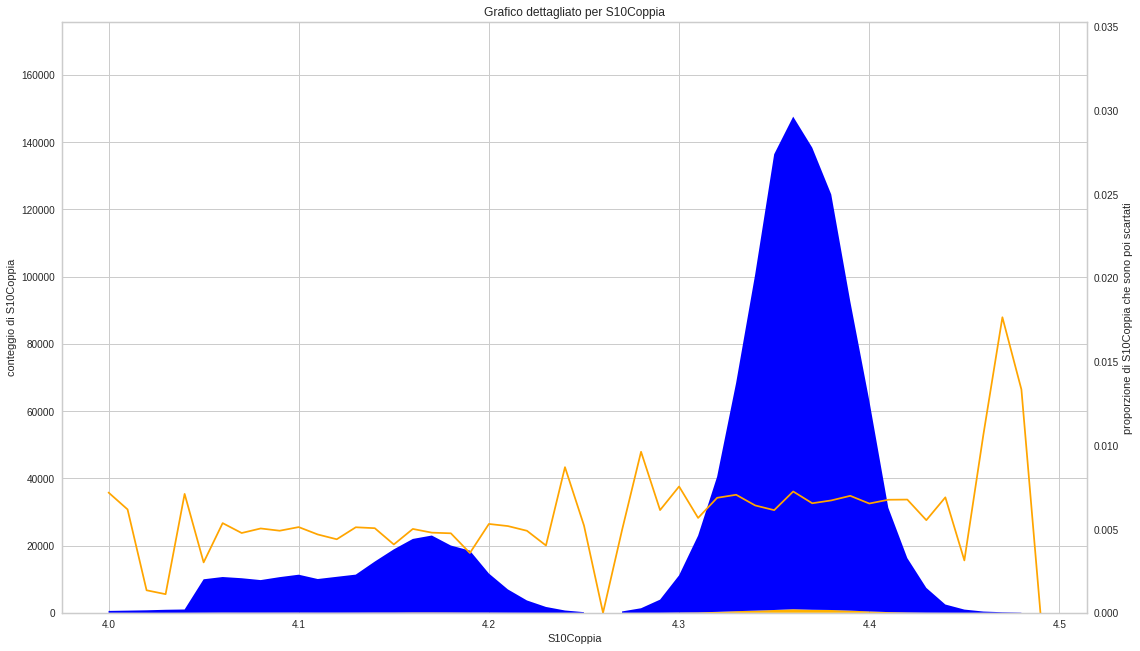

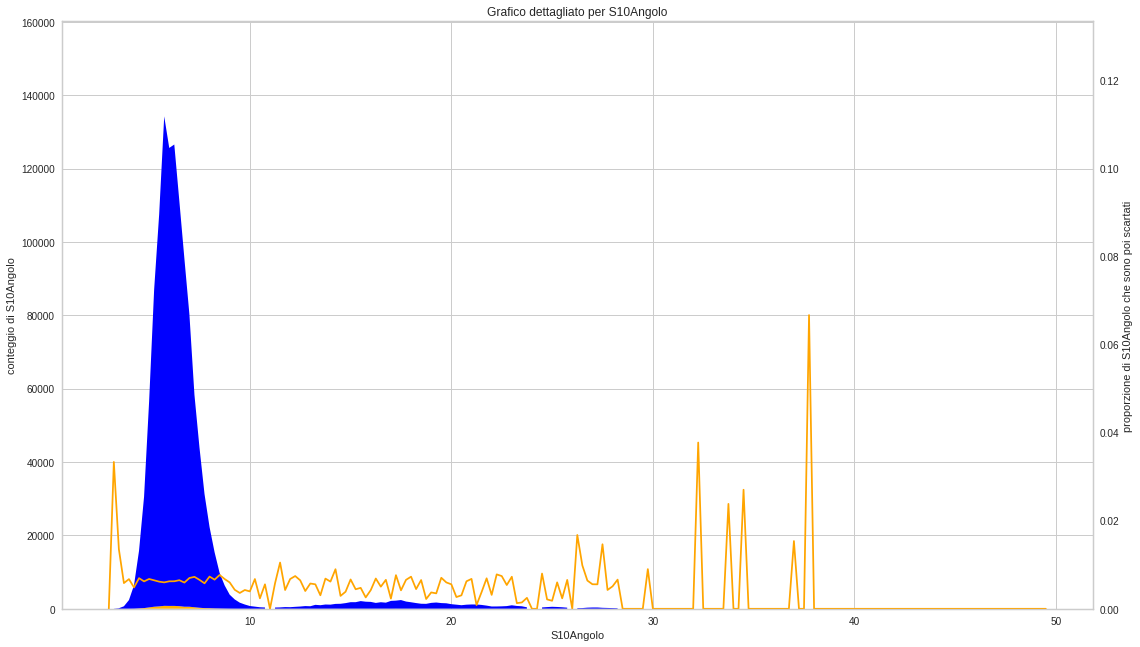

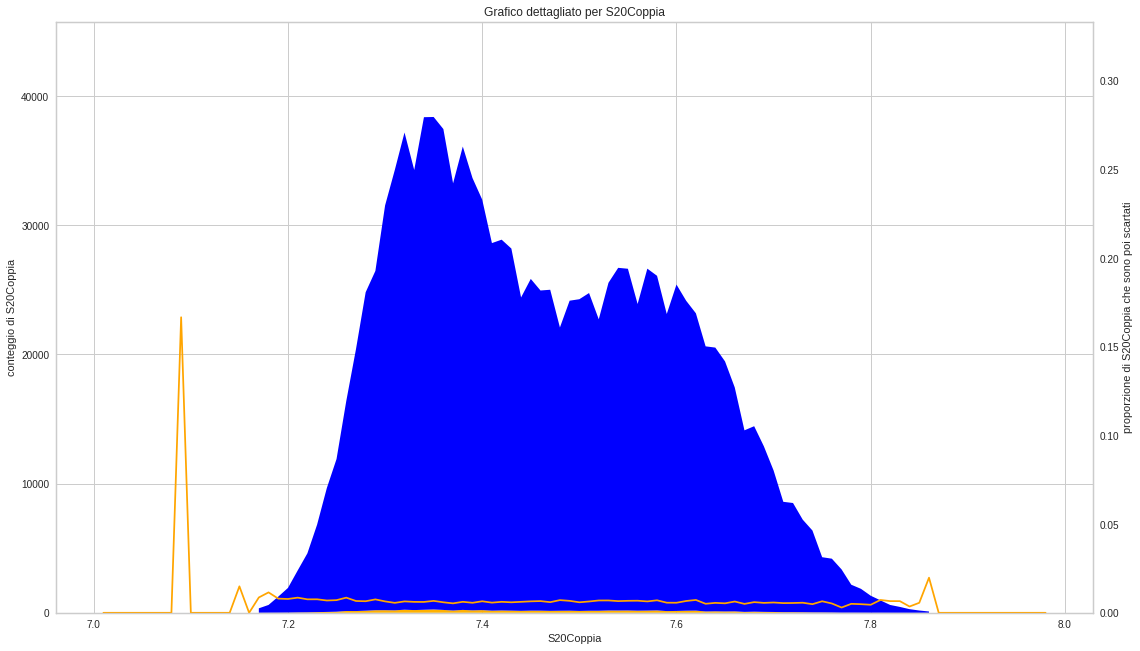

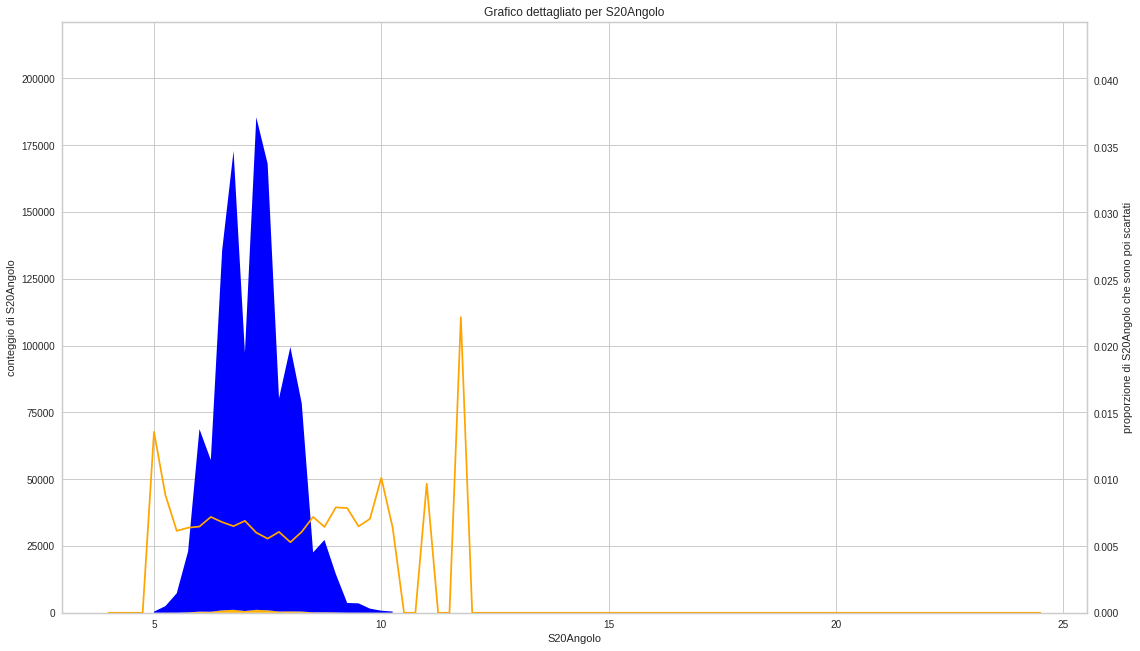

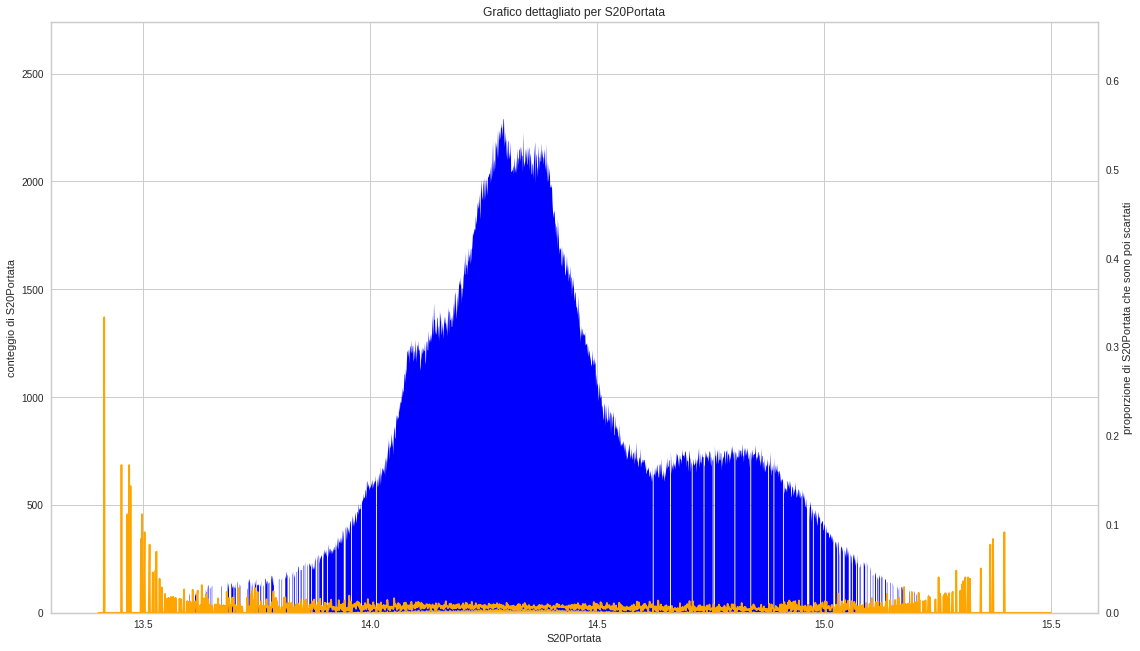

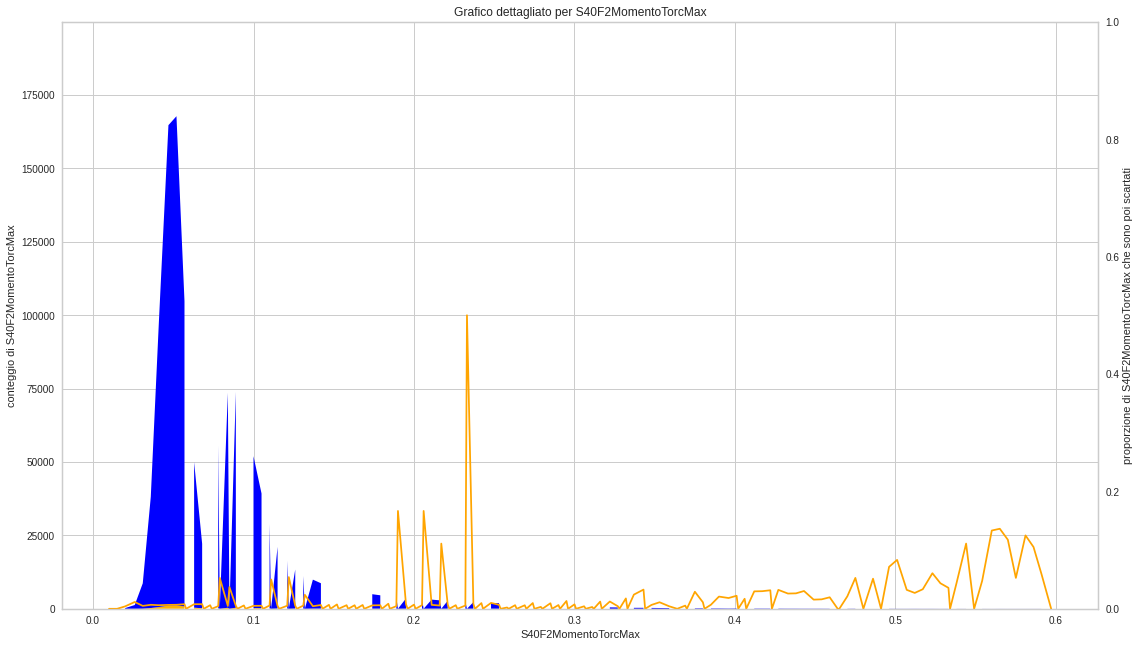

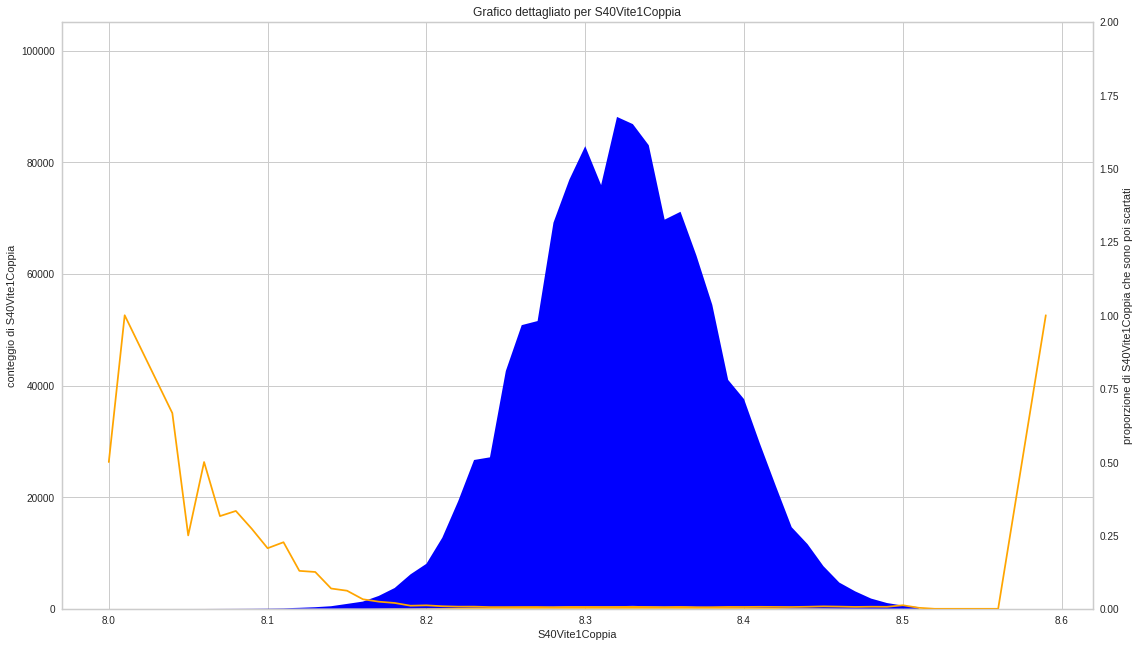

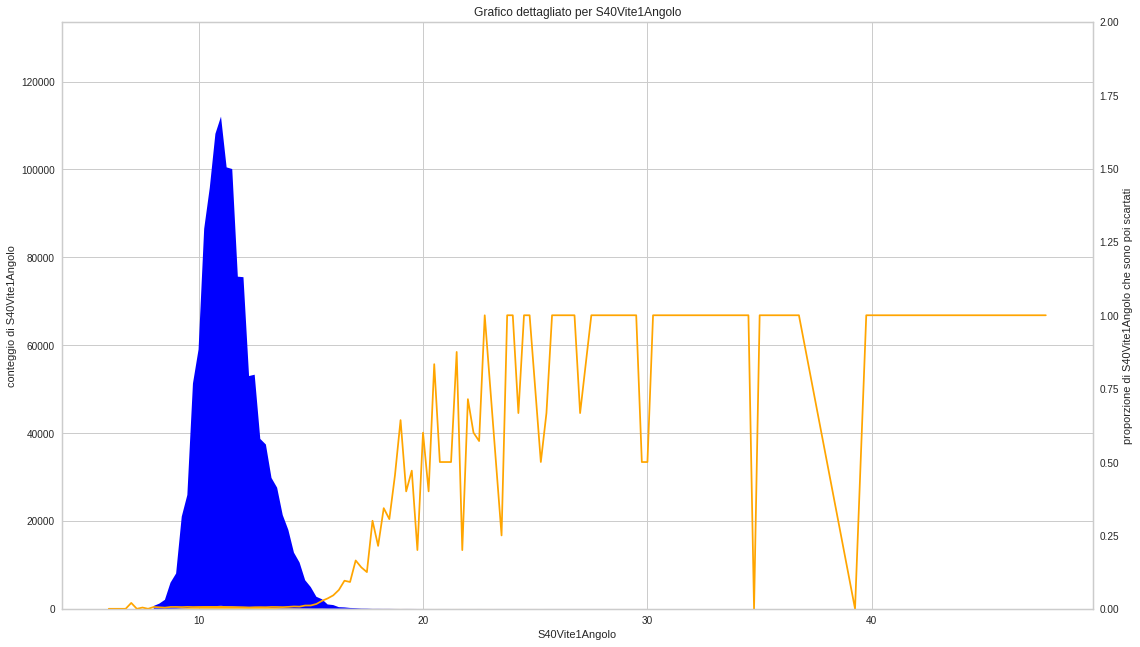

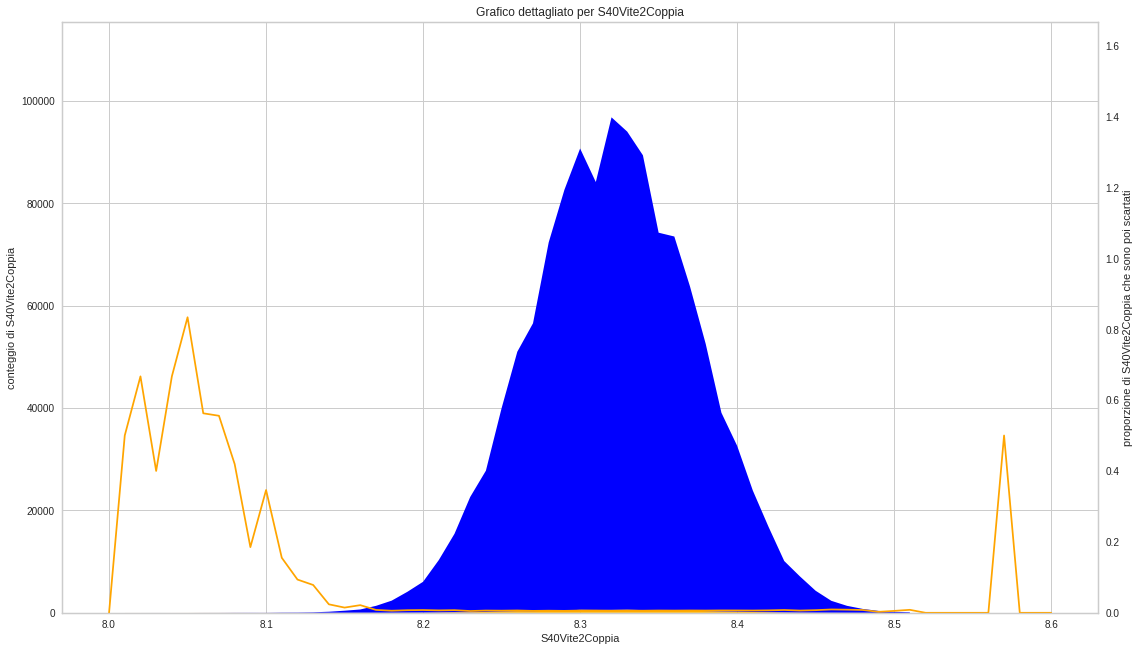

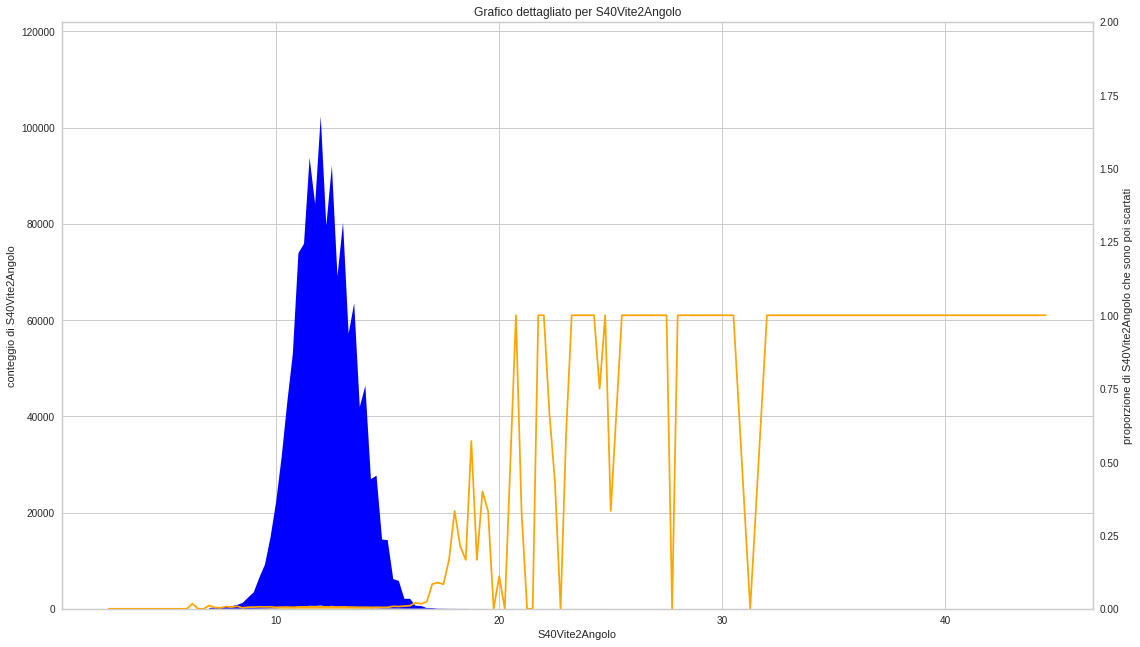

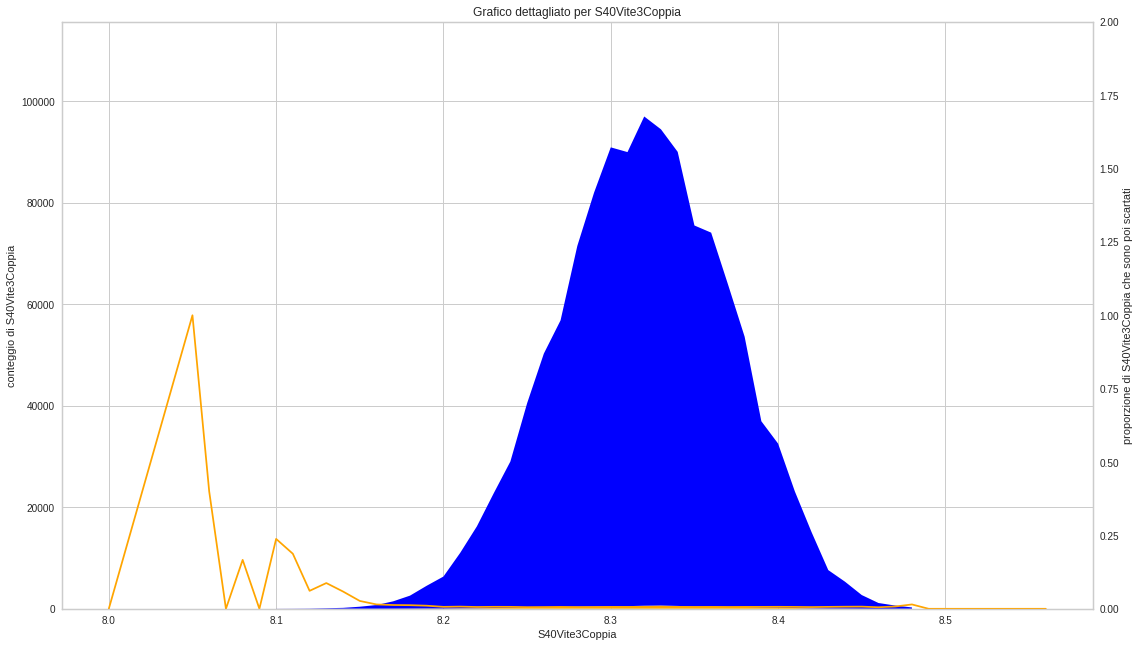

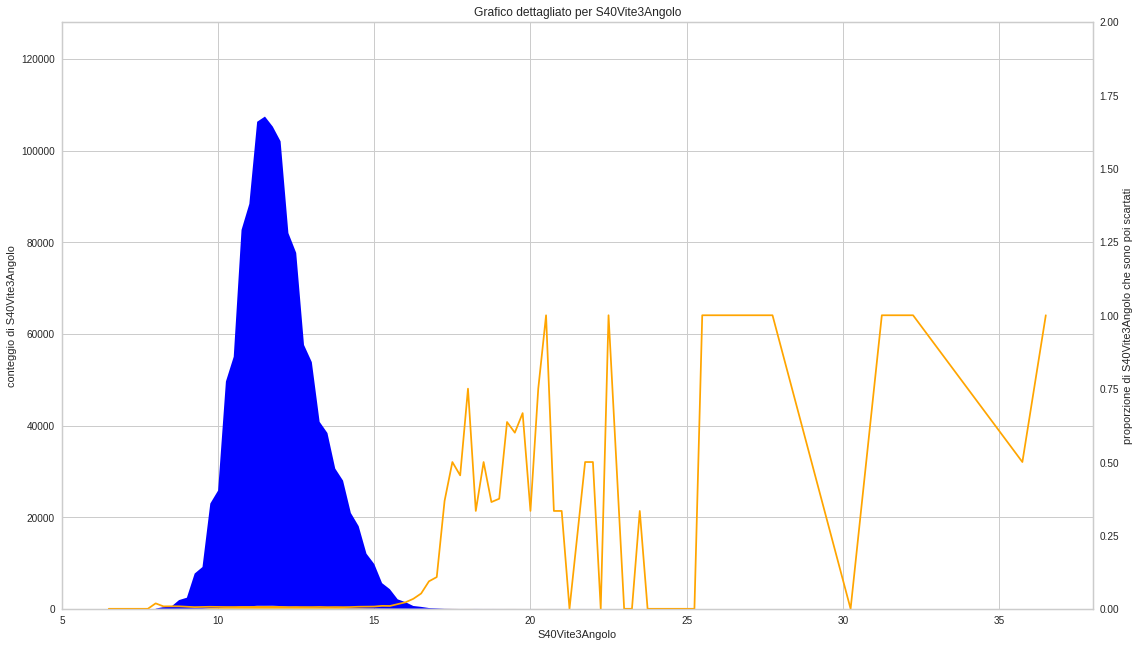

In [ ]:
for i in data_class.columns.values[:-1]:
  plotgraficodett(i)

Dataset senza variabili rischio

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_senza_rischio_S50.pkl', 'wb')
pickle.dump(data_class, file)
file.close()

Creazione di features binarie che indicano l'appertenenza dei valori della misura ad un range in cui la proporzione di scarti sul totale è elevata

In [ ]:
data_class["S10CoppiaRIS"] = data_class["S10Coppia"].apply(lambda x: 1 if (x>4.45) else 0)
data_class["S10AngoloRIS"] = data_class["S10Angolo"].apply(lambda x: 1 if (x>25) else 0)
data_class["S20CoppiaRIS"] = data_class["S20Coppia"].apply(lambda x: 1 if (x>7.15) else 0)
data_class["S20AngoloRIS"] = data_class["S20Angolo"].apply(lambda x: 1 if (x>10) else 0)
data_class["S20PortataRIS"] = data_class["S20Portata"].apply(lambda x: 1 if ((x<13.6)|(x>15.3)) else 0)
data_class["S40F2MomentoTorcMaxRIS"] = data_class["S40F2MomentoTorcMax"].apply(lambda x: 1 if (x>0.2) else 0)
data_class["S40Vite1CoppiaRIS"] = data_class["S40Vite1Coppia"].apply(lambda x: 1 if ((x<8.15)|(x>8.55)) else 0)
data_class["S40Vite1AngoloRIS"] = data_class["S40Vite1Angolo"].apply(lambda x: 1 if (x>17) else 0)
data_class["S40Vite2CoppiaRIS"] = data_class["S40Vite2Coppia"].apply(lambda x: 1 if ((x<8.15)|(x>8.52)) else 0)
data_class["S40Vite2AngoloRIS"] = data_class["S40Vite2Angolo"].apply(lambda x: 1 if (x>17) else 0)
data_class["S40Vite3CoppiaRIS"] = data_class["S40Vite3Coppia"].apply(lambda x: 1 if (x<8.15) else 0)
data_class["S40Vite3AngoloRIS"] = data_class["S40Vite3Angolo"].apply(lambda x: 1 if (x>17) else 0)

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_con_rischio_S50.pkl', 'wb')
pickle.dump(data_class, file)
file.close()

###Standardizzazione

In [ ]:
for i in data_class.columns.values[:-13]:
  media = data_class[str(i)].mean()
  std = data_class[str(i)].std()
  data_class[str(i)] = (data_class[str(i)] - media)/std
data_class

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,pass50,S10CoppiaRIS,S10AngoloRIS,S20CoppiaRIS,S20AngoloRIS,S20PortataRIS,S40F2MomentoTorcMaxRIS,S40Vite1CoppiaRIS,S40Vite1AngoloRIS,S40Vite2CoppiaRIS,S40Vite2AngoloRIS,S40Vite3CoppiaRIS,S40Vite3AngoloRIS
0,-2.224784,3.294657,0.572336,0.378493,0.585662,0.685941,-0.044642,1.395969,0.175395,1.510474,0.012641,0.848171,1,0,0,1,0,0,0,0,0,0,0,0,0
1,-2.542607,3.818618,-0.596072,0.054993,0.747976,1.991802,0.650285,1.586871,-0.396799,1.139144,0.402390,1.632501,1,0,0,1,0,0,0,0,0,0,0,0,0
2,-2.012904,1.348516,-0.084895,0.054993,1.203083,1.767357,-2.998084,2.350477,-1.922664,0.025154,-1.741189,0.063841,1,0,0,1,0,0,0,1,0,0,0,0,0
3,-2.330727,2.022180,0.791414,0.378493,1.094874,0.808365,-1.434495,1.586871,-0.015342,0.210819,-2.325793,0.848171,1,0,0,1,0,0,0,0,0,0,0,0,0
4,-1.906967,1.498219,0.061156,0.378493,1.024859,1.134831,0.650285,1.395969,-1.731944,0.767814,-0.766837,-0.524406,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251946,-3.178248,2.695844,-2.786841,-0.915506,-0.623717,-0.273051,-4.040466,4.641293,-4.592936,5.223775,-3.689875,5.554151,1,0,0,0,0,0,0,1,1,1,1,1,1
1251947,-3.284185,3.519211,-3.224994,2.642993,-1.371621,-0.599517,-2.650612,4.450392,-4.211461,4.481115,-3.884749,4.965903,1,0,0,0,0,0,0,0,1,1,1,1,1
1251948,-3.284185,2.845547,-3.005916,-0.592007,-1.148842,0.481900,-2.998084,3.304984,-4.402198,4.295450,-4.469353,3.593326,1,0,0,0,0,0,0,1,0,1,1,1,0
1251949,-3.284185,3.070102,-2.786841,-1.562506,-1.365257,-0.599517,-3.171803,3.877688,-3.639266,4.295450,-4.274479,4.769821,1,0,0,0,0,0,0,1,0,1,1,1,1


##Classificatori

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import keras
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras import backend as K
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
!pip install -U imbalanced-learn
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report

Using TensorFlow backend.


     |████████████████████████████████| 163kB 3.5MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


Si definisce una semplice funzione di costo (personalizzata per ogni classificatore per essere integrata nel processo di AutoML) che permette di determinare i costi derivanti dall'utilizzo di un classificatore, per rendere più realistico il processo di valutazione delle performance del clasificatore.

In [ ]:
def costoclass(tn, fp, fn, tp):
      return tp*2 + fp*-20 + fn*-1 + tn*2

Shuffling delle osservazioni per togliere la dipendenza temporale

In [ ]:
data_class = data_class.sample(frac=1)

In [ ]:
target = data_class["pass50"]
data_class.drop(columns=["pass50"], inplace = True)

In [ ]:
data_class, data_test, target, target_test = train_test_split(data_class, target, test_size = 0.2, random_state = 2020, stratify = target)

In [ ]:
data_class = pd.concat([data_class, target], axis = 1)

In [ ]:
target = data_class["pass50"]
data_class.drop(columns=["pass50"], inplace = True)

###Sbilanciato

In [ ]:
target.value_counts()

NameError: ignored

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_class, target, test_size = 0.2, shuffle=True, random_state = 2020, stratify = target)

NameError: ignored

In [ ]:
from sklearn.utils import class_weight

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [ ]:
class_weights = {1:class_weights[0], 0:class_weights[1]}
class_weights

####Random Forest

In [ ]:
rfmodel = RandomForestClassifier(class_weight= class_weights)
rfmodel.fit(x_train, y_train)

In [ ]:
pred = rfmodel.predict(x_test)
print(classification_report(pred, y_test))

####XGBoost

In [ ]:
xgbmodel = XGBClassifier(learning_rate=0.001, max_depth= 10, random_state = 2020, class_weight= class_weights)
xgbmodel.fit(x_train, y_train)

In [ ]:
pred = xgbmodel.predict(x_test)
print(classification_report(pred, y_test))

####KNN

In [ ]:
knnmodel = KNeighborsClassifier(n_neighbors=100)
knnmodel.fit(x_train, y_train)

In [ ]:
pred = knnmodel.predict(x_test)
print(classification_report(pred, y_test))

####Neural Network

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
data_shape = np.size(x_train, axis = 1)
data_shape

In [ ]:
nn = Sequential()
nn.add(Dense(12, activation="relu", input_shape=(data_shape, )))
nn.add(Dropout(0.2))
nn.add(Dense(16, activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(12, activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(2, activation='softmax'))
nn.summary()

In [ ]:
adam = keras.optimizers.adam(lr = 0.001)
nn.compile(optimizer=adam, loss="sparse_categorical_crossentropy", metrics = ["acc"])

In [ ]:
network_history = nn.fit(x_train, y_train, batch_size=256, epochs=400, validation_split=0.2, class_weight= class_weights)
def plot_history(network_history, x_plot):
      plt.figure()
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.plot(x_plot, network_history.history['loss'])
      plt.plot(x_plot, network_history.history['val_loss'])
      plt.legend(['Training', 'Validation'])

      plt.figure()
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.plot(x_plot, network_history.history['acc'])
      plt.plot(x_plot, network_history.history['val_acc'])
      plt.legend(['Training', 'Validation'], loc='lower right')
      plt.show()

%matplotlib inline
x_plot = list(range(1,len(network_history.epoch)+1))
plot_history(network_history, x_plot)

In [ ]:
pred = np.argmax(nn.predict(x_test), axis = 1)
pred
print(classification_report(pred, y_test))

###Con Undersampling

In [ ]:
rus = RandomUnderSampler(sampling_strategy = "majority")
data_class_res, target_res = rus.fit_resample(data_class, target)

In [ ]:
target_res.value_counts()

1    7881
0    7881
Name: pass50, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_class_res, target_res, test_size = 0.2, shuffle=True, random_state = 2020, stratify = target_res)

####Random Forest

In [ ]:
rfmodel = RandomForestClassifier(n_estimators=200)
rfmodel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rfmodel.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.50      0.58      0.54      1373
           1       0.63      0.56      0.59      1780

    accuracy                           0.57      3153
   macro avg       0.57      0.57      0.56      3153
weighted avg       0.58      0.57      0.57      3153



####XGBoost

In [ ]:
xgbmodel = XGBClassifier(learning_rate=0.01, max_depth= 10, random_state = 2020)
xgbmodel.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2020,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred = xgbmodel.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.41      0.61      0.49      1056
           1       0.74      0.56      0.63      2097

    accuracy                           0.57      3153
   macro avg       0.57      0.58      0.56      3153
weighted avg       0.63      0.57      0.59      3153



####KNN

In [ ]:
knnmodel = KNeighborsClassifier(n_neighbors=100)
knnmodel.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [ ]:
pred = knnmodel.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.44      0.58      0.50      1178
           1       0.69      0.55      0.61      1975

    accuracy                           0.56      3153
   macro avg       0.56      0.57      0.56      3153
weighted avg       0.59      0.56      0.57      3153



####Neural Network

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
data_shape = np.size(x_train, axis = 1)
data_shape

24

In [ ]:
nn = Sequential()
nn.add(Dense(24, activation="relu", input_shape=(data_shape, )))
nn.add(Dropout(0.3))
nn.add(Dense(16, activation="relu"))
nn.add(Dropout(0.3))
nn.add(Dense(8, activation="relu"))
nn.add(Dropout(0.3))
nn.add(Dense(2, activation='softmax'))
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [ ]:
adam = keras.optimizers.adam(lr = 0.0001)
nn.compile(optimizer=adam, loss="sparse_categorical_crossentropy", metrics = ["acc"])

Train on 10087 samples, validate on 2522 samples
Epoch 1/600
10087/10087 [==============================] - 1s 63us/step - loss: 0.7179 - acc: 0.5024 - val_loss: 0.6920 - val_acc: 0.5214
Epoch 2/600
10087/10087 [==============================] - 0s 9us/step - loss: 0.7123 - acc: 0.5132 - val_loss: 0.6903 - val_acc: 0.5206
Epoch 3/600
10087/10087 [==============================] - 0s 9us/step - loss: 0.7076 - acc: 0.5105 - val_loss: 0.6888 - val_acc: 0.5266
Epoch 4/600
10087/10087 [==============================] - 0s 9us/step - loss: 0.7054 - acc: 0.5109 - val_loss: 0.6879 - val_acc: 0.5274
Epoch 5/600
10087/10087 [==============================] - 0s 9us/step - loss: 0.7059 - acc: 0.5107 - val_loss: 0.6870 - val_acc: 0.5293
Epoch 6/600
10087/10087 [==============================] - 0s 9us/step - loss: 0.7019 - acc: 0.5128 - val_loss: 0.6863 - val_acc: 0.5238
Epoch 7/600
10087/10087 [==============================] - 0s 9us/step - loss: 0.7024 - acc: 0.5075 - val_loss: 0.6856 - val_acc

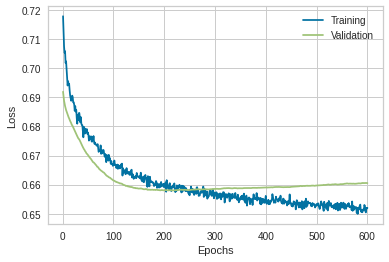

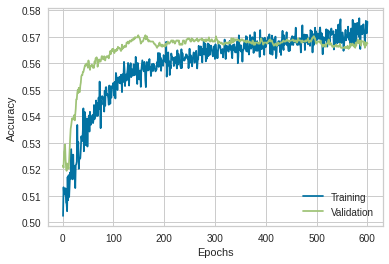

In [ ]:
network_history = nn.fit(x_train, y_train, batch_size=256, epochs=600, validation_split=0.2)
def plot_history(network_history, x_plot):
      plt.figure()
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.plot(x_plot, network_history.history['loss'])
      plt.plot(x_plot, network_history.history['val_loss'])
      plt.legend(['Training', 'Validation'])

      plt.figure()
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.plot(x_plot, network_history.history['acc'])
      plt.plot(x_plot, network_history.history['val_acc'])
      plt.legend(['Training', 'Validation'], loc='lower right')
      plt.show()

%matplotlib inline
x_plot = list(range(1,len(network_history.epoch)+1))
plot_history(network_history, x_plot)

In [ ]:
pred = np.argmax(nn.predict(x_test), axis = 1)
pred
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.16      0.82      0.26       303
           1       0.97      0.53      0.69      2850

    accuracy                           0.56      3153
   macro avg       0.56      0.68      0.48      3153
weighted avg       0.89      0.56      0.65      3153



##Considerazioni Classificatori
A fronte di risultati scadenti con modelli standard (con undersampling del dataset e non) si considera che i classificatori creati non sono in grado di distinguere correttamente le osservazioni-scarti, non si approfondisce ulteriormente l'approccio con classificatori in quanto causerebbe danni sostanziali se fossero implementati.

##Autoencoder per Anomaly Detection (Scarto della produzione)

Carico il dataset senza variabili di rischio

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_senza_rischio_S50.pkl', 'rb')
data_class = pickle.load(file)
file.close()

Standardizzo le misure

In [ ]:
for i in data_class.columns.values[:-1]:
  media = data_class[str(i)].mean()
  std = data_class[str(i)].std()
  data_class[str(i)] = (data_class[str(i)] - media)/std
data_class

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,pass50
0,-2.224784,3.294657,0.572336,0.378493,0.585662,0.685941,-0.044642,1.395969,0.175395,1.510474,0.012641,0.848171,1
1,-2.542607,3.818618,-0.596072,0.054993,0.747976,1.991802,0.650285,1.586871,-0.396799,1.139144,0.402390,1.632501,1
2,-2.012904,1.348516,-0.084895,0.054993,1.203083,1.767357,-2.998084,2.350477,-1.922664,0.025154,-1.741189,0.063841,1
3,-2.330727,2.022180,0.791414,0.378493,1.094874,0.808365,-1.434495,1.586871,-0.015342,0.210819,-2.325793,0.848171,1
4,-1.906967,1.498219,0.061156,0.378493,1.024859,1.134831,0.650285,1.395969,-1.731944,0.767814,-0.766837,-0.524406,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251946,-3.178248,2.695844,-2.786841,-0.915506,-0.623717,-0.273051,-4.040466,4.641293,-4.592936,5.223775,-3.689875,5.554151,1
1251947,-3.284185,3.519211,-3.224994,2.642993,-1.371621,-0.599517,-2.650612,4.450392,-4.211461,4.481115,-3.884749,4.965903,1
1251948,-3.284185,2.845547,-3.005916,-0.592007,-1.148842,0.481900,-2.998084,3.304984,-4.402198,4.295450,-4.469353,3.593326,1
1251949,-3.284185,3.070102,-2.786841,-1.562506,-1.365257,-0.599517,-3.171803,3.877688,-3.639266,4.295450,-4.274479,4.769821,1


In [ ]:
disordinato = data_class.sample(frac = 1, random_state = 2020)
disordinato.reset_index(drop = True, inplace =True)
print("la percentuale di anomalie nel dataset è pari a " + str(len(disordinato[disordinato.pass50 == 0])/len(disordinato)))

la percentuale di anomalie nel dataset è pari a 0.006294989887758917


Si seleziona l'80% per il train e il rimanente per la validation dell'autoencoder

In [ ]:
target = disordinato.pass50
disordinato.drop(columns = "pass50", inplace = True)
x_train = np.array(disordinato.loc[0:(len(disordinato)*0.8)+1])
x_test = np.array(disordinato.loc[(len(disordinato)*0.8)+1:])

####Creazione del modello Autoencoder

In [ ]:
input_dim = x_train.shape[1]

In [ ]:
input_img = Input(shape=(input_dim,) )
encoded1 = Dense(8, activation='tanh')(input_img)
encoded2 = Dense(4, activation='relu')(encoded1)

decoded3 = Dense(8, activation='relu')(encoded2)
decoded4 = Dense(12, activation='tanh')(decoded3)

In [ ]:
autoencoder = Model(input_img, decoded4)
opt = keras.optimizers.Adam(learning_rate=0.01)
autoencoder.compile(optimizer=opt, loss="MSE")
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_89 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_90 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_91 (Dense)             (None, 12)                108       
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data = (x_test, x_test))

Train on 1001560 samples, validate on 250388 samples
Epoch 1/10
1001560/1001560 [==============================] - 12s 12us/step - loss: 0.4095 - val_loss: 0.4003
Epoch 2/10
1001560/1001560 [==============================] - 12s 12us/step - loss: 0.3993 - val_loss: 0.3960
Epoch 3/10
1001560/1001560 [==============================] - 12s 12us/step - loss: 0.3988 - val_loss: 0.4015
Epoch 4/10
1001560/1001560 [==============================] - 12s 12us/step - loss: 0.3988 - val_loss: 0.3974
Epoch 5/10
1001560/1001560 [==============================] - 12s 12us/step - loss: 0.3983 - val_loss: 0.4060
Epoch 6/10
1001560/1001560 [==============================] - 12s 12us/step - loss: 0.3981 - val_loss: 0.3974
Epoch 7/10
1001560/1001560 [==============================] - 12s 12us/step - loss: 0.3977 - val_loss: 0.3974
Epoch 8/10
1001560/1001560 [==============================] - 12s 12us/step - loss: 0.3973 - val_loss: 0.3963
Epoch 9/10
1001560/1001560 [==============================] - 12s 1

In [ ]:
predictions = autoencoder.predict(disordinato)

In [ ]:
mse = np.mean(np.power(disordinato - predictions, 2), axis=1)
disordinato["MSE"] = mse

Effettuo tramite quantili la selezione dei valori outlier (che nel dataset sono 0.6%)

In [ ]:
soglia = np.quantile(disordinato["MSE"], 0.994)
print("verranno considerati anomalie i valori sopra alla soglia " + str(soglia))

verranno considerati anomalie i valori sopra alla soglia 2.819237919210447


In [ ]:
disordinato["conforme"] = 1
disordinato.loc[disordinato.MSE > 2.79, "conforme"] = 0
disordinato = pd.concat([disordinato, target], axis = 1)

Osservazioni non conformi che sono erroneamente classificate come conformi dall'Autoencoder (Falsi Negativi)

In [ ]:
disordinato[(disordinato.conforme == 1) & (disordinato.pass50 == 0)]

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,MSE,conforme,pass50
164,0.211839,0.001188,1.667720,1.348993,-0.375476,-0.497496,-1.434495,2.541378,1.510522,0.025154,0.402390,0.652089,0.595122,1,0
204,-1.695087,-0.298219,2.251924,0.378493,0.550655,0.808365,-0.218361,2.159575,0.366133,0.953479,-1.351441,1.828584,0.456512,1,0
360,0.847480,0.001188,0.718387,-0.592007,2.698895,0.257455,0.650285,-0.322143,-0.587537,-0.531841,-1.546315,0.652089,0.386433,1,0
429,0.105897,-0.373070,-1.545405,0.054993,-1.995407,0.481900,-0.739568,-1.085749,1.319803,0.953479,-0.961692,-0.328324,0.556865,1,0
668,0.211839,-0.223367,0.864438,-0.268507,-0.922879,-0.497496,0.997757,-0.513045,-0.015342,-0.531841,0.402390,-0.916571,0.103306,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250993,-2.012904,0.525149,0.645363,0.378493,0.935748,0.685941,-0.218361,0.059660,-0.968994,0.582149,-1.741189,1.436419,0.332377,1,0
1251328,-0.105983,0.001188,-1.399354,1.348993,0.585662,-0.701537,-0.739568,-0.703946,0.938328,-0.903171,0.012641,-1.308736,0.118178,1,0
1251653,0.317777,-0.597625,-0.815150,-0.592007,0.642951,-0.701537,-0.044642,-0.131242,-0.778275,0.025154,0.012641,1.044254,0.153947,1,0
1251843,0.105897,0.150891,-0.376997,-1.886006,-0.712829,0.379879,2.040138,-1.085749,-0.778275,0.210819,-1.156567,-1.308736,0.713990,1,0


Osservazioni correttamente classificate dall'Autoencoder (Veri Positivi)

In [ ]:
disordinato[(disordinato.conforme == 0) & (disordinato.pass50 == 0)]

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,MSE,conforme,pass50
2376,0.529657,-0.298219,-0.157919,0.378493,-1.091554,-0.599517,-3.171803,5.977603,-0.206062,-0.531841,-0.961692,0.848171,2.829725,0,0
7707,0.635600,-0.373070,-0.888174,1.995993,-0.206798,-0.701537,-4.214201,10.559237,0.175395,0.582149,0.012641,1.436419,8.958191,0,0
13077,0.317777,0.001188,-0.011868,-1.562506,0.066902,0.379879,-0.913287,0.059660,-5.928063,23.975943,0.012641,0.063841,46.493800,0,0
17771,0.635600,-0.223367,-1.472378,-0.592007,-1.479830,-0.599517,-2.998084,7.695716,-0.396799,1.324809,0.792119,2.612914,4.931215,0,0
18390,0.423720,-0.373070,-1.326327,1.348993,-0.038123,-0.375072,-2.129422,2.159575,-4.211461,9.865401,0.792119,0.259924,7.905835,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231621,-0.000041,-0.223367,0.718387,-0.915506,-0.139964,2.644733,-3.345539,5.786702,-2.113401,0.210819,-1.546315,-0.132241,3.301540,0,0
1232153,0.105897,-0.298219,-1.691457,1.025493,0.827539,-0.823962,0.650285,-1.849354,-5.546606,16.549342,-0.961692,0.063841,22.900128,0,0
1236260,0.317777,0.076039,-0.303970,0.054993,-0.200433,-0.701537,-3.171803,8.841124,1.891998,1.324809,1.376742,-0.328324,6.172527,0,0
1239423,0.211839,-0.298219,-1.399354,-0.592007,-0.827399,6.623530,-1.955686,4.832195,-0.206062,0.025154,1.181868,2.220749,4.585716,0,0


Si considera l'approccio che utilizza il modell Autoencoder non efficace poichè riesce ad identificare correttamente solo 365 anomalie delle oltre 7000.

##Autoencoder per Anomaly Detection (Scarto della produzione)  allenato su osservazioni conformi e testato su dati misti conformi-anomalie

Carico il dataset senza variabili di rischio

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_senza_rischio_S50.pkl', 'rb')
data_class = pickle.load(file)
file.close()

Standardizzo le misure

In [ ]:
for i in data_class.columns.values[:-1]:
  media = data_class[str(i)].mean()
  std = data_class[str(i)].std()
  data_class[str(i)] = (data_class[str(i)] - media)/std
data_class

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,pass50
0,-2.224784,3.294657,0.572336,0.378493,0.585662,0.685941,-0.044642,1.395969,0.175395,1.510474,0.012641,0.848171,1
1,-2.542607,3.818618,-0.596072,0.054993,0.747976,1.991802,0.650285,1.586871,-0.396799,1.139144,0.402390,1.632501,1
2,-2.012904,1.348516,-0.084895,0.054993,1.203083,1.767357,-2.998084,2.350477,-1.922664,0.025154,-1.741189,0.063841,1
3,-2.330727,2.022180,0.791414,0.378493,1.094874,0.808365,-1.434495,1.586871,-0.015342,0.210819,-2.325793,0.848171,1
4,-1.906967,1.498219,0.061156,0.378493,1.024859,1.134831,0.650285,1.395969,-1.731944,0.767814,-0.766837,-0.524406,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251946,-3.178248,2.695844,-2.786841,-0.915506,-0.623717,-0.273051,-4.040466,4.641293,-4.592936,5.223775,-3.689875,5.554151,1
1251947,-3.284185,3.519211,-3.224994,2.642993,-1.371621,-0.599517,-2.650612,4.450392,-4.211461,4.481115,-3.884749,4.965903,1
1251948,-3.284185,2.845547,-3.005916,-0.592007,-1.148842,0.481900,-2.998084,3.304984,-4.402198,4.295450,-4.469353,3.593326,1
1251949,-3.284185,3.070102,-2.786841,-1.562506,-1.365257,-0.599517,-3.171803,3.877688,-3.639266,4.295450,-4.274479,4.769821,1


In [ ]:
disordinato = data_class.sample(frac = 1, random_state = 2020)
disordinato.reset_index(drop = True, inplace =True)
print("la percentuale di anomalie nel dataset è pari a " + str(len(disordinato[disordinato.pass50 == 0])/len(disordinato)))

la percentuale di anomalie nel dataset è pari a 0.006294989887758917


Si seleziona l'80% per il train e il rimanente per la validation dell'autoencoder

In [ ]:
scarti = disordinato[disordinato.pass50 == 0]
disordinato = disordinato[disordinato.pass50 == 1]
x_train = disordinato.loc[0:(len(disordinato)*0.8)+1]
x_test = disordinato.loc[(len(disordinato)*0.8)+1:]
validazione = pd.concat([x_test, scarti], axis = 0)
validazione_target = validazione["pass50"]
validazione.drop(columns = "pass50", inplace = True)
x_test.drop(columns = "pass50", inplace = True)
x_train.drop(columns = "pass50", inplace = True)
x_train = np.array(x_train)
x_test = np.array(x_test)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


####Creazione del modello Autoencoder

In [ ]:
input_dim = x_train.shape[1]

In [ ]:
input_img = Input(shape=(input_dim,) )
encoded1 = Dense(10, activation='tanh')(input_img)
encoded2 = Dense(8, activation='relu')(encoded1)
encoded3 = Dense(6, activation='relu')(encoded2)
encoded4 = Dense(4, activation='relu')(encoded3)

decoded1 = Dense(6, activation='relu')(encoded4)
decoded2 = Dense(8, activation='relu')(encoded1)
decoded3 = Dense(10, activation='relu')(encoded2)
decoded4 = Dense(12, activation='tanh')(decoded3)

In [ ]:
autoencoder = Model(input_img, decoded4)
opt = keras.optimizers.Adam(learning_rate=0.01)
autoencoder.compile(optimizer=opt, loss="MSE")
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_93 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_98 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_99 (Dense)             (None, 12)                132       
Total params: 440
Trainable params: 440
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data = (x_test, x_test))

Train on 988956 samples, validate on 255111 samples
Epoch 1/10
988956/988956 [==============================] - 12s 12us/step - loss: 0.2854 - val_loss: 0.2752
Epoch 2/10
988956/988956 [==============================] - 12s 12us/step - loss: 0.2755 - val_loss: 0.2749
Epoch 3/10
988956/988956 [==============================] - 12s 12us/step - loss: 0.2751 - val_loss: 0.2740
Epoch 4/10
988956/988956 [==============================] - 12s 12us/step - loss: 0.2750 - val_loss: 0.2743
Epoch 5/10
988956/988956 [==============================] - 12s 12us/step - loss: 0.2749 - val_loss: 0.2750
Epoch 6/10
988956/988956 [==============================] - 12s 12us/step - loss: 0.2749 - val_loss: 0.2751
Epoch 7/10
988956/988956 [==============================] - 12s 12us/step - loss: 0.2749 - val_loss: 0.2755
Epoch 8/10
988956/988956 [==============================] - 12s 12us/step - loss: 0.2748 - val_loss: 0.2746
Epoch 9/10
988956/988956 [==============================] - 12s 12us/step - loss: 0.

In [ ]:
predictions = autoencoder.predict(validazione)

In [ ]:
mse = np.mean(np.power(validazione - predictions, 2), axis=1)
validazione = pd.DataFrame(validazione, columns = disordinato.columns[:-1])
validazione["MSE"] = mse

In [ ]:
validazione = pd.concat([validazione, validazione_target], axis = 1)

In [ ]:
len(validazione[validazione.pass50 == 0])/len(validazione)

0.029966691002007665

Effettuo tramite quantili la selezione dei valori outlier (che nel dataset sono 3%)

In [ ]:
soglia = np.quantile(validazione["MSE"], 0.97)
print("verranno considerati anomalie i valori sopra alla soglia " + str(soglia))

verranno considerati anomalie i valori sopra alla soglia 1.1907801941927214


In [ ]:
validazione["conforme"] = 1
validazione.loc[validazione.MSE > soglia, "conforme"] = 0

Osservazioni correttamente identificate come anomalie (Veri Positivi)

In [ ]:
validazione[(validazione.pass50 == 0) & (validazione.conforme == 0)]

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,MSE,pass50,conforme
2003,-1.695087,-0.373070,-0.230946,-0.592007,-1.062911,0.257455,0.129094,3.877688,-0.587537,-0.160511,-2.325793,4.377656,2.208155,0,0
2376,0.529657,-0.298219,-0.157919,0.378493,-1.091554,-0.599517,-3.171803,5.977603,-0.206062,-0.531841,-0.961692,0.848171,2.737456,0,0
2976,-2.754487,4.192876,1.521669,0.054993,1.406768,0.481900,-0.739568,1.014167,1.701260,0.210819,0.402390,0.848171,1.200118,0,0
5575,0.635600,-0.373070,-1.326327,-0.592007,-0.219527,-0.599517,0.824021,3.877688,-0.968994,0.953479,0.207515,5.554151,2.561823,0,0
6999,0.211839,-0.522774,-0.669099,1.348993,-0.054036,-0.823962,0.476566,-0.131242,0.556871,-0.346176,-3.689875,3.985491,1.572548,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242313,0.105897,-0.148516,0.864438,-0.915506,-0.445491,-0.701537,1.171493,2.350477,0.938328,0.767814,-2.130919,5.946316,2.369996,0,0
1243234,0.105897,-0.148516,-0.523048,-0.915506,-0.801941,2.420288,-1.260759,4.832195,0.366133,0.025154,-2.130919,1.240336,1.611702,0,0
1246009,-0.000041,-0.223367,-2.129610,0.378493,-0.270451,3.828170,-0.392097,-0.703946,-2.113401,-1.831496,-0.961692,1.436419,1.436285,0,0
1249022,0.741537,-0.298219,-0.230946,1.348993,0.709784,-0.701537,-2.998084,5.404899,0.366133,-0.531841,-1.156567,2.416831,2.523685,0,0


Osservazioni classificate come scarti ma conformi (Falsi Positivi)

In [ ]:
validazione[(validazione.pass50 == 1) & (validazione.conforme == 0)]

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,MSE,pass50,conforme
995265,0.741537,-0.298219,-1.107252,-1.562506,-1.600765,4.460697,-2.303157,-0.513045,-1.350469,-0.903171,-0.571963,-0.720488,1.235191,1,0
995387,0.105897,-0.298219,-1.472378,-0.592007,-0.139964,4.909587,-0.913287,-0.131242,-1.731944,0.210819,-1.741189,1.240336,1.460741,1,0
995396,0.423720,-0.672477,-0.596072,-2.209506,-0.388205,4.460697,-1.260759,-0.513045,-0.015342,0.025154,0.402390,-0.720488,1.238925,1,0
995427,0.423720,-0.447922,-1.253303,-0.268507,-0.270451,6.745955,-0.913287,0.059660,-0.206062,-0.160511,-0.766837,0.063841,2.829170,1,0
995453,0.635600,-0.148516,0.499312,-0.592007,-0.910146,4.685142,-0.218361,-0.894847,-0.206062,-1.274501,-0.377088,-0.328324,1.402297,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251862,-2.860425,5.165946,0.134183,0.378493,1.040773,0.685941,-0.218361,1.205068,-0.206062,-0.531841,-0.377088,-0.328324,1.837081,1,0
1251865,0.423720,0.001188,-0.815150,-1.239006,-1.432091,4.032212,-1.087023,-1.276650,-3.067071,1.139144,-2.715523,0.652089,1.462120,1,0
1251873,-2.648545,4.342579,1.083516,0.378493,1.772764,0.910386,-0.739568,1.968674,-0.015342,1.139144,0.402390,0.848171,1.306604,1,0
1251915,-2.118847,4.118024,1.083516,0.054993,1.597721,0.053414,-0.392097,2.923181,-0.968994,0.767814,-0.182214,1.632501,1.364433,1,0


Le performance del modello Autoencoder sono scarse, si procede a valutare altri approcci.

##Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
data_class

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,pass50
0,-2.224784,3.294657,0.572336,0.378493,0.585662,0.685941,-0.044642,1.395969,0.175395,1.510474,0.012641,0.848171,1
1,-2.542607,3.818618,-0.596072,0.054993,0.747976,1.991802,0.650285,1.586871,-0.396799,1.139144,0.402390,1.632501,1
2,-2.012904,1.348516,-0.084895,0.054993,1.203083,1.767357,-2.998084,2.350477,-1.922664,0.025154,-1.741189,0.063841,1
3,-2.330727,2.022180,0.791414,0.378493,1.094874,0.808365,-1.434495,1.586871,-0.015342,0.210819,-2.325793,0.848171,1
4,-1.906967,1.498219,0.061156,0.378493,1.024859,1.134831,0.650285,1.395969,-1.731944,0.767814,-0.766837,-0.524406,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251946,-3.178248,2.695844,-2.786841,-0.915506,-0.623717,-0.273051,-4.040466,4.641293,-4.592936,5.223775,-3.689875,5.554151,1
1251947,-3.284185,3.519211,-3.224994,2.642993,-1.371621,-0.599517,-2.650612,4.450392,-4.211461,4.481115,-3.884749,4.965903,1
1251948,-3.284185,2.845547,-3.005916,-0.592007,-1.148842,0.481900,-2.998084,3.304984,-4.402198,4.295450,-4.469353,3.593326,1
1251949,-3.284185,3.070102,-2.786841,-1.562506,-1.365257,-0.599517,-3.171803,3.877688,-3.639266,4.295450,-4.274479,4.769821,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_class[data_class.columns[:-1]], data_class.pass50, test_size = 0.2, shuffle=True, random_state = 2020, stratify = target)

In [ ]:
iso = IsolationForest(n_estimators = 200, contamination=0.006, random_state= 2020)
iso.fit(x_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.006,
                max_features=1.0, max_samples='auto', n_estimators=200,
                n_jobs=None, random_state=2020, verbose=0, warm_start=False)

In [ ]:
anomalie = iso.predict(x_test)

In [ ]:
y_test = y_test.replace(to_replace = 0, value = -1)

In [ ]:
print(classification_report(anomalie, y_test))

              precision    recall  f1-score   support

          -1       0.01      0.01      0.01      1488
           1       0.99      0.99      0.99    248902

    accuracy                           0.99    250390
   macro avg       0.50      0.50      0.50    250390
weighted avg       0.99      0.99      0.99    250390



Si può osservare che l'approccio basato sull'algoritmo Isolation Forest non permette di garantire risultati soddisfacenti, si stabilisce che in un contesto reale tale classificatore risulterebbe inefficace.

##1 Class SVM (non presentato nel report)

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
from sklearn.utils import resample

In [ ]:
int(len(data_class)*0.2)

250389

In [ ]:
for i in data_class.columns.values[:-1]:
  media = data_class[str(i)].mean()
  std = data_class[str(i)].std()
  data_class[str(i)] = (data_class[str(i)] - media)/std
data_class

In [ ]:
data_class_resample = resample(data_class, n_samples = int(len(data_class)*0.2), stratify = data_class.pass50, random_state = 2020)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_class_resample[data_class_resample.columns[:-1]], data_class_resample.pass50, test_size = 0.2, shuffle=True, random_state = 2020, stratify = data_class_resample.pass50)

In [ ]:
clf = OneClassSVM(gamma='auto').fit(x_train)
predictions = clf.predict(x_test)

In [ ]:
classification_report(predictions, y_test)

L'approccio con 1-class SVM impiega un tempo troppo elevato da garantire un risultato per colpa della numerosità e della complessità del dataset. Di conseguenza non viene utilizzato.

##Mutivariate Gaussian Distribution for Anomaly Detection

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione.pkl', 'rb')
data_class = pickle.load(file)
file.close()
data_class.head()

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,pass50
0,4.11,18.00,7.54,7.50,14.589,0.115,8.32,13.25,8.33,14.25,8.32,13.00,1
1,4.08,19.75,7.38,7.25,14.640,0.179,8.36,13.50,8.30,13.75,8.34,14.00,1
2,4.13,11.50,7.45,7.25,14.783,0.168,8.15,14.50,8.22,12.25,8.23,12.00,1
3,4.10,13.75,7.57,7.50,14.749,0.121,8.24,13.50,8.32,12.50,8.20,13.00,1
4,4.14,12.00,7.47,7.50,14.727,0.137,8.36,13.25,8.23,13.25,8.28,11.25,1


Separazione del dataset in:


*   Train (imparo i parametri mu e sigma2)
*   Validation (scelgo il threshold tale per cui, se la probabilità p è inferiore, procedo a determinare se si tratta di una anomalia)
*   Test (prevedo i valori delle osservazioni e confronto con la realtà)



La porzione di Train viene utilizzata per valutare media e varianza delle variabili coinvolte nel modello

In [ ]:
train = data_class.loc[:int(len(data_class)*0.60)-1]
validation = data_class[int(len(data_class)*0.60):int(len(data_class)*0.80)]
test = data_class.loc[int(len(data_class)*0.80):]
print(len(data_class))
print(len(train)+len(validation)+len(test))

1251948
1251948


In [ ]:
train.drop(columns="pass50", inplace = True)
train

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo
0,4.11,18.00,7.54,7.50,14.589,0.115,8.32,13.25,8.33,14.25,8.32,13.00
1,4.08,19.75,7.38,7.25,14.640,0.179,8.36,13.50,8.30,13.75,8.34,14.00
2,4.13,11.50,7.45,7.25,14.783,0.168,8.15,14.50,8.22,12.25,8.23,12.00
3,4.10,13.75,7.57,7.50,14.749,0.121,8.24,13.50,8.32,12.50,8.20,13.00
4,4.14,12.00,7.47,7.50,14.727,0.137,8.36,13.25,8.23,13.25,8.28,11.25
...,...,...,...,...,...,...,...,...,...,...,...,...
751163,4.43,6.00,7.34,7.50,14.575,0.068,8.34,12.75,8.31,12.00,8.39,12.50
751164,4.43,5.75,7.29,7.75,14.654,0.057,8.30,11.25,8.38,12.50,8.32,12.00
751165,4.35,5.50,7.33,9.00,14.594,0.036,8.35,10.50,8.29,11.50,8.41,12.25
751166,4.38,6.25,7.26,8.50,14.705,0.057,8.36,11.75,8.32,11.75,8.43,11.50


Funzione che ottiene media e deviazione standard delle osservazioni del Train Set

In [ ]:
train.reset_index(drop=True,inplace = True)
train = train.to_numpy()

In [ ]:
def estimateGaussian(X):
    n = np.size(X, 1)
    m = np.size(X, 0)
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    
    mu = np.reshape((1/m)*np.sum(X, 0), (1, n))
    sigma2 = np.reshape((1/m)*np.sum(np.power((X - mu),2), 0),(1, n))
    
    return mu, sigma2

mu, sigma2 = estimateGaussian(train)

In [ ]:
print(mu)
print(sigma2)

[[ 4.29195377  7.64699214  7.52844602  6.98838639 14.45869011  0.08521055
   8.32258616 11.43502535  8.32027581 12.04611797  8.31492149 12.01034658]]
[[1.23939494e-02 1.71040150e+01 1.38886835e-02 4.26612591e-01
  1.36788182e-01 1.30882763e-03 3.55738284e-03 2.14756540e+00
  3.03649821e-03 1.81658423e+00 2.88385968e-03 1.95310269e+00]]


Funzione di calcolo della gaussiana multivariata

In [ ]:
def multivariateGaussian(X, mu, sigma2):
     X = np.matrix(X)
     n = np.size(sigma2, 1)
     m = np.size(sigma2, 0)
     
     if n == 1 or m == 1:
         sigma2 = np.diag(sigma2[0, :])
     X = X - mu
     pi = math.pi
     det = np.linalg.det(sigma2)
     inv = np.linalg.inv(sigma2)
     val = np.reshape((-0.5)*np.sum(np.multiply((X@inv),X), 1),(np.size(X, 0), 1))
     p = np.power(2*pi, -n/2)*np.power(det, -0.5)*np.exp(val)
     
     return p

Calcolo le probabilità per il Validation Set

In [ ]:
target_val = validation.pass50
validation.drop(columns="pass50", inplace = True)
validation.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo
751170,4.38,5.50,7.36,7.50,14.685,0.052,8.25,11.25,8.30,12.75,8.33,11.25
751171,4.36,5.75,7.33,8.25,14.583,0.047,8.40,11.00,8.32,12.25,8.41,11.75
751172,4.37,4.50,7.34,8.00,14.636,0.047,8.41,12.00,8.30,12.25,8.32,11.25
751173,4.36,4.75,7.27,8.25,14.589,0.052,8.33,12.25,8.30,11.75,8.42,11.50
751174,4.43,5.75,7.31,8.00,14.684,0.052,8.28,12.50,8.36,12.50,8.38,11.75


In [ ]:
validation.reset_index(drop=True,inplace = True)
validation = validation.to_numpy()
p = multivariateGaussian(validation, mu, sigma2)
print(p.shape)
print(p)

(250390, 1)
[[2.07333772]
 [0.08905494]
 [0.44386576]
 ...
 [0.98009107]
 [0.04769883]
 [1.85607434]]


Scelgo il threshold in base al quale stabilire se è o meno anomalia

In [ ]:
def selectThreshHold(yval, pval):
    
    F1 = 0
    bestF1 = 0
    bestEpsilon = 0
    
    stepsize = (np.max(pval) - np.min(pval))/1000
        
    epsVec = np.arange(np.min(pval), np.max(pval), stepsize)
    noe = len(epsVec)
    
    for eps in range(noe):
        epsilon = epsVec[eps]
        pred = (pval < epsilon)
        prec, rec = 0,0
        tp,fp,fn = 0,0,0
        
        try:
            for i in range(np.size(pval,0)):
                if pred[i] == 1 and yval[i] == 1:
                    tp+=1
                elif pred[i] == 1 and yval[i] == 0:
                    fp+=1
                elif pred[i] == 0 and yval[i] == 1:
                    fn+=1
            prec = tp/(tp + fp)
            rec = tp/(tp + fn)
            F1 = 2*prec*rec/(prec + rec)
            if F1 > bestF1:
                bestF1 = F1
                bestEpsilon = epsilon
        except ZeroDivisionError:
            print('Warning dividing by zero!!')          
       
    return bestF1, bestEpsilon

In [ ]:
target_val = target_val.to_numpy()
F1, epsilon = selectThreshHold(target_val, p)
print('Epsilon e F1:',epsilon, F1)

Warning dividing by zero!!


Effettuo il confronto con epsilon soglia per ottenere i valori anomali, poi confronto con il valore reale di pass50

In [ ]:
epsilon

35.83995371238133

In [ ]:
outliers = p < epsilon

In [ ]:
predetti = []
for i in outliers:
  predetti.append(i[0, 0])
predetti[:10]

[True, True, True, True, True, True, True, True, True, True]

In [ ]:
temp = data_class[int(len(data_class)*0.60):int(len(data_class)*0.80)]
temp = temp[temp.pass50 == 0]
print("il numero di outliers trovato è di: " + str(len(predetti)) + " / " + str(len(temp)))

il numero di outliers trovato è di: 250390 / 1592


Il valore di epsilon permette di varificare che tutte le osservazioni sono classificate come anomale;<br>Considerando il valore ottenuto dall'ultima porzione di codice, sono indicate infatti 250390 osservazioni anomale (poichè il valore di epsilon è troppo elevato), il metodo viene scartato anche a fronte del tempo che  stato impiegato per identificare i parametri corretti (troppo lungo, 4 ore circa). 

Effettuo previsioni sul Test Set

In [ ]:
target_test = test.pass50
test.drop(columns="pass50", inplace = True)
test

In [ ]:
pval = multivariateGaussian(test, mu, sigma2)
print(pval.shape)
print(pval)

##Considerazioni Stazione S50
Tutti i metodi che sono stati implementati non hanno portato all'ottenimento di una soluzione che possa garantire performance accettabili per poter essere implementata nel sistema dell'azienda.

#Classificazione S60

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/outlierLOF_classe.pkl', 'rb')
b = pickle.load(file)
file.close()
b[:2]

array([-1,  1])

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_processed.pkl', 'rb')
data_class = pickle.load(file)
file.close()
data_class.head()

,DMC,UltimaStazione,Data_Ingresso,Data_Uscita,Esito_S10,Esito_S20,Esito_S40,Esito_S50,Esito_S60,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,S60F2DepresMin,S60F2Coppia,S60F2Velocita,S60F2TenutaVNR,Data_Ingresso_day,Data_Ingresso_month,Data_Ingresso_year,Success
0,128209000052012000033100146508066R,70,2020-04-29 07:49:57,2020-04-29 07:55:45.863,1,1,1,1,1,4.11,18.00,7.54,7.50,14.589,0.115,8.32,13.25,8.33,14.25,8.32,13.00,997.200012,1.2,645.500000,2.89,396.0,0.6,2020-04-29,2020-04,2020,1
2,128209000052012000031100146508066R,70,2020-04-29 07:29:25,2020-04-29 07:45:57.413,1,1,1,1,1,4.08,19.75,7.38,7.25,14.640,0.179,8.36,13.50,8.30,13.75,8.34,14.00,997.299988,1.4,638.400024,2.67,406.0,0.5,2020-04-29,2020-04,2020,1
3,128209000052012000028100146508066R,70,2020-04-29 07:27:52,2020-04-29 07:41:15.767,1,1,1,1,1,4.13,11.50,7.45,7.25,14.783,0.168,8.15,14.50,8.22,12.25,8.23,12.00,999.400024,2.3,587.900024,2.59,406.0,0.5,2020-04-29,2020-04,2020,1
4,128209000052012000027100146508066R,70,2020-04-29 07:27:21,2020-04-29 07:40:41.913,1,1,1,1,1,4.10,13.75,7.57,7.50,14.749,0.121,8.24,13.50,8.32,12.50,8.20,13.00,999.099976,1.2,622.700012,2.75,408.0,0.6,2020-04-29,2020-04,2020,1
5,128209000052012000032100146508066R,70,2020-04-29 07:18:53,2020-04-29 07:46:31.537,1,1,1,1,1,4.14,12.00,7.47,7.50,14.727,0.137,8.36,13.25,8.23,13.25,8.28,11.25,997.900024,1.3,630.700012,2.79,403.0,0.5,2020-04-29,2020-04,2020,1


In [ ]:
data_class.drop(columns = ["Data_Ingresso", "Data_Uscita", "Data_Ingresso_day",	"Data_Ingresso_month",	"Data_Ingresso_year"], inplace = True)

In [ ]:
def controllarange(x, inf, sup):
  if (x>=inf) & (x<=sup):
    res = 1
  elif (((x < inf) & (x >= 0))) |( x > sup):
    res = 0
  else:
    res = -1
  return res

In [ ]:
def controllarangept(x, inf, sup):
  if (x>=inf) & (x<=sup):
    res = 1
  elif (((x < inf) & (x > 0))) |( x > sup):
    res = 0
  else:
    res = -1
  return res

In [ ]:
data_class["S10AngoloINT"] = data_class["S10Angolo"].apply(lambda x : controllarange(x, 0, 50))
data_class["S10CoppiaINT"] = data_class["S10Coppia"].apply(lambda x : controllarange(x, 4, 4.5))
data_class["S20AngoloINT"] = data_class["S20Angolo"].apply(lambda x : controllarange(x, 0, 50))
data_class["S20PortataINT"] = data_class["S20Portata"].apply(lambda x : controllarange(x, 13.4, 15.5))
data_class["S20CoppiaINT"] = data_class["S20Coppia"].apply(lambda x : controllarange(x, 6, 8))
data_class["S40Vite2CoppiaINT"] = data_class["S40Vite2Coppia"].apply(lambda x : controllarange(x, 7, 9))
data_class["S40Vite2AngoloINT"] = data_class["S40Vite2Angolo"].apply(lambda x : controllarange(x, 0, 50))
data_class["S40Vite1CoppiaINT"] = data_class["S40Vite1Coppia"].apply(lambda x : controllarange(x, 7, 9))
data_class["S40Vite1AngoloINT"] = data_class["S40Vite1Angolo"].apply(lambda x : controllarange(x, 0, 50))
data_class["S40Vite3CoppiaINT"] = data_class["S40Vite3Coppia"].apply(lambda x : controllarange(x, 7, 9))
data_class["S40Vite3AngoloINT"] = data_class["S40Vite3Angolo"].apply(lambda x : controllarange(x, 0, 50))
data_class["S40F2MomentoTorcMaxINT"] = data_class["S40F2MomentoTorcMax"].apply(lambda x : 1 if (x>=-0.1) & (x<=0.6) else 0)
data_class["S50PressionePTINT"] = data_class["S50PressionePT"].apply(lambda x : controllarangept(x, 900, 1150))
data_class["S50TenutaPZINT"] = data_class["S50TenutaPZ"].apply(lambda x : controllarange(x, -np.Inf, 2.4))
data_class["S60F2CoppiaINT"] = data_class["S60F2Coppia"].apply(lambda x : controllarange(x, 0.05, 4))
data_class["S60F2DepresMinINT"] = data_class["S60F2DepresMin"].apply(lambda x : controllarange(x, 330, np.Inf))
data_class["S60F2VelocitaINT"] = data_class["S60F2Velocita"].apply(lambda x : controllarange(x, 390, 410))
data_class["S60F2TenutaVNRINT"] = data_class["S60F2TenutaVNR"].apply(lambda x : controllarange(x, -np.Inf, 3))

In [ ]:
data_class = data_class[(data_class.S10CoppiaINT == 1) & (data_class.S10AngoloINT == 1) & (data_class.S20CoppiaINT == 1)
& (data_class.S20AngoloINT == 1) &(data_class.S20PortataINT == 1) & (data_class.S40F2MomentoTorcMaxINT == 1)
& (data_class.S40Vite1CoppiaINT == 1) & (data_class.S40Vite2CoppiaINT == 1) & (data_class.S40Vite3CoppiaINT == 1)
& (data_class.S40Vite1AngoloINT == 1) & (data_class.S40Vite2AngoloINT == 1) & (data_class.S40Vite3AngoloINT == 1)
& (data_class.S50PressionePTINT == 1) & (data_class.S50TenutaPZINT == 1)]

In [ ]:
data_class

,DMC,UltimaStazione,Esito_S10,Esito_S20,Esito_S40,Esito_S50,Esito_S60,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,S60F2DepresMin,S60F2Coppia,S60F2Velocita,S60F2TenutaVNR,Success,S10AngoloINT,S10CoppiaINT,S20AngoloINT,S20PortataINT,S20CoppiaINT,S40Vite2CoppiaINT,S40Vite2AngoloINT,S40Vite1CoppiaINT,S40Vite1AngoloINT,S40Vite3CoppiaINT,S40Vite3AngoloINT,S40F2MomentoTorcMaxINT,S50PressionePTINT,S50TenutaPZINT,S60F2CoppiaINT,S60F2DepresMinINT,S60F2VelocitaINT,S60F2TenutaVNRINT
0,128209000052012000033100146508066R,70,1,1,1,1,1,4.11,18.00,7.54,7.50,14.589,0.115,8.32,13.25,8.33,14.25,8.32,13.00,997.200012,1.2,645.500000,2.89,396.0,0.6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,128209000052012000031100146508066R,70,1,1,1,1,1,4.08,19.75,7.38,7.25,14.640,0.179,8.36,13.50,8.30,13.75,8.34,14.00,997.299988,1.4,638.400024,2.67,406.0,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,128209000052012000028100146508066R,70,1,1,1,1,1,4.13,11.50,7.45,7.25,14.783,0.168,8.15,14.50,8.22,12.25,8.23,12.00,999.400024,2.3,587.900024,2.59,406.0,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,128209000052012000027100146508066R,70,1,1,1,1,1,4.10,13.75,7.57,7.50,14.749,0.121,8.24,13.50,8.32,12.50,8.20,13.00,999.099976,1.2,622.700012,2.75,408.0,0.6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,128209000052012000032100146508066R,70,1,1,1,1,1,4.14,12.00,7.47,7.50,14.727,0.137,8.36,13.25,8.23,13.25,8.28,11.25,997.900024,1.3,630.700012,2.79,403.0,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245773,2282090000516013000041??!0146508066R,70,1,1,1,1,1,4.02,16.00,7.08,6.50,14.209,0.068,8.09,17.50,8.08,19.25,8.13,19.00,969.000000,0.4,632.299988,3.03,410.0,0.9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
245786,2282090000515351000111??!0146508066R,70,1,1,1,1,1,4.01,18.75,7.02,9.25,13.974,0.052,8.17,17.25,8.10,18.25,8.12,18.25,991.500000,0.6,549.099976,2.25,405.0,0.6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
245788,2282090000515351000041??!0146508066R,70,1,1,1,1,1,4.01,16.50,7.05,6.75,14.044,0.105,8.15,15.75,8.09,18.00,8.09,16.50,990.700012,1.0,379.899994,2.05,355.0,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
245789,2282090000515351000071??!0146508066R,70,1,1,1,1,1,4.01,17.25,7.08,6.00,13.976,0.052,8.14,16.50,8.13,18.00,8.10,18.00,991.500000,0.5,401.000000,1.92,402.0,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
data_class.reset_index(drop=True, inplace = True)

Creo variabile che indica l'esito alla stazione S60

In [ ]:
data_class["listaesito"] = data_class[["S60F2CoppiaINT", "S60F2DepresMinINT", "S60F2VelocitaINT", "S60F2TenutaVNRINT"]].apply(lambda x: list(x), axis = 1) 
data_class["pass60"] = data_class["listaesito"].apply(lambda x: 0 if ((0 in x) | (-1 in x)) else 1)

In [ ]:
data_class["pass60"].value_counts()

1    1208825
0      35245
Name: pass60, dtype: int64

In [ ]:
data_class.groupby(["S60F2CoppiaINT", "S60F2DepresMinINT", "S60F2VelocitaINT", "S60F2TenutaVNRINT"])["pass60"].count()

S60F2CoppiaINT  S60F2DepresMinINT  S60F2VelocitaINT  S60F2TenutaVNRINT
-1               1                 1                 1                          2
 0               0                 0                 0                          3
                                                     1                        798
                                   1                 1                         63
                 1                 0                 1                          1
                                   1                 1                          5
 1              -1                 0                 1                          1
                                   1                 1                         61
                 0                 0                 1                          2
                                   1                 1                       2744
                 1                 0                 0                          2
                           

In [ ]:
data_class = data_class[(data_class.Esito_S10 == 1) & (data_class.Esito_S20 == 1) & (data_class.Esito_S40 == 1) & (data_class.Esito_S50 == 1)]

In [ ]:
data_class= data_class[["UltimaStazione", "S10Coppia",	"S10Angolo",	"S20Coppia",	"S20Angolo",	"S20Portata",	"S40F2MomentoTorcMax",	"S40Vite1Coppia",	"S40Vite1Angolo",	"S40Vite2Coppia",	"S40Vite2Angolo",	"S40Vite3Coppia", "S40Vite3Angolo", "S50PressionePT", "S50TenutaPZ", "pass60"]]
data_class

,UltimaStazione,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,pass60
0,70,4.11,18.00,7.54,7.50,14.589,0.115,8.32,13.25,8.33,14.25,8.32,13.00,997.200012,1.2,1
1,70,4.08,19.75,7.38,7.25,14.640,0.179,8.36,13.50,8.30,13.75,8.34,14.00,997.299988,1.4,1
2,70,4.13,11.50,7.45,7.25,14.783,0.168,8.15,14.50,8.22,12.25,8.23,12.00,999.400024,2.3,1
3,70,4.10,13.75,7.57,7.50,14.749,0.121,8.24,13.50,8.32,12.50,8.20,13.00,999.099976,1.2,1
4,70,4.14,12.00,7.47,7.50,14.727,0.137,8.36,13.25,8.23,13.25,8.28,11.25,997.900024,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244065,70,4.02,16.00,7.08,6.50,14.209,0.068,8.09,17.50,8.08,19.25,8.13,19.00,969.000000,0.4,1
1244066,70,4.01,18.75,7.02,9.25,13.974,0.052,8.17,17.25,8.10,18.25,8.12,18.25,991.500000,0.6,1
1244067,70,4.01,16.50,7.05,6.75,14.044,0.105,8.15,15.75,8.09,18.00,8.09,16.50,990.700012,1.0,0
1244068,70,4.01,17.25,7.08,6.00,13.976,0.052,8.14,16.50,8.13,18.00,8.10,18.00,991.500000,0.5,1


In [ ]:
data_class.groupby(["UltimaStazione", "pass60"])["pass60"].count()

UltimaStazione  pass60
50              0            3574
                1            1651
60              0              65
                1            2330
70              0           31284
                1         1204841
Name: pass60, dtype: int64

In [ ]:
data_class= data_class[["S10Coppia",	"S10Angolo",	"S20Coppia",	"S20Angolo",	"S20Portata",	"S40F2MomentoTorcMax",	"S40Vite1Coppia",	"S40Vite1Angolo",	"S40Vite2Coppia",	"S40Vite2Angolo",	"S40Vite3Coppia", "S40Vite3Angolo", "S50PressionePT", "S50TenutaPZ", "pass60"]]
data_class

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,pass60
0,4.11,18.00,7.54,7.50,14.589,0.115,8.32,13.25,8.33,14.25,8.32,13.00,997.200012,1.2,1
1,4.08,19.75,7.38,7.25,14.640,0.179,8.36,13.50,8.30,13.75,8.34,14.00,997.299988,1.4,1
2,4.13,11.50,7.45,7.25,14.783,0.168,8.15,14.50,8.22,12.25,8.23,12.00,999.400024,2.3,1
3,4.10,13.75,7.57,7.50,14.749,0.121,8.24,13.50,8.32,12.50,8.20,13.00,999.099976,1.2,1
4,4.14,12.00,7.47,7.50,14.727,0.137,8.36,13.25,8.23,13.25,8.28,11.25,997.900024,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244065,4.02,16.00,7.08,6.50,14.209,0.068,8.09,17.50,8.08,19.25,8.13,19.00,969.000000,0.4,1
1244066,4.01,18.75,7.02,9.25,13.974,0.052,8.17,17.25,8.10,18.25,8.12,18.25,991.500000,0.6,1
1244067,4.01,16.50,7.05,6.75,14.044,0.105,8.15,15.75,8.09,18.00,8.09,16.50,990.700012,1.0,0
1244068,4.01,17.25,7.08,6.00,13.976,0.052,8.14,16.50,8.13,18.00,8.10,18.00,991.500000,0.5,1


In [ ]:
data_class.columns.values

array(['S10Coppia', 'S10Angolo', 'S20Coppia', 'S20Angolo', 'S20Portata',
       'S40F2MomentoTorcMax', 'S40Vite1Coppia', 'S40Vite1Angolo',
       'S40Vite2Coppia', 'S40Vite2Angolo', 'S40Vite3Coppia',
       'S40Vite3Angolo', 'S50PressionePT', 'S50TenutaPZ', 'pass60'],
      dtype=object)

In [ ]:
"""file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_S60.pkl', 'wb')
pickle.dump(data_class, file)
file.close()"""

"file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_S60.pkl', 'wb')\npickle.dump(data_class, file)\nfile.close()"

### Dataset Intermedio Classificazione

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_S60.pkl', 'rb')
data_class = pickle.load(file)
file.close()

In [ ]:
data_class

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,pass60
0,4.11,18.00,7.54,7.50,14.589,0.115,8.32,13.25,8.33,14.25,8.32,13.00,997.200012,1.2,1
1,4.08,19.75,7.38,7.25,14.640,0.179,8.36,13.50,8.30,13.75,8.34,14.00,997.299988,1.4,1
2,4.13,11.50,7.45,7.25,14.783,0.168,8.15,14.50,8.22,12.25,8.23,12.00,999.400024,2.3,1
3,4.10,13.75,7.57,7.50,14.749,0.121,8.24,13.50,8.32,12.50,8.20,13.00,999.099976,1.2,1
4,4.14,12.00,7.47,7.50,14.727,0.137,8.36,13.25,8.23,13.25,8.28,11.25,997.900024,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244065,4.02,16.00,7.08,6.50,14.209,0.068,8.09,17.50,8.08,19.25,8.13,19.00,969.000000,0.4,1
1244066,4.01,18.75,7.02,9.25,13.974,0.052,8.17,17.25,8.10,18.25,8.12,18.25,991.500000,0.6,1
1244067,4.01,16.50,7.05,6.75,14.044,0.105,8.15,15.75,8.09,18.00,8.09,16.50,990.700012,1.0,0
1244068,4.01,17.25,7.08,6.00,13.976,0.052,8.14,16.50,8.13,18.00,8.10,18.00,991.500000,0.5,1


Breve analisi degli scarti rispetto alle variabili esplicative

In [ ]:
def plotgraficodett(attributo):
  fig, ax1 = plt.subplots(figsize=(16, 9))
  palette = ["#ffb200", "#0000ff"]


  quantino = pd.DataFrame(data_class[data_class.pass60 == 0].groupby(str(attributo))["pass60"].count())
  quantiok = pd.DataFrame(data_class[data_class.pass60 == 1].groupby(str(attributo))["pass60"].count())
  quantitot = pd.merge(quantiok, quantino, how ="left", left_index=True, right_index=True)
  quantitot["pass60_y"].fillna(0)


  ax1.set_xlabel(str(attributo))
  ax1.set_ylabel("conteggio di " + str(attributo))
  ax1.stackplot(quantitot.index, quantitot["pass60_y"], quantitot["pass60_x"], labels=["prodotti scartati", "quanti conformi"], colors = palette)
  ax1.tick_params(axis='y')

  ax2 = ax1.twinx()

  totale = data_class.groupby(str(attributo))["pass60"].count()
  scartisutot = data_class[data_class.pass60 == 0].groupby(str(attributo))["pass60"].count()/totale
  scartisutot.fillna(0, inplace = True)


  ax2.set_ylabel("proporzione di " + str(attributo) + " che sono poi scartati")
  ax2.plot(scartisutot.index, scartisutot, color="orange")
  ax2.tick_params(axis='y')
  ax2.grid(False)

  max1 = quantitot.pass60_x.max()
  max2 = quantitot.pass60_y.max()

  ax1.set_ylim(0,max(max1, max2)*1.2)
  ax2.set_ylim(0,scartisutot.max()*2)
  fig.tight_layout()
  plt.title("Grafico dettagliato per " + str(attributo))
  plt.show()

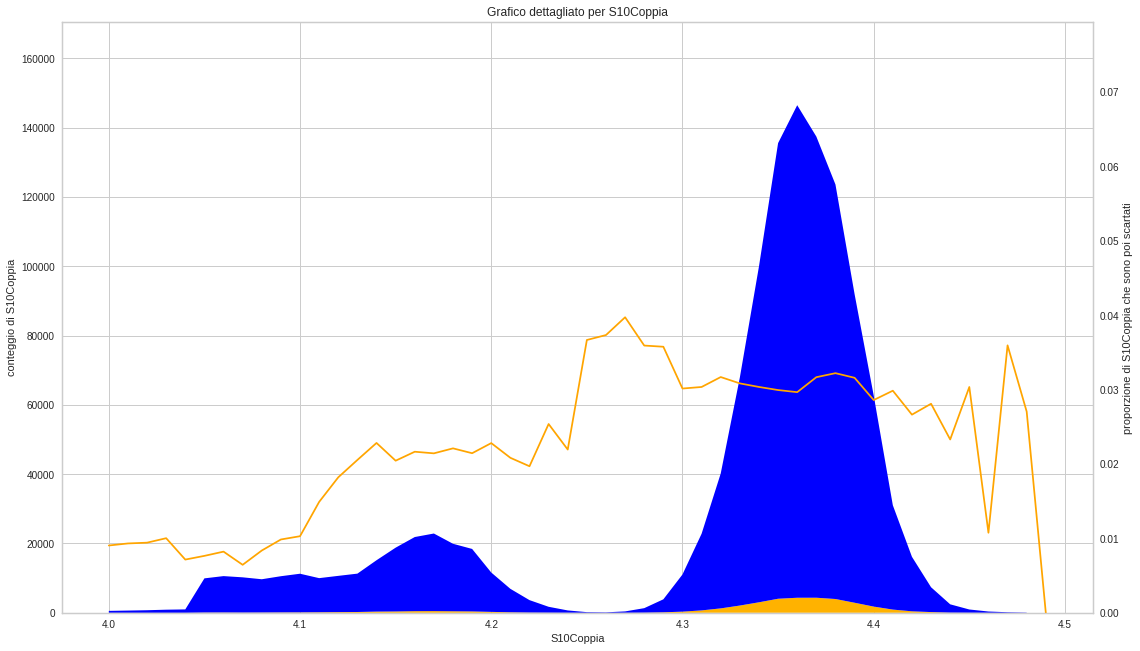

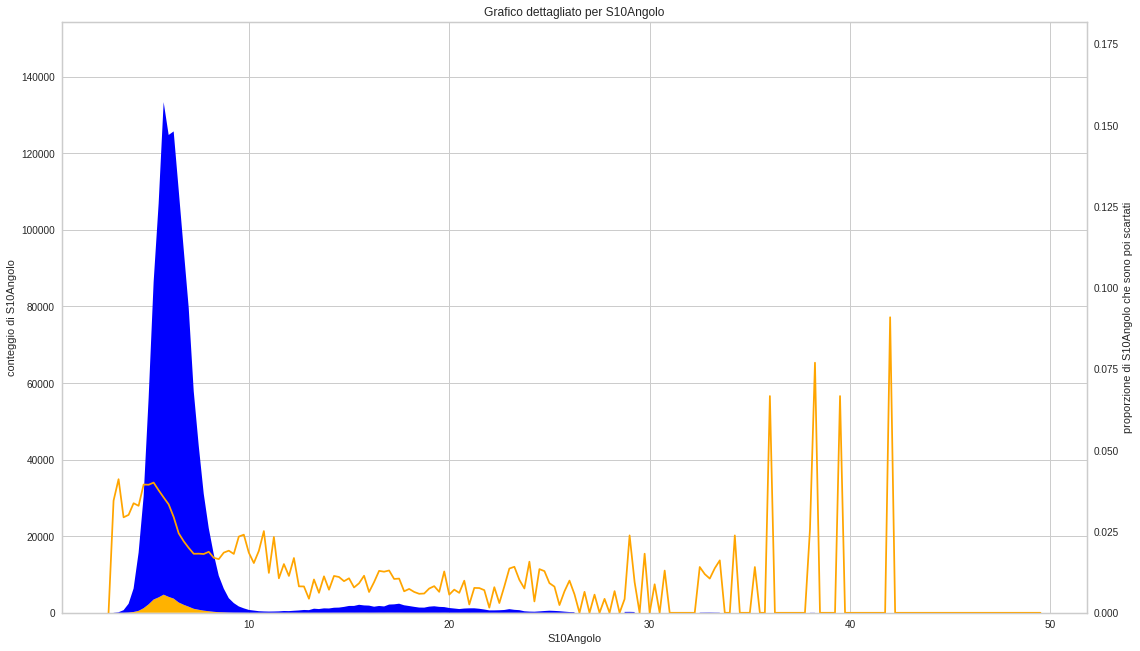

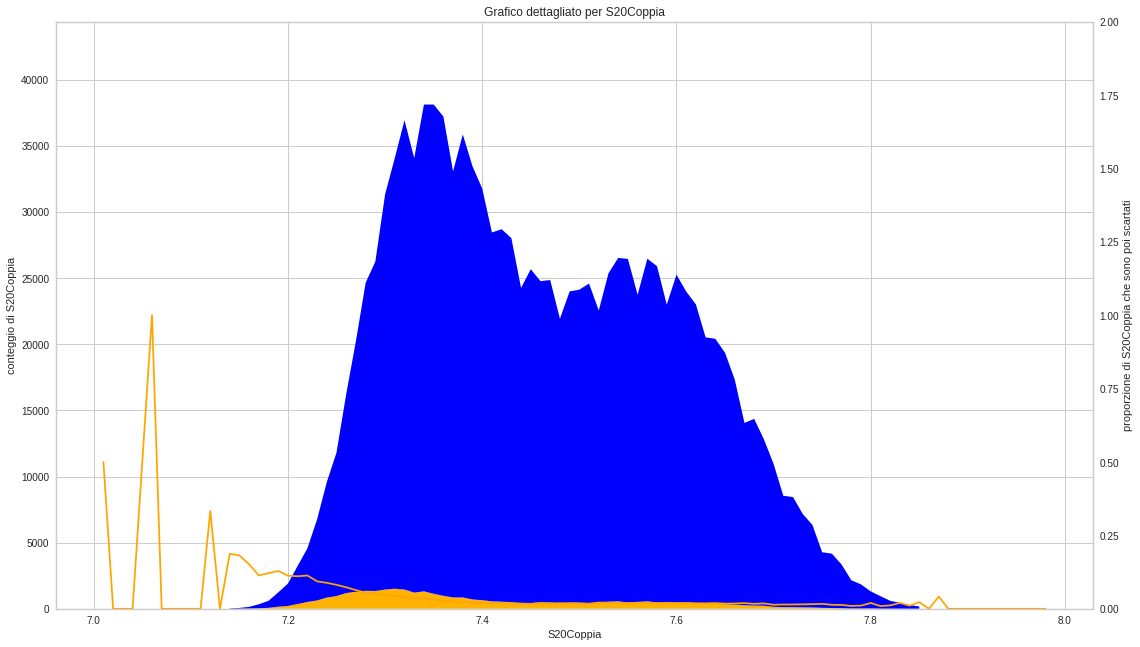

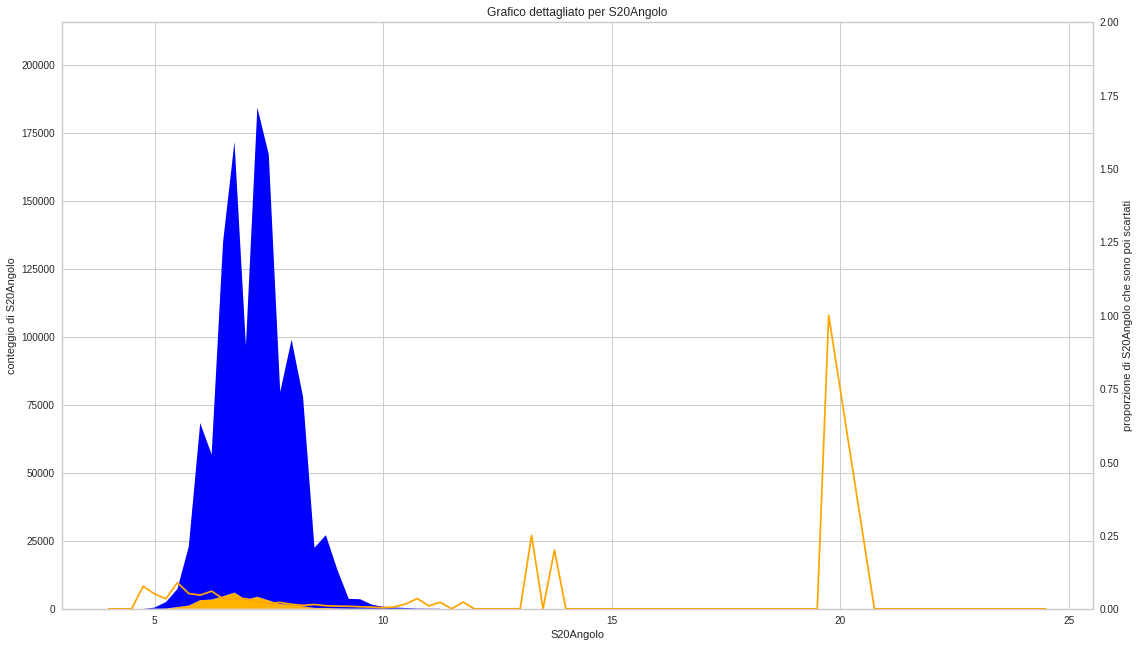

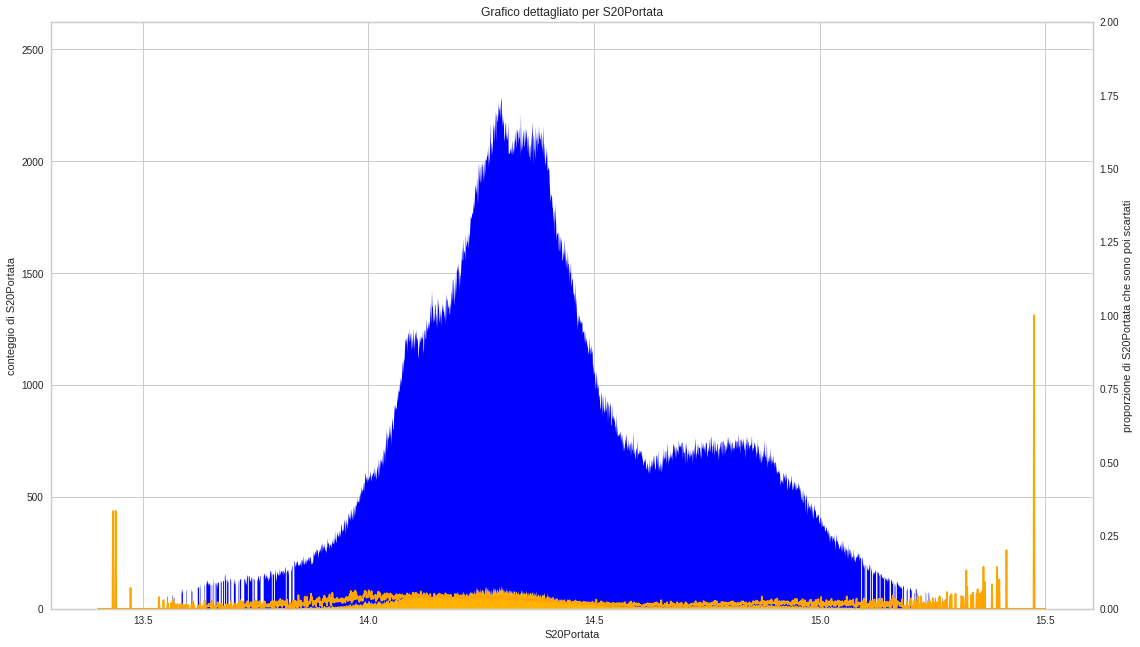

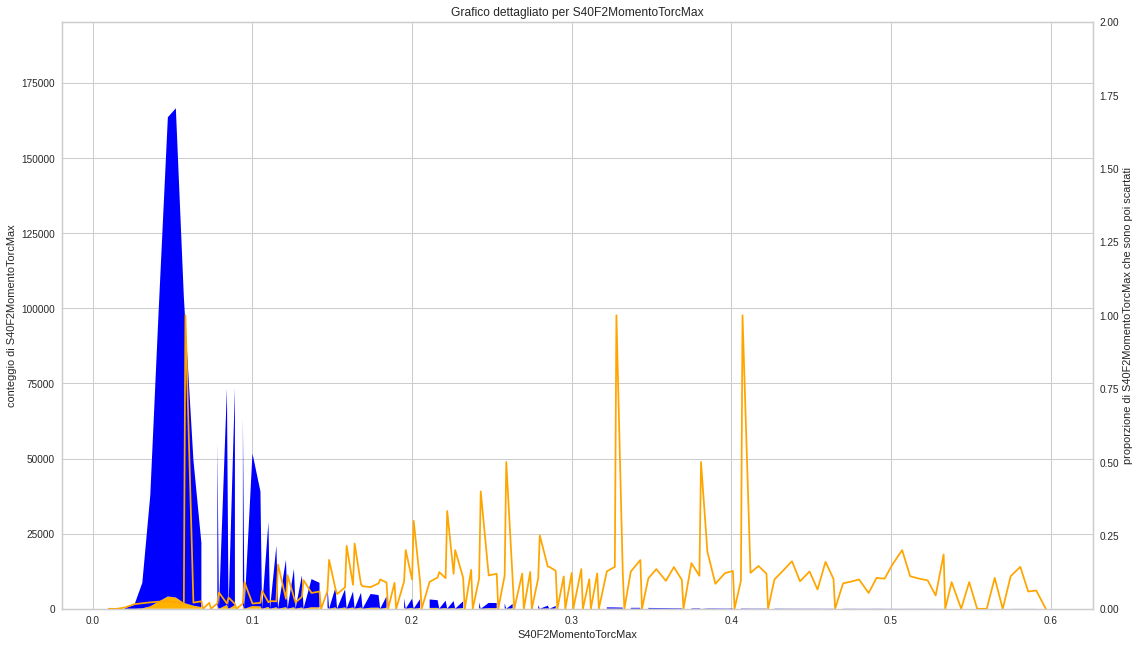

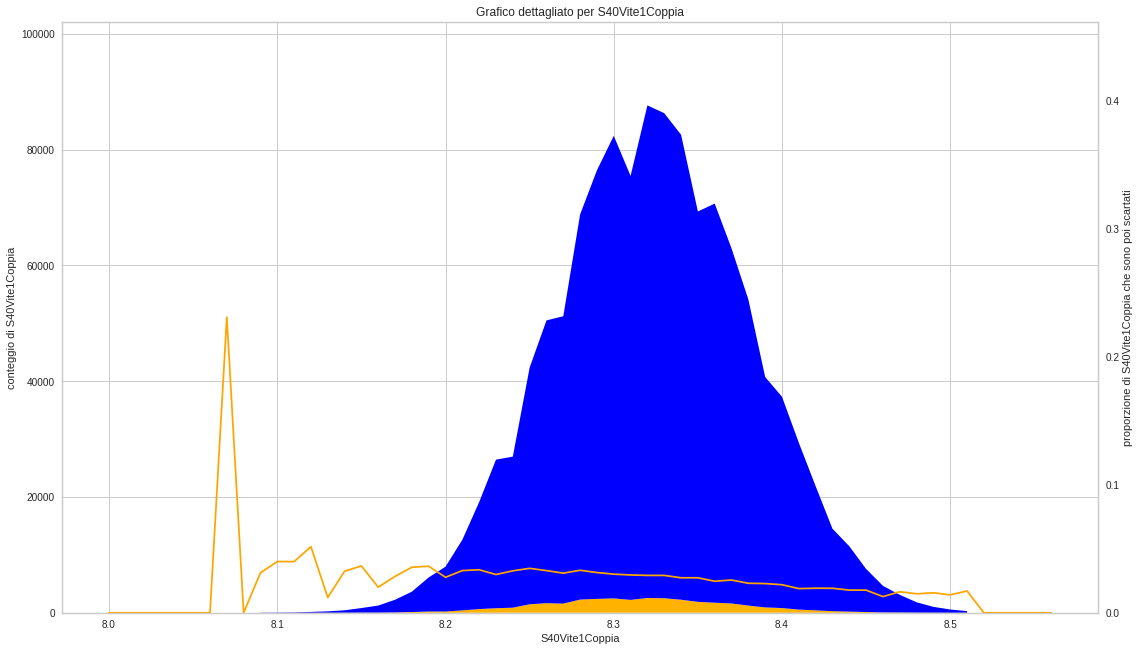

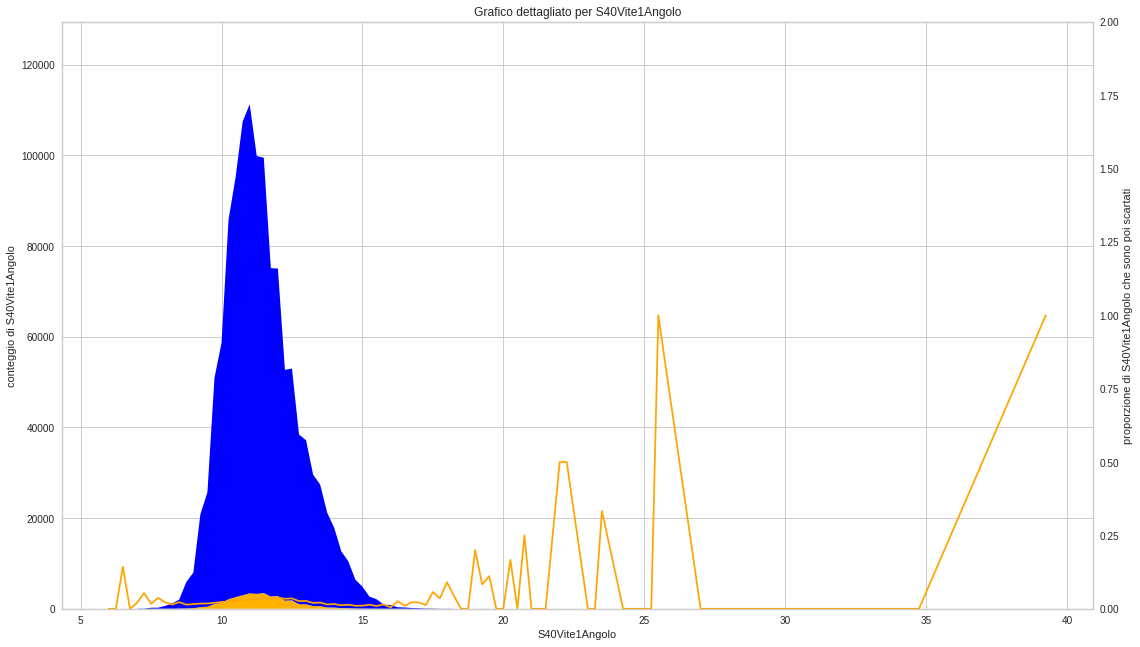

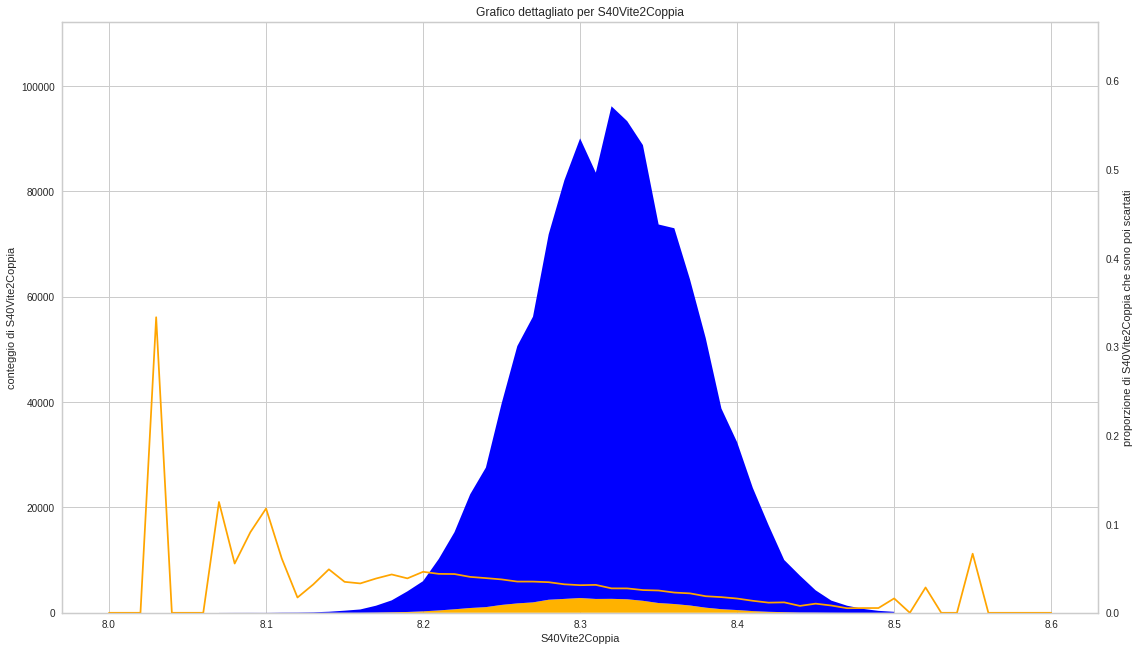

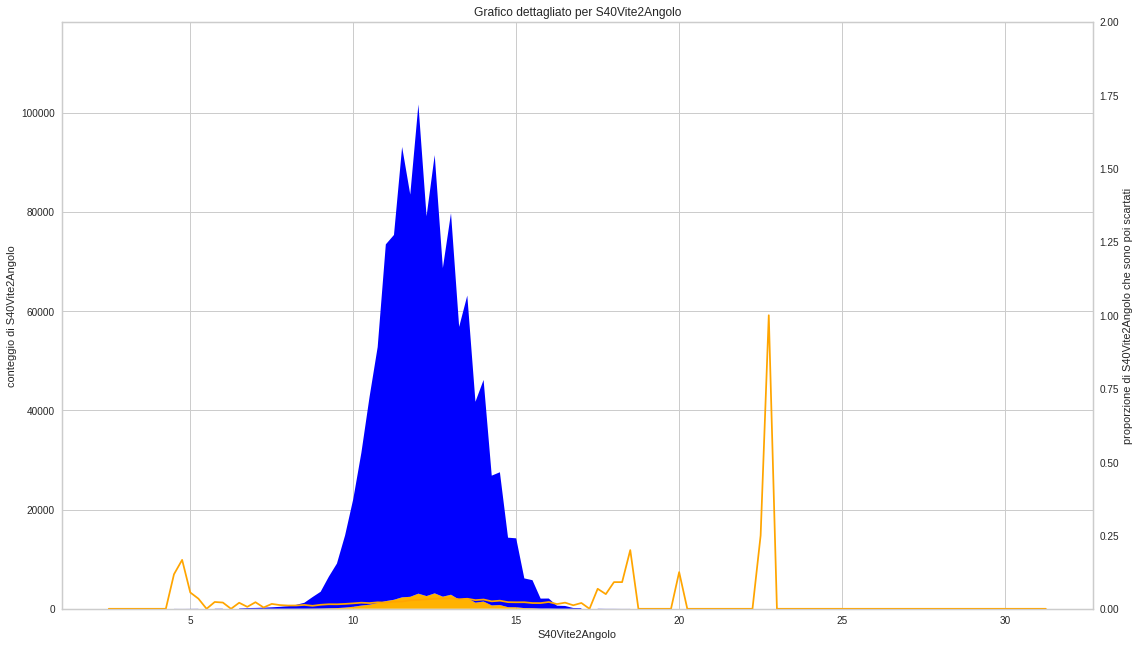

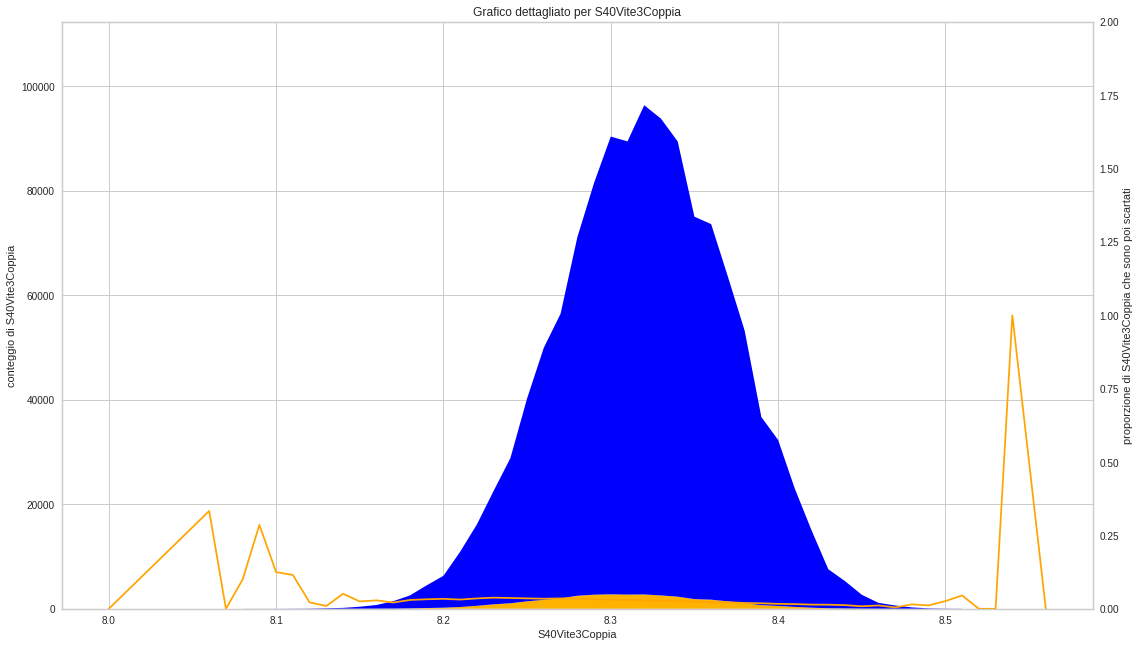

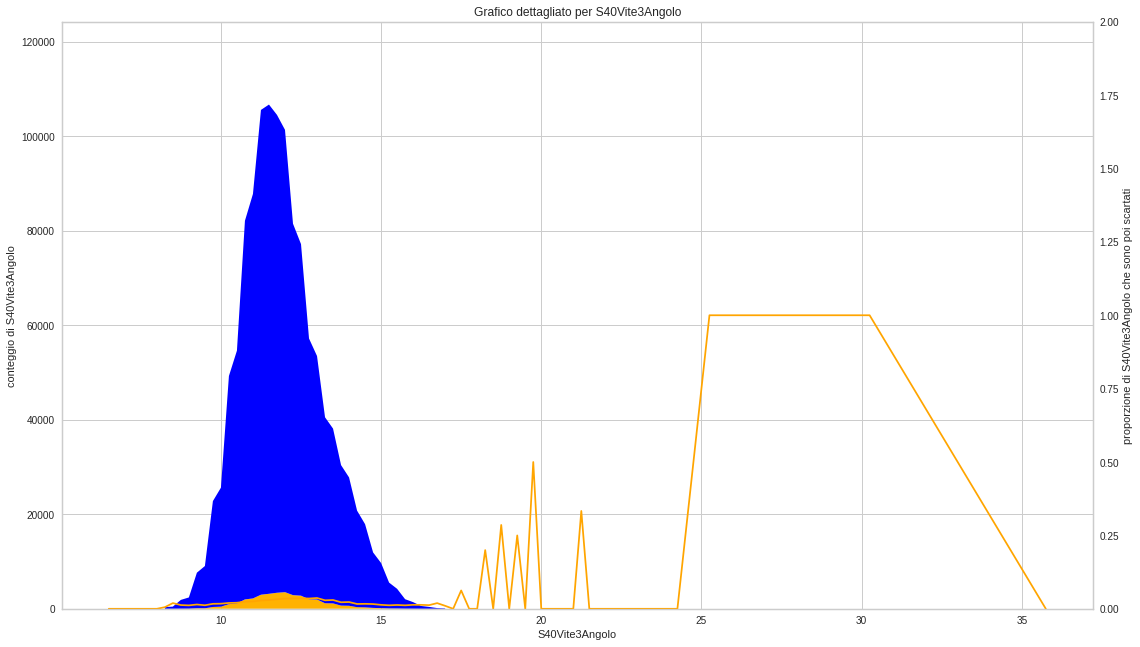

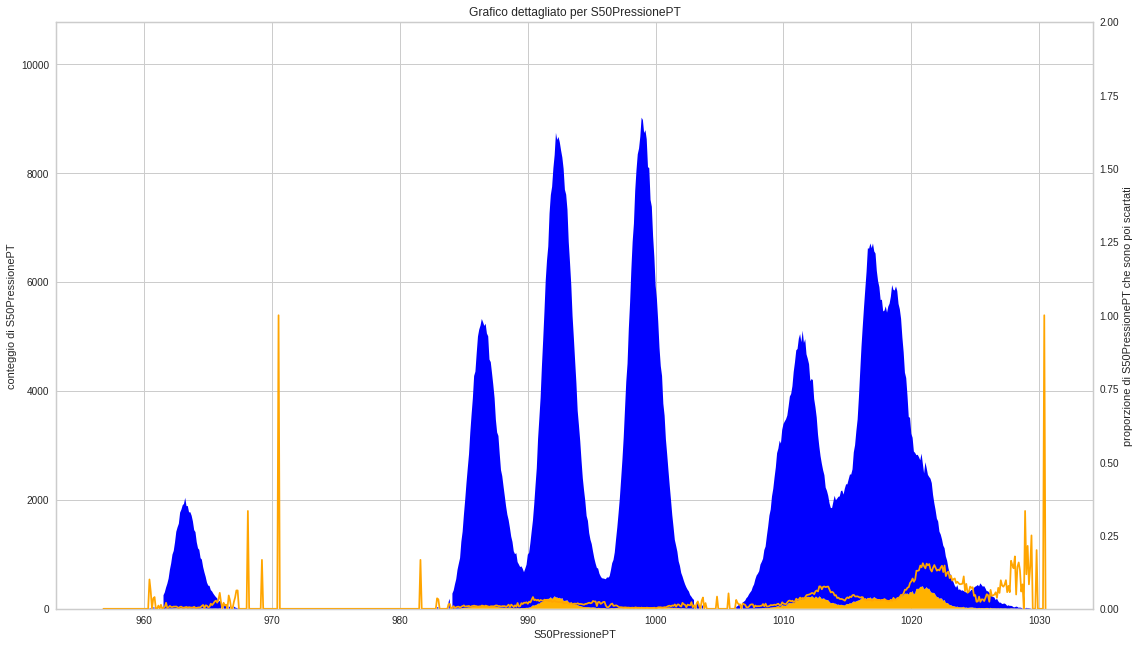

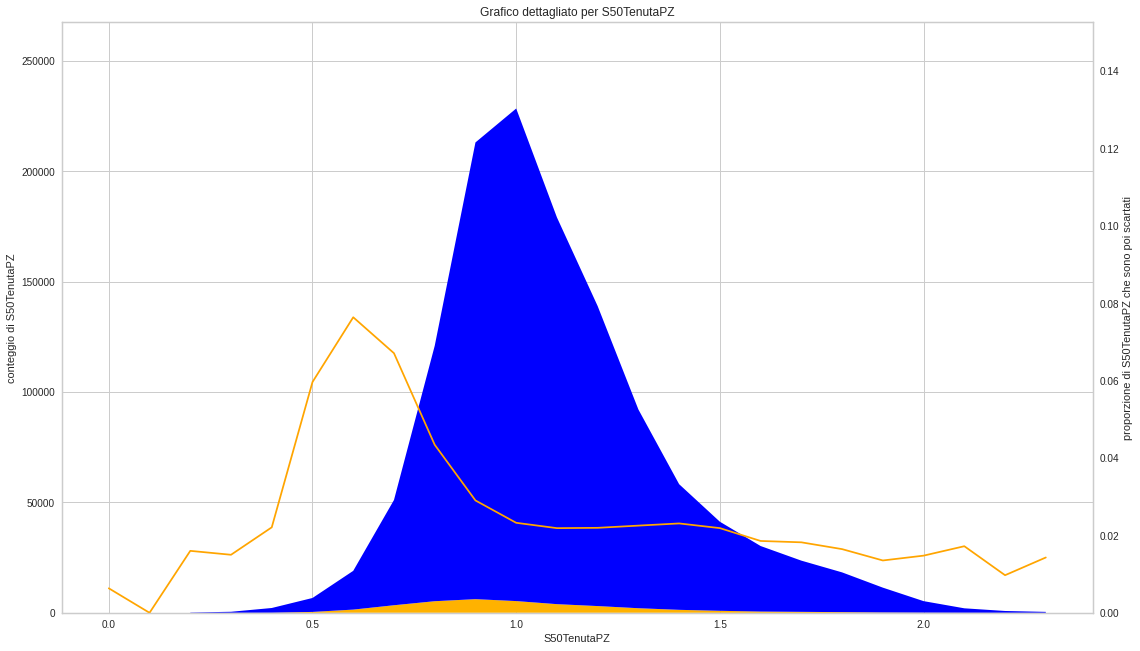

In [ ]:
for i in data_class.columns.values[:-1]:
  plotgraficodett(i)

Dataset senza variabili rischio

In [ ]:
"""file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_senza_rischio_S60.pkl', 'wb')
pickle.dump(data_class, file)
file.close()"""

"file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_senza_rischio_S60.pkl', 'wb')\npickle.dump(data_class, file)\nfile.close()"

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_senza_rischio_S60.pkl', 'rb')
data_class = pickle.load(file)
file.close()

Creazione di features binarie che indicano l'appertenenza dei valori della misura ad un range in cui la proporzione di scarti sul totale è elevata

In [ ]:
data_class["S10CoppiaRIS"] = data_class["S10Coppia"].apply(lambda x: 1 if(((x>4.23) & (x<4.3)) | (x>4.45)) else 0)
data_class["S10AngoloRIS"] = data_class["S10Angolo"].apply(lambda x: 1 if ((x>0) & (x<6) | (x>35)) else 0)
data_class["S20CoppiaRIS"] = data_class["S20Coppia"].apply(lambda x: 1 if ((x<7.2) | (x>7.85)) else 0)
data_class["S20AngoloRIS"] = data_class["S20Angolo"].apply(lambda x: 1 if (((x>0) & (x<6)) | (x>10)) else 0)
data_class["S20PortataRIS"] = data_class["S20Portata"].apply(lambda x: 1 if ((x<13.6)|(x>15.3)) else 0)
data_class["S40F2MomentoTorcMaxRIS"] = data_class["S40F2MomentoTorcMax"].apply(lambda x: 1 if (x>0.15) else 0)
data_class["S40Vite1CoppiaRIS"] = data_class["S40Vite1Coppia"].apply(lambda x: 1 if (x<8.13) else 0)
data_class["S40Vite1AngoloRIS"] = data_class["S40Vite1Angolo"].apply(lambda x: 1 if ((x<6) | (x>17)) else 0)
data_class["S40Vite2CoppiaRIS"] = data_class["S40Vite2Coppia"].apply(lambda x: 1 if ((x<8.13) | (x>8.5)) else 0)
data_class["S40Vite2AngoloRIS"] = data_class["S40Vite2Angolo"].apply(lambda x: 1 if ((x<6) | (x>17)) else 0)
data_class["S40Vite3CoppiaRIS"] = data_class["S40Vite3Coppia"].apply(lambda x: 1 if ((x<8.13) | (x>8.5)) else 0)
data_class["S40Vite3AngoloRIS"] = data_class["S40Vite3Angolo"].apply(lambda x: 1 if (x>17) else 0)
data_class["S50PressionePTRIS"] = data_class["S50PressionePT"].apply(lambda x: 1 if ((x<962) | ((x>965) & (x<985)) | (x>1020)) else 0)
data_class["S50TenutaPZRIS"] = data_class["S50TenutaPZ"].apply(lambda x: 1 if (x<0.5) else 0)

In [ ]:
"""file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_con_rischio_S60.pkl', 'wb')
pickle.dump(data_class, file)
file.close()"""

"file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_con_rischio_S60.pkl', 'wb')\npickle.dump(data_class, file)\nfile.close()"

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_con_rischio_S60.pkl', 'rb')
data_class = pickle.load(file)
file.close()

###Standardizzazione

Senza rischio

In [ ]:
"""for i in data_class.columns.values[:-1]:
  media = data_class[str(i)].mean()
  std = data_class[str(i)].std()
  data_class[str(i)] = (data_class[str(i)] - media)/std
data_class"""

'for i in data_class.columns.values[:-1]:\n  media = data_class[str(i)].mean()\n  std = data_class[str(i)].std()\n  data_class[str(i)] = (data_class[str(i)] - media)/std\ndata_class'

Con rischio

In [ ]:
for i in data_class.columns.values[:-15]:
  media = data_class[str(i)].mean()
  std = data_class[str(i)].std()
  data_class[str(i)] = (data_class[str(i)] - media)/std
data_class

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,pass60,S10CoppiaRIS,S10AngoloRIS,S20CoppiaRIS,S20AngoloRIS,S20PortataRIS,S40F2MomentoTorcMaxRIS,S40Vite1CoppiaRIS,S40Vite1AngoloRIS,S40Vite2CoppiaRIS,S40Vite2AngoloRIS,S40Vite3CoppiaRIS,S40Vite3AngoloRIS,S50PressionePTRIS,S50TenutaPZRIS
0,-2.222418,3.290976,0.572015,0.378228,0.584694,0.687660,-0.045689,1.412304,0.175447,1.518763,0.012535,0.850857,-0.359381,0.395910,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-2.540027,3.814415,-0.596331,0.054691,0.746955,1.996206,0.650392,1.605143,-0.397243,1.145593,0.402463,1.637004,-0.352209,1.115915,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,-2.010680,1.346774,-0.085181,0.054691,1.201917,1.771299,-3.004035,2.376499,-1.924429,0.026085,-1.742102,0.064710,-0.201539,4.355939,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,-2.328289,2.019767,0.791081,0.378228,1.093742,0.810336,-1.437850,1.605143,-0.015456,0.212670,-2.326974,0.850857,-0.223066,0.395910,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.904813,1.496328,0.060862,0.378228,1.023750,1.137473,0.650392,1.412304,-1.733544,0.772424,-0.767301,-0.524900,-0.309158,0.755913,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244065,-3.175241,2.692760,-2.786982,-0.915921,-0.624298,-0.273303,-4.048148,4.690568,-4.597013,5.250456,-3.691684,5.567738,-2.382622,-2.484111,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1
1244066,-3.281108,3.515307,-3.225111,2.642989,-1.371962,-0.600439,-2.655987,4.497729,-4.215207,4.504117,-3.886647,4.978128,-0.768335,-1.764106,1,0,0,1,0,0,0,0,1,1,1,1,1,0,0
1244067,-3.281108,2.842314,-3.006045,-0.592384,-1.149255,0.483200,-3.004035,3.340694,-4.406110,4.317532,-4.471520,3.602371,-0.825731,-0.324095,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0
1244068,-3.281108,3.066645,-2.786982,-1.562996,-1.365600,-0.600439,-3.178043,3.919212,-3.642517,4.317532,-4.276556,4.781591,-0.768335,-2.124108,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import keras
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras import backend as K
from sklearn.model_selection import KFold
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
!pip install -U imbalanced-learn
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import lime
import lime.lime_tabular
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.6.2)


##Classificatori

Si definisce una semplice funzione di costo (personalizzata per ogni classificatore per essere integrata nel processo di AutoML) che permette di determinare i costi derivanti dall'utilizzo di un classificatore, per rendere più realistico il processo di valutazione delle performance del classificatore.

In [ ]:
def costoclass(tn, fp, fn, tp):
      return tp*2 + fp*-20 + fn*-1 + tn*2

Shuffling delle osservazioni per togliere la dipendenza temporale

In [ ]:
data_class = data_class.sample(frac=1)

In [ ]:
target = data_class["pass60"]
data_class.drop(columns=["pass60"], inplace = True)

In [ ]:
data_class, data_test, target, target_test = train_test_split(data_class, target, test_size = 0.2, random_state = 2020, stratify = target)

In [ ]:
data_class = pd.concat([data_class, target], axis = 1)

In [ ]:
target = data_class["pass60"]
data_class.drop(columns=["pass60"], inplace = True)

In [ ]:
target.value_counts()

1    967058
0     27938
Name: pass60, dtype: int64

Non si procede a svolgere l'utilizzo di classificatori con dataset sbilanciato in quanto, come osservato dall'approccio implementato per la stazione S50, si ricade troppo spesso nel caso di Zero Rule in cui il classificatore non svolge adeguatamente il proprio compito.
<br>Si procede ad implementare classificatori con l'utilizzo di un dataset bilanciato tramite Undersampling

###Con Undersampling

In [ ]:
rus = RandomUnderSampler(sampling_strategy = "majority")
data_class_res, target_res = rus.fit_resample(data_class, target)

In [ ]:
target_res.value_counts()

1    27938
0    27938
Name: pass60, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_class_res, target_res, test_size = 0.2, shuffle=True, random_state = 2020, stratify = target_res)

####Random Forest

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
data_shape = np.size(x_train, axis = 1)
data_shape

28

In [ ]:
global measures
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   patience = 8,
                   restore_best_weights = True)


def create_model_rfc(n_estimators, max_depth):
  # create model
  rfc = RandomForestClassifier(n_estimators=int(n_estimators),
                               max_depth=int(max_depth))
  return rfc

def compute_costoclass_rfc(n_estimators, max_depth):
  global measures
  rfc = create_model_rfc(n_estimators, max_depth)
  kfold = KFold(n_splits=5, random_state=42, shuffle=True)
  cvscores_nn = []
  cvres_nn = {"tn": 0,
              "fp": 0,
              "fn": 0,
              "tp": 0}

  i = 1
  for train, test in kfold.split(data_class_res, target_res): 

    # fit model
    rfc.fit(data_class_res.iloc[train], target_res.iloc[train])
    # predict
    pred = rfc.predict(data_class_res.iloc[test])
    tn, fp, fn, tp = confusion_matrix(target_res.iloc[test], pred).ravel()
    
    accuracy = accuracy_score(target_res.iloc[test], pred)
    print('Iterazione numero: ' + str(i))
    print('Accuracy attuale del modello di classificazione: ' + str(accuracy))
    #print('TN: ' + str(tn))
    #print('FP: ' + str(fp))
    #print('FN: ' + str(fn))
    #print('TP: ' + str(tp))
    cvscores_nn.append(accuracy)
    
    cvres_nn["tn"] += tn
    cvres_nn["fp"] += fp
    cvres_nn["fn"] += fn
    cvres_nn["tp"] += tp

    i +=1

  print("Il punteggio medio ottenuto dalla cross-validation è " + str(np.mean(cvscores_nn)) + " con una deviazione di " + str(np.std(cvscores_nn)))
  cvres_nn["tn"] = cvres_nn["tn"]/5
  cvres_nn["fp"] = cvres_nn["fp"]/5
  cvres_nn["fn"] = cvres_nn["fn"]/5
  cvres_nn["tp"] = cvres_nn["tp"]/5

  measures = pd.concat([measures, pd.DataFrame([cvres_nn])], axis = 0).reset_index(drop =True)
  print(measures)
  return np.mean(cvscores_nn)

In [ ]:
# definizione degli iperparametri da ottimizzare
# definizione iperparametri 
N_estimators = [50,500]
max_depth = [3,30]

param = {'n_estimators': ('int',N_estimators) ,
                'max_depth': ('int', max_depth)}

col_name = list(param.keys())

measures = pd.DataFrame(columns=["tn", "fp", "fn", "tp"])

#AutoML
np.random.seed(2020)

kernel_covariance = squaredExponential()
surmodel = GaussianProcess(kernel_covariance)
acq = Acquisition(mode = "ExpectedImprovement")

SMBO = GPGO(surmodel, acq, compute_costoclass_rfc, param)
SMBO.run(init_evals = 5, max_iter = 20)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
Iterazione numero: 1
Accuracy attuale del modello di classificazione: 0.7670901932712957
Iterazione numero: 2
Accuracy attuale del modello di classificazione: 0.7633109619686801
Iterazione numero: 3
Accuracy attuale del modello di classificazione: 0.7620581655480985
Iterazione numero: 4
Accuracy attuale del modello di classificazione: 0.7614317673378076
Iterazione numero: 5
Accuracy attuale del modello di classificazione: 0.7607158836689039
Il punteggio medio ottenuto dalla cross-validation è 0.7629213943589571 con una deviazione di 0.002252069152581018
       tn      fp     fn      tp
0  3839.6  1748.0  901.4  4686.2
Iterazione numero: 1
Accuracy attuale del modello di classificazione: 0.732193987115247
Iterazione numero: 2
Accuracy attuale del modello di classificazione: 0.7362863534675615
Iterazione numero: 3
Accuracy attuale del modello di classificazione: 0.7290380313199105
Iterazione numero: 4
Accuracy attuale del modello 

In [ ]:
def df_out(parametri,score, col_names, measures = measures):
  df = pd.DataFrame(parametri) 
  df.columns = col_names 
  df['score'] = score
  df = pd.concat([df, measures], axis = 1)
  return df

In [ ]:
risultati = df_out(SMBO.GP.X,SMBO.GP.y, col_name)
risultati

,n_estimators,max_depth,score,tn,fp,fn,tp
0,402.000000,11.000000,0.765051,3862.8,1724.8,900.8,4686.8
1,66.000000,4.000000,0.736595,3588.4,1999.2,944.4,4643.2
2,488.000000,29.000000,0.767772,3897.6,1690.0,905.2,4682.4
3,323.000000,27.000000,0.768040,3904.6,1683.0,909.2,4678.4
4,53.000000,28.000000,0.762814,3930.6,1657.0,993.6,4594.0
5,322.537219,26.074437,0.768452,3899.0,1688.6,899.0,4688.6
6,489.035362,29.000000,0.767933,3896.2,1691.4,902.0,4685.6
7,323.559932,26.140966,0.768452,3902.4,1685.2,902.4,4685.2
8,488.517884,28.114528,0.768523,3903.0,1684.6,902.2,4685.4
9,403.039083,11.000000,0.763709,3857.2,1730.4,910.2,4677.4


Miglior modello per la classificazione

In [ ]:
best_model = pd.read_csv('/gdrive/My Drive/Progetto Industry Lab/risultati/ris_RF_autoML.csv', index_col = 0)

In [ ]:
best_model = best_model[(best_model.fp > 0) & (best_model.tp > 0)]

Migliore secondo funzione personalizzata di Guadagno

In [ ]:
best_model["guadagno"] = best_model.apply(lambda x: costoclass(x.tn,	x.fp,	x.fn,	x.tp), axis = 1)
best_model["precision"] = best_model.apply(lambda x: x.tp / (x.tp + x.fp), axis = 1)
best_model = best_model.sort_values(by = 'guadagno', ascending = False).reset_index(drop = True)
best_model.head()

,n_estimators,max_depth,score,tn,fp,fn,tp,guadagno,precision
0,52.480115,27.106762,0.759396,3929.0,1658.6,1030.2,4557.4,-17229.4,0.733172
1,53.000000,28.000000,0.761203,3921.4,1666.2,1002.4,4585.2,-17313.2,0.733468
2,51.957173,28.000000,0.759986,3917.8,1669.8,1012.4,4575.2,-17422.4,0.732618
3,51.156362,26.939525,0.759288,3908.4,1679.2,1010.8,4576.8,-17624.4,0.731586
4,322.536387,26.072774,0.765946,3883.8,1703.8,911.8,4675.8,-17868.6,0.732930


In [ ]:
data_class_res = pd.concat([data_class_res,target_res], axis = 1)
data_class_res = data_class_res.sample(frac=1)
target_res = data_class_res.pass60
data_class_res.drop(columns="pass60", inplace = True)

In [ ]:
x_train = np.array(data_class_res)
x_test = np.array(data_test)
y_train = np.array(target_res)
y_test = np.array(target_test)
data_shape = np.size(x_train, axis = 1)
data_shape

28

In [ ]:
rf = RandomForestClassifier(n_estimators=int(best_model.n_estimators[0]),max_depth=int(best_model.max_depth[0]))

In [ ]:
rf.fit(data_class_res, target_res)
pred = rf.predict(data_test)
tn, fp, fn, tp = confusion_matrix(target_test, pred).ravel()

accuracy = accuracy_score(target_test, pred)
guadagno = costoclass(tn, fp, fn, tp)

print("Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere " +str(guadagno))
print("L'Accuracy che il modello raggiunge in fase di Test è pari a " +str(accuracy))
print("Si verificano un numero di True Negative pari a " + str(tn))
print("Si verificano un numero di False Positive pari a " + str(fp))
print("Si verificano un numero di False Negative pari a " + str(fn))
print("Si verificano un numero di True Positive pari a " + str(tn))

Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere 323741
L'Accuracy che il modello raggiunge in fase di Test è pari a 0.8221540589107896
Si verificano un numero di True Negative pari a 4825
Si verificano un numero di False Positive pari a 2160
Si verificano un numero di False Negative pari a 42079
Si verificano un numero di True Positive pari a 4825


Migliore secondo Precision

In [ ]:
best_model = best_model.sort_values(by = 'precision', ascending = False).reset_index(drop = True)
best_model.head()

,n_estimators,max_depth,score,tn,fp,fn,tp,guadagno,precision
0,53.000000,28.000000,0.761203,3921.4,1666.2,1002.4,4585.2,-17313.2,0.733468
1,52.480115,27.106762,0.759396,3929.0,1658.6,1030.2,4557.4,-17229.4,0.733172
2,322.536387,26.072774,0.765946,3883.8,1703.8,911.8,4675.8,-17868.6,0.732930
3,488.000000,29.000000,0.765928,3882.0,1705.6,910.2,4677.4,-17903.4,0.732790
4,51.957173,28.000000,0.759986,3917.8,1669.8,1012.4,4575.2,-17422.4,0.732618


In [ ]:
data_class_res = pd.concat([data_class_res,target_res], axis = 1)
data_class_res = data_class_res.sample(frac=1)
target_res = data_class_res.pass60
data_class_res.drop(columns="pass60", inplace = True)

In [ ]:
x_train = np.array(data_class_res)
x_test = np.array(data_test)
y_train = np.array(target_res)
y_test = np.array(target_test)
data_shape = np.size(x_train, axis = 1)
data_shape

28

In [ ]:
rf = RandomForestClassifier(n_estimators=int(best_model.n_estimators[0]),max_depth=int(best_model.max_depth[0]))

In [ ]:
rf.fit(data_class_res, target_res)
pred = rf.predict(data_test)
tn, fp, fn, tp = confusion_matrix(target_test, pred).ravel()

accuracy = accuracy_score(target_test, pred)
guadagno = costoclass(tn, fp, fn, tp)

print("Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere " +str(guadagno))
print("L'Accuracy che il modello raggiunge in fase di Test è pari a " +str(accuracy))
print("Si verificano un numero di True Negative pari a " + str(tn))
print("Si verificano un numero di False Positive pari a " + str(fp))
print("Si verificano un numero di False Negative pari a " + str(fn))
print("Si verificano un numero di True Positive pari a " + str(tn))

Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere 324249
L'Accuracy che il modello raggiunge in fase di Test è pari a 0.8229621023602105
Si verificano un numero di True Negative pari a 4820
Si verificano un numero di False Positive pari a 2165
Si verificano un numero di False Negative pari a 41873
Si verificano un numero di True Positive pari a 4820


####XGBoost

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
data_shape = np.size(x_train, axis = 1)
data_shape

28

In [ ]:
global measures
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   patience = 8,
                   restore_best_weights = True)


def create_model_xgb(lr, gamma, max_depth, n_estimators, reg_alpha, n_max_delta):
  # create model
  xgb = XGBClassifier(max_depth = int(max_depth),
                    learning_rate = lr,
                    n_estimators = int(n_estimators),
                    gamma = gamma,
                    subsample = 0.6,
                    reg_alpha = reg_alpha,
                    n_max_delta = n_max_delta)
  return xgb

def compute_costoclass_xgb(lr, gamma, max_depth, n_estimators, reg_alpha, n_max_delta):
  global measures
  xgbmodel = create_model_xgb(lr, gamma, max_depth, n_estimators, reg_alpha, n_max_delta)

  kfold = KFold(n_splits=5, random_state=42, shuffle=True)
  cvscores_nn = []
  cvres_nn = {"tn": 0,
              "fp": 0,
              "fn": 0,
              "tp": 0}

  i = 1
  for train, test in kfold.split(data_class_res, target_res): 

    # Fit
    xgbmodel.fit(data_class_res.iloc[train], target_res.iloc[train])
    
    # Valutazione
    pred = xgbmodel.predict(data_class_res.iloc[test])
    tn, fp, fn, tp = confusion_matrix(target_res.iloc[test], pred).ravel()
    
    accuracy = accuracy_score(target_res.iloc[test], pred)
    print('Iterazione numero: ' + str(i))
    print('Accuracy attuale del modello di classificazione: ' + str(accuracy))
    #print('TN: ' + str(tn))
    #print('FP: ' + str(fp))
    #print('FN: ' + str(fn))
    #print('TP: ' + str(tp))
    cvscores_nn.append(accuracy)
    
    cvres_nn["tn"] += tn
    cvres_nn["fp"] += fp
    cvres_nn["fn"] += fn
    cvres_nn["tp"] += tp

    i +=1

  print("Il punteggio medio ottenuto dalla cross-validation è " + str(np.mean(cvscores_nn)) + " con una deviazione di " + str(np.std(cvscores_nn)))
  cvres_nn["tn"] = cvres_nn["tn"]/5
  cvres_nn["fp"] = cvres_nn["fp"]/5
  cvres_nn["fn"] = cvres_nn["fn"]/5
  cvres_nn["tp"] = cvres_nn["tp"]/5

  measures = pd.concat([measures, pd.DataFrame([cvres_nn])], axis = 0).reset_index(drop =True)
  print(measures)
  return np.mean(cvscores_nn)

In [ ]:
# definizione degli iperparametri da ottimizzare
lr = [0,1]
gamma = [0,2]
max_depth = [3, 10]
n_estimators = [2, 10]
reg_alpha = [0, 1]
n_max_delta = [1, 10]

param ={'lr': ('cont',lr),
           'gamma': ('cont', gamma),
           'max_depth':('int', max_depth),
           'n_estimators':('int', n_estimators),
           'reg_alpha': ('cont', reg_alpha),
           'n_max_delta': ('cont', n_max_delta)}

col_name = list(param.keys())

measures = pd.DataFrame(columns=["tn", "fp", "fn", "tp"])

#AutoML
np.random.seed(2020)

kernel_covariance = squaredExponential()
surmodel = GaussianProcess(kernel_covariance)
acq = Acquisition(mode = "ExpectedImprovement")

SMBO = GPGO(surmodel, acq, compute_costoclass_xgb, param)
SMBO.run(init_evals = 5, max_iter = 20)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
Iterazione numero: 1
Accuracy attuale del modello di classificazione: 0.7440050107372942
Iterazione numero: 2
Accuracy attuale del modello di classificazione: 0.748724832214765
Iterazione numero: 3
Accuracy attuale del modello di classificazione: 0.7445190156599553
Iterazione numero: 4
Accuracy attuale del modello di classificazione: 0.7495302013422819
Iterazione numero: 5
Accuracy attuale del modello di classificazione: 0.7423713646532438
Il punteggio medio ottenuto dalla cross-validation è 0.745830084921508 con una deviazione di 0.0027958171506617885
       tn      fp      fn      tp
0  3858.2  1729.4  1111.0  4476.6
Iterazione numero: 1
Accuracy attuale del modello di classificazione: 0.7541159627773801
Iterazione numero: 2
Accuracy attuale del modello di classificazione: 0.7496196868008949
Iterazione numero: 3
Accuracy attuale del modello di classificazione: 0.7545413870246085
Iterazione numero: 4
Accuracy attuale del modell

In [ ]:
def df_out(parametri,score, col_names, measures = measures):
  df = pd.DataFrame(parametri) 
  df.columns = col_names 
  df['score'] = score
  df = pd.concat([df, measures], axis = 1)
  return df

In [ ]:
risultati = df_out(SMBO.GP.X,SMBO.GP.y, col_name)
risultati

,lr,gamma,max_depth,n_estimators,reg_alpha,n_max_delta,score,tn,fp,fn,tp
0,0.986277,1.746784,6.000000,5.000000,0.271836,4.032269,0.752756,3892.8,1694.8,1068.2,4519.4
1,0.216954,0.552954,5.000000,3.000000,0.862159,2.410297,0.753418,3822.6,1765.0,990.6,4597.0
2,0.140887,1.514161,3.000000,6.000000,0.355663,4.069837,0.732139,3509.2,2078.4,915.0,4672.6
3,0.666803,0.434201,5.000000,3.000000,0.124179,3.877628,0.754868,3817.2,1770.4,969.0,4618.6
4,0.953214,0.274714,8.000000,6.000000,0.975665,5.530304,0.741231,3922.6,1665.0,1226.8,4360.8
5,0.588179,0.958566,5.341639,3.734383,0.487733,3.320121,0.755405,3810.8,1776.8,956.6,4631.0
6,0.309884,0.496292,4.488024,3.250524,0.496047,3.187670,0.749427,3799.2,1788.4,1011.8,4575.8
7,0.416413,0.886367,5.205377,2.642368,0.452866,3.163507,0.752702,3813.4,1774.2,989.4,4598.2
8,0.618634,0.036254,5.332189,3.132413,0.535194,3.075016,0.754707,3824.4,1763.2,978.0,4609.6
9,1.000000,0.661407,4.906334,3.145059,0.064051,2.792595,0.749231,3843.4,1744.2,1058.2,4529.4


In [ ]:
risultati.to_csv('/gdrive/My Drive/Progetto Industry Lab/risultati/result_XGBOOST.csv')

Miglior modello per la classificazione

In [ ]:
best_model = pd.read_csv('/gdrive/My Drive/Progetto Industry Lab/risultati/result_XGBOOST.csv', index_col = 0)

In [ ]:
best_model = best_model[(best_model.fp > 0) & (best_model.tp > 0)]

Migliore secondo funzione personalizzata di Guadagno

In [ ]:
best_model["guadagno"] = best_model.apply(lambda x: costoclass(x.tn,	x.fp,	x.fn,	x.tp), axis = 1)
best_model["precision"] = best_model.apply(lambda x: x.tp / (x.tp + x.fp), axis = 1)
best_model = best_model.sort_values(by = 'guadagno', ascending = False).reset_index(drop = True)
best_model.head()

,lr,gamma,max_depth,n_estimators,reg_alpha,n_max_delta,score,tn,fp,fn,tp,guadagno,precision
0,0.953214,0.274714,8.000000,6.000000,0.975665,5.530304,0.738653,3924.6,1663.0,1257.6,4330.0,-18008.4,0.722510
1,0.963493,0.956183,7.041068,5.504288,0.644303,4.813581,0.746134,3895.0,1692.6,1144.4,4443.2,-18320.0,0.724144
2,0.693302,1.029337,7.753199,5.321064,1.000000,5.770542,0.751521,3884.6,1703.0,1073.8,4513.8,-18337.0,0.726065
3,0.793550,1.613363,6.415242,4.731470,1.000000,4.597821,0.754546,3862.8,1724.8,1018.2,4569.4,-18649.8,0.725970
4,0.364910,0.592070,7.855543,5.599357,0.236412,5.442473,0.757928,3852.2,1735.4,969.8,4617.8,-18737.8,0.726846


In [ ]:
data_class_res = pd.concat([data_class_res,target_res], axis = 1)
data_class_res = data_class_res.sample(frac=1)
target_res = data_class_res.pass60
data_class_res.drop(columns="pass60", inplace = True)

In [ ]:
x_train = np.array(data_class_res)
x_test = np.array(data_test)
y_train = np.array(target_res)
y_test = np.array(target_test)
data_shape = np.size(x_train, axis = 1)
data_shape

28

In [ ]:
xgb_model = XGBClassifier(max_depth = int(best_model.max_depth[0]), learning_rate = best_model.lr[0],
                         n_estimators = int(best_model.n_estimators[0]), gamma = best_model.gamma[0],
                         subsample = 0.6, reg_alpha = best_model.reg_alpha[0], n_max_delta = best_model.n_max_delta[0])

In [ ]:
xgb_model.fit(data_class_res, target_res)
pred = xgb_model.predict(data_test)
tn, fp, fn, tp = confusion_matrix(target_test, pred).ravel()

accuracy = accuracy_score(target_test, pred)
guadagno = costoclass(tn, fp, fn, tp)

print("Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere " +str(guadagno))
print("L'Accuracy che il modello raggiunge in fase di Test è pari a " +str(accuracy))
print("Si verificano un numero di True Negative pari a " + str(tn))
print("Si verificano un numero di False Positive pari a " + str(fp))
print("Si verificano un numero di False Negative pari a " + str(fn))
print("Si verificano un numero di True Positive pari a " + str(tn))

Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere 300107
L'Accuracy che il modello raggiunge in fase di Test è pari a 0.7894142288009198
Si verificano un numero di True Negative pari a 4867
Si verificano un numero di False Positive pari a 2118
Si verificano un numero di False Negative pari a 50265
Si verificano un numero di True Positive pari a 4867


Migliore secondo Precision

In [ ]:
best_model = best_model.sort_values(by = 'precision', ascending = False).reset_index(drop = True)
best_model.head()

,lr,gamma,max_depth,n_estimators,reg_alpha,n_max_delta,score,tn,fp,fn,tp,guadagno,precision
0,0.364910,0.592070,7.855543,5.599357,0.236412,5.442473,0.757928,3852.2,1735.4,969.8,4617.8,-18737.8,0.726846
1,0.380889,0.426905,7.567104,5.080204,1.000000,5.005336,0.757624,3849.4,1738.2,970.4,4617.2,-18801.2,0.726500
2,0.693302,1.029337,7.753199,5.321064,1.000000,5.770542,0.751521,3884.6,1703.0,1073.8,4513.8,-18337.0,0.726065
3,0.793550,1.613363,6.415242,4.731470,1.000000,4.597821,0.754546,3862.8,1724.8,1018.2,4569.4,-18649.8,0.725970
4,0.334797,1.036094,7.999802,5.833889,1.000000,4.990547,0.756908,3845.2,1742.4,974.2,4613.4,-18905.0,0.725857


In [ ]:
data_class_res = pd.concat([data_class_res,target_res], axis = 1)
data_class_res = data_class_res.sample(frac=1)
target_res = data_class_res.pass60
data_class_res.drop(columns="pass60", inplace = True)

In [ ]:
x_train = np.array(data_class_res)
x_test = np.array(data_test)
y_train = np.array(target_res)
y_test = np.array(target_test)
data_shape = np.size(x_train, axis = 1)
data_shape

28

In [ ]:
xgb_model = XGBClassifier(max_depth = int(best_model.max_depth[0]), learning_rate = best_model.lr[0],
                         n_estimators = int(best_model.n_estimators[0]), gamma = best_model.gamma[0],
                         subsample = 0.6, reg_alpha = best_model.reg_alpha[0], n_max_delta = best_model.n_max_delta[0])

In [ ]:
xgb_model.fit(data_class_res, target_res)
pred = xgb_model.predict(data_test)
tn, fp, fn, tp = confusion_matrix(target_test, pred).ravel()

accuracy = accuracy_score(target_test, pred)
guadagno = costoclass(tn, fp, fn, tp)

print("Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere " +str(guadagno))
print("L'Accuracy che il modello raggiunge in fase di Test è pari a " +str(accuracy))
print("Si verificano un numero di True Negative pari a " + str(tn))
print("Si verificano un numero di False Positive pari a " + str(fp))
print("Si verificano un numero di False Negative pari a " + str(fn))
print("Si verificano un numero di True Positive pari a " + str(tn))

Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere 327524
L'Accuracy che il modello raggiunge in fase di Test è pari a 0.829514892522181
Si verificano un numero di True Negative pari a 4735
Si verificano un numero di False Positive pari a 2250
Si verificano un numero di False Negative pari a 40158
Si verificano un numero di True Positive pari a 4735


####KNN

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
data_shape = np.size(x_train, axis = 1)
data_shape

28

In [ ]:
global measures
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   patience = 8,
                   restore_best_weights = True)


def create_model_knn(neighbors):
  knnmodel = KNeighborsClassifier(n_neighbors=int(neighbors))
  return knnmodel

def compute_costoclass_knn(neighbors):
  global measures
  knn = create_model_knn(neighbors)

  kfold = KFold(n_splits=5, random_state=42, shuffle=True)
  cvscores_nn = []
  cvres_nn = {"tn": 0,
              "fp": 0,
              "fn": 0,
              "tp": 0}

  i = 1
  for train, test in kfold.split(data_class_res, target_res): 

    # Fit
    knn.fit(data_class_res.iloc[test], target_res.iloc[test])
    
    # Valutazione
    pred = knn.predict(data_class_res.iloc[test])
    tn, fp, fn, tp = confusion_matrix(target_res.iloc[test], pred).ravel()
    
    accuracy = accuracy_score(target_res.iloc[test], pred)
    print('Iterazione numero: ' + str(i))
    print('Accuracy attuale del modello di classificazione: ' + str(accuracy))
    #print('TN: ' + str(tn))
    #print('FP: ' + str(fp))
    #print('FN: ' + str(fn))
    #print('TP: ' + str(tp))
    cvscores_nn.append(accuracy)
    
    cvres_nn["tn"] += tn
    cvres_nn["fp"] += fp
    cvres_nn["fn"] += fn
    cvres_nn["tp"] += tp

    i +=1

  print("Il punteggio medio ottenuto dalla cross-validation è " + str(np.mean(cvscores_nn)) + " con una deviazione di " + str(np.std(cvscores_nn)))
  cvres_nn["tn"] = cvres_nn["tn"]/5
  cvres_nn["fp"] = cvres_nn["fp"]/5
  cvres_nn["fn"] = cvres_nn["fn"]/5
  cvres_nn["tp"] = cvres_nn["tp"]/5

  measures = pd.concat([measures, pd.DataFrame([cvres_nn])], axis = 0).reset_index(drop =True)
  print(measures)
  return np.mean(cvscores_nn)

In [ ]:
#definizione degli iperparametri
# numero di neuroni
neighbors = [2, 200]

param = {
        # numero di neighbors
        'neighbors': ('int', neighbors)}

col_name = list(param.keys())

measures = pd.DataFrame(columns=["tn", "fp", "fn", "tp"])

#AutoML
np.random.seed(2020)

kernel_covariance = squaredExponential()
surmodel = GaussianProcess(kernel_covariance)
acq = Acquisition(mode = "ExpectedImprovement")

SMBO = GPGO(surmodel, acq, compute_costoclass_knn, param)
SMBO.run(init_evals = 5, max_iter = 20)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
Iterazione numero: 1
Accuracy attuale del modello di classificazione: 0.7547423049391553
Iterazione numero: 2
Accuracy attuale del modello di classificazione: 0.7508724832214765
Iterazione numero: 3
Accuracy attuale del modello di classificazione: 0.7500671140939598
Iterazione numero: 4
Accuracy attuale del modello di classificazione: 0.7470246085011185
Iterazione numero: 5
Accuracy attuale del modello di classificazione: 0.7499776286353468
Il punteggio medio ottenuto dalla cross-validation è 0.7505368278782114 con una deviazione di 0.00247659934606915
       tn      fp      fn      tp
0  3820.2  1767.4  1020.4  4567.2
Iterazione numero: 1
Accuracy attuale del modello di classificazione: 0.7523264137437365
Iterazione numero: 2
Accuracy attuale del modello di classificazione: 0.7485458612975392
Iterazione numero: 3
Accuracy attuale del modello di classificazione: 0.748993288590604
Iterazione numero: 4
Accuracy attuale del modello

In [ ]:
def df_out(parametri,score, col_names, measures = measures):
  df = pd.DataFrame(parametri) 
  df.columns = col_names 
  df['score'] = score
  df = pd.concat([df, measures], axis = 1)
  return df

In [ ]:
risultati = df_out(SMBO.GP.X,SMBO.GP.y, col_name)
risultati

,neighbors,score,tn,fp,fn,tp
0,98.000000,0.760115,4844.8,2139.8,1211.2,5773.4
1,99.040516,0.760115,4824.6,2160.0,1191.0,5793.6


In [ ]:
risultati.to_csv('/gdrive/My Drive/Progetto Industry Lab/risultati/result_knn.csv')

Miglior modello per la classificazione

In [ ]:
best_model = pd.read_csv('/gdrive/My Drive/Progetto Industry Lab/risultati/result_knn.csv', index_col = 0)

In [ ]:
best_model = best_model[(best_model.fp > 0) & (best_model.tp > 0)]

In [ ]:
best_model["guadagno"] = best_model.apply(lambda x: costoclass(x.tn,	x.fp,	x.fn,	x.tp), axis = 1)
best_model["precision"] = best_model.apply(lambda x: x.tp / (x.tp + x.fp), axis = 1)
best_model = best_model.sort_values(by = 'guadagno', ascending = False).reset_index(drop = True)
best_model.head()

,neighbors,score,tn,fp,fn,tp,guadagno,precision
0,52.378215,0.753991,3885.0,1702.6,1046.6,4541.0,-18246.6,0.727305
1,58.819904,0.754635,3883.0,1704.6,1037.4,4550.2,-18263.0,0.727473
2,56.244058,0.754170,3880.8,1706.8,1040.4,4547.2,-18320.4,0.727087
3,54.956309,0.753293,3881.4,1706.2,1050.8,4536.8,-18338.4,0.726702
4,60.112991,0.753937,3874.8,1712.8,1037.0,4550.6,-18442.2,0.726538


In [ ]:
data_class_res = pd.concat([data_class_res,target_res], axis = 1)
data_class_res = data_class_res.sample(frac=1)
target_res = data_class_res.pass60
data_class_res.drop(columns="pass60", inplace = True)

In [ ]:
x_train = np.array(data_class_res)
x_test = np.array(data_test)
y_train = np.array(target_res)
y_test = np.array(target_test)
data_shape = np.size(x_train, axis = 1)
data_shape

28

In [ ]:
knn = create_model_knn(best_model.neighbors[0])

In [ ]:
knn.fit(data_class_res, target_res)
pred = knn.predict(data_test)
tn, fp, fn, tp = confusion_matrix(target_test, pred).ravel()

accuracy = accuracy_score(target_test, pred)
guadagno = costoclass(tn, fp, fn, tp)

print("Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere " +str(guadagno))
print("L'Accuracy che il modello raggiunge in fase di Test è pari a " +str(accuracy))
print("Si verificano un numero di True Negative pari a " + str(tn))
print("Si verificano un numero di False Positive pari a " + str(fp))
print("Si verificano un numero di False Negative pari a " + str(fn))
print("Si verificano un numero di True Positive pari a " + str(tn))

Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere 314605
L'Accuracy che il modello raggiunge in fase di Test è pari a 0.811235422051948
Si verificano un numero di True Negative pari a 4773
Si verificano un numero di False Positive pari a 2212
Si verificano un numero di False Negative pari a 44743
Si verificano un numero di True Positive pari a 4773


Miglior classificatore secondo la Precision

In [ ]:
best_model = best_model.sort_values(by = 'precision', ascending = False).reset_index(drop = True)
best_model.head()

,neighbors,score,tn,fp,fn,tp,guadagno,precision
0,58.819904,0.754635,3883.0,1704.6,1037.4,4550.2,-18263.0,0.727473
1,52.378215,0.753991,3885.0,1702.6,1046.6,4541.0,-18246.6,0.727305
2,56.244058,0.754170,3880.8,1706.8,1040.4,4547.2,-18320.4,0.727087
3,54.956309,0.753293,3881.4,1706.2,1050.8,4536.8,-18338.4,0.726702
4,60.112991,0.753937,3874.8,1712.8,1037.0,4550.6,-18442.2,0.726538


In [ ]:
data_class_res = pd.concat([data_class_res,target_res], axis = 1)
data_class_res = data_class_res.sample(frac=1)
target_res = data_class_res.pass60
data_class_res.drop(columns="pass60", inplace = True)

In [ ]:
x_train = np.array(data_class_res)
x_test = np.array(data_test)
y_train = np.array(target_res)
y_test = np.array(target_test)
data_shape = np.size(x_train, axis = 1)
data_shape

28

In [ ]:
knn = create_model_knn(best_model.neighbors[0])

In [ ]:
knn.fit(data_class_res, target_res)
pred = knn.predict(data_test)
tn, fp, fn, tp = confusion_matrix(target_test, pred).ravel()

accuracy = accuracy_score(target_test, pred)
guadagno = costoclass(tn, fp, fn, tp)

print("Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere " +str(guadagno))
print("L'Accuracy che il modello raggiunge in fase di Test è pari a " +str(accuracy))
print("Si verificano un numero di True Negative pari a " + str(tn))
print("Si verificano un numero di False Positive pari a " + str(fp))
print("Si verificano un numero di False Negative pari a " + str(fn))
print("Si verificano un numero di True Positive pari a " + str(tn))

Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere 315808
L'Accuracy che il modello raggiunge in fase di Test è pari a 0.8130766354839617
Si verificano un numero di True Negative pari a 4764
Si verificano un numero di False Positive pari a 2221
Si verificano un numero di False Negative pari a 44276
Si verificano un numero di True Positive pari a 4764


####Neural Network

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
data_shape = np.size(x_train, axis = 1)
data_shape

28

In [ ]:
global measures
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   patience = 8,
                   restore_best_weights = True)


def create_model_nn(num_nodes1,
                    num_nodes2,
                    num_nodes3,
                    dropout_val):

  # creazione modello
  nn = Sequential()
  # strato input
  nn.add(Dense(data_shape,
                  activation= 'relu',
                  input_shape=(data_shape, )))
  
  nn.add(Dropout(rate = dropout_val))

  # primo stato hidden
  nn.add(Dense(int(num_nodes1),
                  activation= 'relu'))
  
  nn.add(Dropout(rate = dropout_val))

  # secondo stato hidden
  nn.add(Dense(int(num_nodes2),
                  activation= 'relu'))
  
  nn.add(Dropout(rate = dropout_val))

  # terzo stato hidden
  nn.add(Dense(int(num_nodes3),
                  activation= 'relu'))
  nn.add(Dropout(rate = dropout_val))
  
  # strato output
  nn.add(Dense(2,activation='softmax'))
  
  nn.summary()

  # compilazione della rete
  adam = keras.optimizers.adam(lr = 0.001)
  nn.compile(optimizer=adam, loss="sparse_categorical_crossentropy", metrics = ["acc"])

  return nn

def compute_costoclass_nn(num_nodes1,
                 num_nodes2,
                 num_nodes3,
                 dropout_val,
                 batch_size):
  global measures
  nn = create_model_nn(num_nodes1,
                 num_nodes2,
                 num_nodes3,
                 dropout_val)

  kfold = KFold(n_splits=5, random_state=42, shuffle=True)
  cvscores_nn = []
  cvres_nn = {"tn": 0,
              "fp": 0,
              "fn": 0,
              "tp": 0}

  i = 1
  for train, test in kfold.split(data_class_res, target_res): 

    # Fit
    nn.fit(x = data_class_res.iloc[train],
                y = target_res.iloc[train], 
                batch_size = int(batch_size),
                epochs = 500,
                validation_split = 0.2,
                verbose = 0,
                callbacks = [es])
    
    # Valutazione
    pred = nn.predict_classes(data_class_res.iloc[test])
    tn, fp, fn, tp = confusion_matrix(target_res.iloc[test], pred).ravel()
    
    accuracy = nn.evaluate(data_class_res.iloc[test], target_res.iloc[test], verbose = 0)[1]
    print('Iterazione numero: ' + str(i))
    print('Accuracy attuale del modello di classificazione: ' + str(accuracy))
    #print('TN: ' + str(tn))
    #print('FP: ' + str(fp))
    #print('FN: ' + str(fn))
    #print('TP: ' + str(tp))
    cvscores_nn.append(accuracy)
    
    cvres_nn["tn"] += tn
    cvres_nn["fp"] += fp
    cvres_nn["fn"] += fn
    cvres_nn["tp"] += tp

    i +=1

  print("Il punteggio medio ottenuto dalla cross-validation è " + str(np.mean(cvscores_nn)) + " con una deviazione di " + str(np.std(cvscores_nn)))
  cvres_nn["tn"] = cvres_nn["tn"]/5
  cvres_nn["fp"] = cvres_nn["fp"]/5
  cvres_nn["fn"] = cvres_nn["fn"]/5
  cvres_nn["tp"] = cvres_nn["tp"]/5

  measures = pd.concat([measures, pd.DataFrame([cvres_nn])], axis = 0).reset_index(drop =True)
  print(measures)
  return np.mean(cvscores_nn)

In [ ]:
#definizione degli iperparametri
# numero di neuroni
num_nodes1 = [4, data_shape]
num_nodes2 = [4, data_shape]
num_nodes3 = [4, data_shape]

# DropOut
dropout_val = [0.05, 0.4]
# BatchSize
batch_size = [16, 256]

param = {
        # numero di neuroni e strati
        'num_nodes1': ('int', num_nodes1),
        'num_nodes2': ('int', num_nodes2),
        'num_nodes3': ('int', num_nodes3),
        # Dropout
        'dropout_val': ('cont', dropout_val),
        # BatchSize
        'batch_size': ('cont', batch_size),
        }

col_name = list(param.keys())

measures = pd.DataFrame(columns=["tn", "fp", "fn", "tp"])

#AutoML
np.random.seed(2020)

kernel_covariance = squaredExponential()
surmodel = GaussianProcess(kernel_covariance)
acq = Acquisition(mode = "ExpectedImprovement")

SMBO = GPGO(surmodel, acq, compute_costoclass_nn, param)
SMBO.run(init_evals = 5, max_iter = 20)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                812       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 116       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 12)                60        
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
______________________________________________________________

In [ ]:
def df_out(parametri,score, col_names, measures = measures):
  df = pd.DataFrame(parametri) 
  df.columns = col_names 
  df['score'] = score
  df = pd.concat([df, measures], axis = 1)
  return df

In [ ]:
risultati = df_out(SMBO.GP.X,SMBO.GP.y, col_name)
risultati

,num_nodes1,num_nodes2,num_nodes3,dropout_val,batch_size,score,tn,fp,fn,tp
0,1.0,9.0,4.0,0.267542,68.764706,0.708015,5733.8,1250.8,2828.0,4156.6
1,23.0,23.0,25.0,0.123005,125.022937,0.753157,5186.6,1798.0,1650.2,5334.4


In [ ]:
risultati.to_csv('/gdrive/My Drive/Progetto Industry Lab/risultati/result_nn.csv')

Miglior modello per la classificazione

In [ ]:
best_model = pd.read_csv('/gdrive/My Drive/Progetto Industry Lab/risultati/result_nn.csv', index_col = 0)

In [ ]:
best_model = best_model[(best_model.fp > 0) & (best_model.tp > 0)]

In [ ]:
best_model["guadagno"] = best_model.apply(lambda x: costoclass(x.tn,	x.fp,	x.fn,	x.tp), axis = 1)
best_model["precision"] = best_model.apply(lambda x: x.tp/(x.tp + x.fp), axis = 1)
best_model = best_model.sort_values(by = 'guadagno', ascending = False).reset_index(drop = True)
best_model.head()

,num_nodes1,num_nodes2,num_nodes3,dropout_val,batch_size,score,tn,fp,fn,tp,guadagno,precision
0,14.000000,12.000000,10.000000,0.092349,30.830914,0.751664,4189.6,1398.0,1377.2,4210.4,-12537.2,0.750731
1,14.073611,6.463195,7.000000,0.079473,24.231514,0.749964,4183.0,1404.6,1389.6,4198.0,-12719.6,0.749295
2,10.000000,20.000000,17.000000,0.064441,36.936934,0.750573,4121.0,1466.6,1320.8,4266.8,-13877.2,0.744201
3,14.273549,12.820530,10.547097,0.050000,30.599211,0.752416,4099.8,1487.8,1279.0,4308.6,-14218.2,0.743323
4,25.000000,7.000000,7.000000,0.180177,164.321060,0.752327,4097.4,1490.2,1277.6,4310.0,-14266.8,0.743078


In [ ]:
data_class_res = pd.concat([data_class_res,target_res], axis = 1)
data_class_res = data_class_res.sample(frac=1)
target_res = data_class_res.pass60
data_class_res.drop(columns="pass60", inplace = True)

In [ ]:
x_train = np.array(data_class_res)
x_test = np.array(data_test)
y_train = np.array(target_res)
y_test = np.array(target_test)
data_shape = np.size(x_train, axis = 1)
data_shape

28

In [ ]:
nn = create_model_nn(best_model.num_nodes1[0], best_model.num_nodes2[0], best_model.num_nodes3[0], best_model.dropout_val[0])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                812       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                406       
_________________________________________________________________
dropout_2 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 12)                180       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [ ]:
network_history = nn.fit(x = x_train, 
                            y = y_train,
                            batch_size = int(best_model.batch_size[0]),
                            epochs = 500,
                            validation_split = 0.2,
                            verbose = 0,
                            callbacks = [es])

In [ ]:
pred = nn.predict_classes(data_test)
tn, fp, fn, tp = confusion_matrix(target_test, pred).ravel()

accuracy = nn.evaluate(data_test, target_test, verbose = 0)[1]
guadagno = costoclass(tn, fp, fn, tp)

print("Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere " +str(guadagno))
print("L'Accuracy che il modello raggiunge in fase di Test è pari a " +str(accuracy))
print("Si verificano un numero di True Negative pari a " + str(tn))
print("Si verificano un numero di False Positive pari a " + str(fp))
print("Si verificano un numero di False Negative pari a " + str(fn))
print("Si verificano un numero di True Positive pari a " + str(tn))

Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere 338265
L'Accuracy che il modello raggiunge in fase di Test è pari a 0.8447229862213135
Si verificano un numero di True Negative pari a 4703
Si verificano un numero di False Positive pari a 2282
Si verificano un numero di False Negative pari a 36343
Si verificano un numero di True Positive pari a 4703


Miglior classificatore secondo la Precision

In [ ]:
best_model = best_model.sort_values(by = 'precision', ascending = False).reset_index(drop = True)
best_model.head()

,num_nodes1,num_nodes2,num_nodes3,dropout_val,batch_size,score,tn,fp,fn,tp,guadagno,precision
0,14.000000,12.000000,10.000000,0.092349,30.830914,0.751664,4189.6,1398.0,1377.2,4210.4,-12537.2,0.750731
1,14.073611,6.463195,7.000000,0.079473,24.231514,0.749964,4183.0,1404.6,1389.6,4198.0,-12719.6,0.749295
2,10.000000,20.000000,17.000000,0.064441,36.936934,0.750573,4121.0,1466.6,1320.8,4266.8,-13877.2,0.744201
3,14.273549,12.820530,10.547097,0.050000,30.599211,0.752416,4099.8,1487.8,1279.0,4308.6,-14218.2,0.743323
4,25.000000,7.000000,7.000000,0.180177,164.321060,0.752327,4097.4,1490.2,1277.6,4310.0,-14266.8,0.743078


In [ ]:
data_class_res = pd.concat([data_class_res,target_res], axis = 1)
data_class_res = data_class_res.sample(frac=1)
target_res = data_class_res.pass60
data_class_res.drop(columns="pass60", inplace = True)

In [ ]:
x_train = np.array(data_class_res)
x_test = np.array(data_test)
y_train = np.array(target_res)
y_test = np.array(target_test)
data_shape = np.size(x_train, axis = 1)
data_shape

28

In [ ]:
nn = create_model_nn(best_model.num_nodes1[0], best_model.num_nodes2[0], best_model.num_nodes3[0], best_model.dropout_val[0])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 28)                812       
_________________________________________________________________
dropout_5 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 14)                406       
_________________________________________________________________
dropout_6 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 12)                180       
_________________________________________________________________
dropout_7 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [ ]:
network_history = nn.fit(x = x_train, 
                            y = y_train,
                            batch_size = int(best_model.batch_size[0]),
                            epochs = 500,
                            validation_split = 0.2,
                            verbose = 0,
                            callbacks = [es])

In [ ]:
pred = nn.predict_classes(data_test)
tn, fp, fn, tp = confusion_matrix(target_test, pred).ravel()

accuracy = nn.evaluate(data_test, target_test, verbose = 0)[1]
guadagno = costoclass(tn, fp, fn, tp)

print("Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere " +str(guadagno))
print("L'Accuracy che il modello raggiunge in fase di Test è pari a " +str(accuracy))
print("Si verificano un numero di True Negative pari a " + str(tn))
print("Si verificano un numero di False Positive pari a " + str(fp))
print("Si verificano un numero di False Negative pari a " + str(fn))
print("Si verificano un numero di True Positive pari a " + str(tn))

Il guadagno che viene garantito in fase di Test dal modello di classificazione risulta essere 340375
L'Accuracy che il modello raggiunge in fase di Test è pari a 0.8481360673904419
Si verificano un numero di True Negative pari a 4680
Si verificano un numero di False Positive pari a 2305
Si verificano un numero di False Negative pari a 35471
Si verificano un numero di True Positive pari a 4680


## Interpretable Machine Learning

In [ ]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

Resampling del dataset

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_con_rischio_S60.pkl', 'rb')
data_class = pickle.load(file)
file.close()

###Standardizzazione

In [ ]:
for i in data_class.columns.values[:-15]:
  media = data_class[str(i)].mean()
  std = data_class[str(i)].std()
  data_class[str(i)] = (data_class[str(i)] - media)/std
data_class

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,pass60,S10CoppiaRIS,S10AngoloRIS,S20CoppiaRIS,S20AngoloRIS,S20PortataRIS,S40F2MomentoTorcMaxRIS,S40Vite1CoppiaRIS,S40Vite1AngoloRIS,S40Vite2CoppiaRIS,S40Vite2AngoloRIS,S40Vite3CoppiaRIS,S40Vite3AngoloRIS,S50PressionePTRIS,S50TenutaPZRIS
0,-2.222418,3.290976,0.572015,0.378228,0.584694,0.687660,-0.045689,1.412304,0.175447,1.518763,0.012535,0.850857,-0.359381,0.395910,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-2.540027,3.814415,-0.596331,0.054691,0.746955,1.996206,0.650392,1.605143,-0.397243,1.145593,0.402463,1.637004,-0.352209,1.115915,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,-2.010680,1.346774,-0.085181,0.054691,1.201917,1.771299,-3.004035,2.376499,-1.924429,0.026085,-1.742102,0.064710,-0.201539,4.355939,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,-2.328289,2.019767,0.791081,0.378228,1.093742,0.810336,-1.437850,1.605143,-0.015456,0.212670,-2.326974,0.850857,-0.223066,0.395910,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.904813,1.496328,0.060862,0.378228,1.023750,1.137473,0.650392,1.412304,-1.733544,0.772424,-0.767301,-0.524900,-0.309158,0.755913,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244065,-3.175241,2.692760,-2.786982,-0.915921,-0.624298,-0.273303,-4.048148,4.690568,-4.597013,5.250456,-3.691684,5.567738,-2.382622,-2.484111,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1
1244066,-3.281108,3.515307,-3.225111,2.642989,-1.371962,-0.600439,-2.655987,4.497729,-4.215207,4.504117,-3.886647,4.978128,-0.768335,-1.764106,1,0,0,1,0,0,0,0,1,1,1,1,1,0,0
1244067,-3.281108,2.842314,-3.006045,-0.592384,-1.149255,0.483200,-3.004035,3.340694,-4.406110,4.317532,-4.471520,3.602371,-0.825731,-0.324095,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0
1244068,-3.281108,3.066645,-2.786982,-1.562996,-1.365600,-0.600439,-3.178043,3.919212,-3.642517,4.317532,-4.276556,4.781591,-0.768335,-2.124108,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0


####Sampling del dataset per raggiungere 15000 osservazioni (massimo consentito dalla libreria skater)

In [ ]:
data_class = data_class.sample(frac=1)

In [ ]:
target = data_class["pass60"]
data_class.drop(columns=["pass60"], inplace = True)

In [ ]:
rus = RandomUnderSampler(sampling_strategy = "majority")
data_class_res, target_res = rus.fit_resample(data_class, target)

In [ ]:
data_class_res = pd.concat([data_class_res, target_res], axis = 1)

In [ ]:
data_class_res = resample(data_class_res, n_samples = 15000, random_state = 2020, replace = False, stratify = data_class_res["pass60"])

In [ ]:
target_res = data_class_res["pass60"]
data_class_res.drop(columns=["pass60"], inplace = True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_class_res, target_res, test_size = 0.2, shuffle=True, random_state = 2020, stratify = target_res)

####Caricamento dei migliori modelli

#####Random Forest

In [ ]:
best_model = pd.read_csv('/gdrive/My Drive/Progetto Industry Lab/risultati/ris_RF_autoML.csv', index_col = 0)

In [ ]:
best_model = best_model[(best_model.fp > 0) & (best_model.tp > 0)]

In [ ]:
best_model["guadagno"] = best_model.apply(lambda x: costoclass(x.tn,	x.fp,	x.fn,	x.tp), axis = 1)
best_model["precision"] = best_model.apply(lambda x: x.tp / (x.tp + x.fp), axis = 1)
best_model = best_model.sort_values(by = 'guadagno', ascending = False).reset_index(drop = True)
best_model.head()

,n_estimators,max_depth,score,tn,fp,fn,tp,guadagno,precision
0,52.480115,27.106762,0.759396,3929.0,1658.6,1030.2,4557.4,-17229.4,0.733172
1,53.000000,28.000000,0.761203,3921.4,1666.2,1002.4,4585.2,-17313.2,0.733468
2,51.957173,28.000000,0.759986,3917.8,1669.8,1012.4,4575.2,-17422.4,0.732618
3,51.156362,26.939525,0.759288,3908.4,1679.2,1010.8,4576.8,-17624.4,0.731586
4,322.536387,26.072774,0.765946,3883.8,1703.8,911.8,4675.8,-17868.6,0.732930


In [ ]:
rf = RandomForestClassifier(n_estimators=int(best_model.n_estimators[0]),max_depth=int(best_model.max_depth[0]))

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=27, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=52,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#####XGBoost

In [ ]:
best_model = pd.read_csv('/gdrive/My Drive/Progetto Industry Lab/risultati/result_XGBOOST.csv', index_col = 0)

In [ ]:
best_model = best_model[(best_model.fp > 0) & (best_model.tp > 0)]

In [ ]:
best_model["guadagno"] = best_model.apply(lambda x: costoclass(x.tn,	x.fp,	x.fn,	x.tp), axis = 1)
best_model["precision"] = best_model.apply(lambda x: x.tp / (x.tp + x.fp), axis = 1)
best_model = best_model.sort_values(by = 'guadagno', ascending = False).reset_index(drop = True)
best_model.head()

,lr,gamma,max_depth,n_estimators,reg_alpha,n_max_delta,score,tn,fp,fn,tp,guadagno,precision
0,0.953214,0.274714,8.000000,6.000000,0.975665,5.530304,0.738653,3924.6,1663.0,1257.6,4330.0,-18008.4,0.722510
1,0.963493,0.956183,7.041068,5.504288,0.644303,4.813581,0.746134,3895.0,1692.6,1144.4,4443.2,-18320.0,0.724144
2,0.693302,1.029337,7.753199,5.321064,1.000000,5.770542,0.751521,3884.6,1703.0,1073.8,4513.8,-18337.0,0.726065
3,0.793550,1.613363,6.415242,4.731470,1.000000,4.597821,0.754546,3862.8,1724.8,1018.2,4569.4,-18649.8,0.725970
4,0.364910,0.592070,7.855543,5.599357,0.236412,5.442473,0.757928,3852.2,1735.4,969.8,4617.8,-18737.8,0.726846


In [ ]:
xgb_model = XGBClassifier(max_depth = int(best_model.max_depth[0]), learning_rate = best_model.lr[0],
                         n_estimators = int(best_model.n_estimators[0]), gamma = best_model.gamma[0],
                         subsample = 0.6, reg_alpha = best_model.reg_alpha[0], n_max_delta = best_model.n_max_delta[0])

In [ ]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2747135815955608,
              learning_rate=0.9532138731707348, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=6, n_jobs=1,
              n_max_delta=5.530303548642504, nthread=None,
              objective='binary:logistic', random_state=0,
              reg_alpha=0.975665482923206, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.6, verbosity=1)

#####KNN

In [ ]:
best_model = pd.read_csv('/gdrive/My Drive/Progetto Industry Lab/risultati/result_knn.csv', index_col = 0)

In [ ]:
best_model = best_model[(best_model.fp > 0) & (best_model.tp > 0)]

In [ ]:
best_model["guadagno"] = best_model.apply(lambda x: costoclass(x.tn,	x.fp,	x.fn,	x.tp), axis = 1)
best_model["precision"] = best_model.apply(lambda x: x.tp / (x.tp + x.fp), axis = 1)
best_model = best_model.sort_values(by = 'guadagno', ascending = False).reset_index(drop = True)
best_model.head()

,neighbors,score,tn,fp,fn,tp,guadagno,precision
0,52.378215,0.753991,3885.0,1702.6,1046.6,4541.0,-18246.6,0.727305
1,58.819904,0.754635,3883.0,1704.6,1037.4,4550.2,-18263.0,0.727473
2,56.244058,0.754170,3880.8,1706.8,1040.4,4547.2,-18320.4,0.727087
3,54.956309,0.753293,3881.4,1706.2,1050.8,4536.8,-18338.4,0.726702
4,60.112991,0.753937,3874.8,1712.8,1037.0,4550.6,-18442.2,0.726538


In [ ]:
knn = create_model_knn(best_model.neighbors[0])

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=52, p=2,
                     weights='uniform')

#####Neural Network

In [ ]:
best_model = pd.read_csv('/gdrive/My Drive/Progetto Industry Lab/risultati/result_nn.csv', index_col = 0)

In [ ]:
best_model = best_model[(best_model.fp > 0) & (best_model.tp > 0)]

In [ ]:
best_model["guadagno"] = best_model.apply(lambda x: costoclass(x.tn,	x.fp,	x.fn,	x.tp), axis = 1)
best_model["precision"] = best_model.apply(lambda x: x.tp/(x.tp + x.fp), axis = 1)
best_model = best_model.sort_values(by = 'guadagno', ascending = False).reset_index(drop = True)
best_model.head()

,num_nodes1,num_nodes2,num_nodes3,dropout_val,batch_size,score,tn,fp,fn,tp,guadagno,precision
0,14.000000,12.000000,10.000000,0.092349,30.830914,0.751664,4189.6,1398.0,1377.2,4210.4,-12537.2,0.750731
1,14.073611,6.463195,7.000000,0.079473,24.231514,0.749964,4183.0,1404.6,1389.6,4198.0,-12719.6,0.749295
2,10.000000,20.000000,17.000000,0.064441,36.936934,0.750573,4121.0,1466.6,1320.8,4266.8,-13877.2,0.744201
3,14.273549,12.820530,10.547097,0.050000,30.599211,0.752416,4099.8,1487.8,1279.0,4308.6,-14218.2,0.743323
4,25.000000,7.000000,7.000000,0.180177,164.321060,0.752327,4097.4,1490.2,1277.6,4310.0,-14266.8,0.743078


In [ ]:
nn = create_model_nn(best_model.num_nodes1[0], best_model.num_nodes2[0], best_model.num_nodes3[0], best_model.dropout_val[0])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                812       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                406       
_________________________________________________________________
dropout_2 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 12)                180       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [ ]:
network_history = nn.fit(x = x_train, 
                            y = y_train,
                            batch_size = int(best_model.batch_size[0]),
                            epochs = 500,
                            validation_split = 0.2,
                            verbose = 0,
                            callbacks = [es])

### Global Explanation con Skater

Si utilizza il framework Skater per poter effettuare una interpretazione a livello globale degli algoritmi di classificazione (Random Forest, XGBoost, Neural Network, KNearestNeighbor), in funzione dell'importanza delle variabili.
<br>Questa particolare libreria crea un modello surrogato che, fornito un modello "black box" tra quelli utilizzati in precedenza, effettua delle perturbazioni dei valori delle variabili esplicative per valutare come reagisce variabile target.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Random Forest

2020-06-06 17:25:41,109 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False
2020-06-06 17:25:41,261 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[28/28] features ████████████████████ Time elapsed: 7 seconds

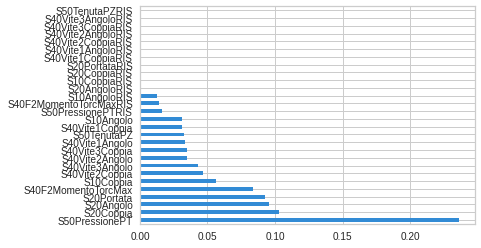

In [ ]:
%matplotlib inline
interpreter = Interpretation(x_test, feature_names=data_class_res.columns)
model = InMemoryModel(rf.predict, examples=x_train, unique_values=rf.classes_)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending = False, n_jobs = 1)

XGBoost

2020-06-06 17:25:49,243 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False
2020-06-06 17:25:49,399 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[28/28] features ████████████████████ Time elapsed: 6 seconds

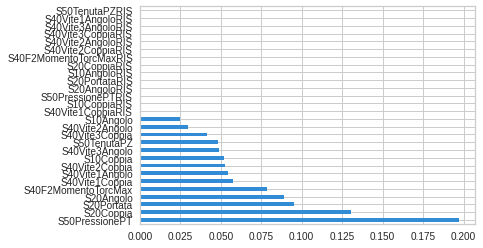

In [ ]:
%matplotlib inline
interpreter = Interpretation(x_test, feature_names=data_class_res.columns)
model = InMemoryModel(xgb_model.predict, examples=x_train, unique_values=xgb_model.classes_)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending = False, n_jobs = 1)

Neural Network

2020-06-06 17:27:34,274 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False
2020-06-06 17:27:34,434 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[28/28] features ████████████████████ Time elapsed: 9 seconds

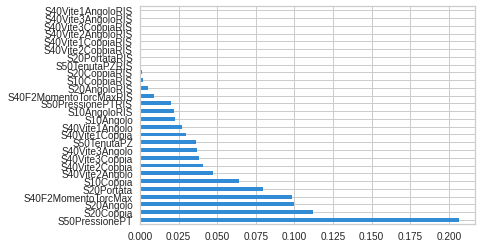

In [ ]:
%matplotlib inline
interpreter = Interpretation(x_test, feature_names=data_class_res.columns)
model = InMemoryModel(nn.predict, examples=x_train, unique_values=["0", "1"])
plots = interpreter.feature_importance.plot_feature_importance(model, ascending = False, n_jobs = 1)

KNearestNeighbor Classifier

2020-06-06 17:27:58,949 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False
2020-06-06 17:27:59,140 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[28/28] features ████████████████████ Time elapsed: 53 seconds

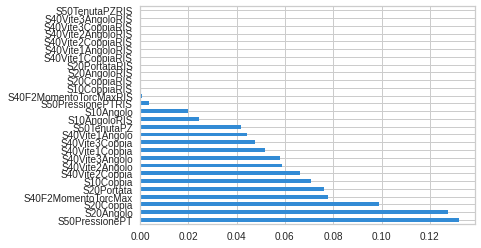

In [ ]:
%matplotlib inline
interpreter = Interpretation(x_test, feature_names=data_class_res.columns)
model = InMemoryModel(knn.predict, examples=x_train, unique_values=knn.classes_)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending = False, n_jobs = 1)

##Autoencoder per Anomaly Detection (Scarto della produzione)

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_senza_rischio_S60.pkl', 'rb')
data_class = pickle.load(file)
file.close()

Standardizzo le misure

In [ ]:
for i in data_class.columns.values[:-1]:
  media = data_class[str(i)].mean()
  std = data_class[str(i)].std()
  data_class[str(i)] = (data_class[str(i)] - media)/std
data_class

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,pass60
0,-2.222418,3.290976,0.572015,0.378228,0.584694,0.687660,-0.045689,1.412304,0.175447,1.518763,0.012535,0.850857,-0.359381,0.395910,1
1,-2.540027,3.814415,-0.596331,0.054691,0.746955,1.996206,0.650392,1.605143,-0.397243,1.145593,0.402463,1.637004,-0.352209,1.115915,1
2,-2.010680,1.346774,-0.085181,0.054691,1.201917,1.771299,-3.004035,2.376499,-1.924429,0.026085,-1.742102,0.064710,-0.201539,4.355939,1
3,-2.328289,2.019767,0.791081,0.378228,1.093742,0.810336,-1.437850,1.605143,-0.015456,0.212670,-2.326974,0.850857,-0.223066,0.395910,1
4,-1.904813,1.496328,0.060862,0.378228,1.023750,1.137473,0.650392,1.412304,-1.733544,0.772424,-0.767301,-0.524900,-0.309158,0.755913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243743,-3.175241,2.692760,-2.786982,-0.915921,-0.624298,-0.273303,-4.048148,4.690568,-4.597013,5.250456,-3.691684,5.567738,-2.382622,-2.484111,1
1243744,-3.281108,3.515307,-3.225111,2.642989,-1.371962,-0.600439,-2.655987,4.497729,-4.215207,4.504117,-3.886647,4.978128,-0.768335,-1.764106,1
1243745,-3.281108,2.842314,-3.006045,-0.592384,-1.149255,0.483200,-3.004035,3.340694,-4.406110,4.317532,-4.471520,3.602371,-0.825731,-0.324095,0
1243746,-3.281108,3.066645,-2.786982,-1.562996,-1.365600,-0.600439,-3.178043,3.919212,-3.642517,4.317532,-4.276556,4.781591,-0.768335,-2.124108,1


Analizzo la porzione di anomalie del dataset preprocessato.

In [ ]:
disordinato = data_class.sample(frac = 1, random_state = 2020)
disordinato.reset_index(drop = True, inplace =True)
print("la percentuale di anomalie nel dataset è pari a " + str(len(disordinato[disordinato.pass60 == 0])/len(disordinato)))

la percentuale di anomalie nel dataset è pari a 0.028078906849876784


Si seleziona l'80% per il train e il rimanente per la validation dell'autoencoder

In [ ]:
target = disordinato.pass60
disordinato.drop(columns = "pass60", inplace = True)
x_train = np.array(disordinato.loc[0:(len(disordinato)*0.8)+1])
x_test = np.array(disordinato.loc[(len(disordinato)*0.8)+1:])

####Creazione del modello Autoencoder

In [ ]:
input_dim = x_train.shape[1]

In [ ]:
input_img = Input(shape=(input_dim,) )
encoded1 = Dense(8, activation='tanh')(input_img)
encoded2 = Dense(4, activation='relu')(encoded1)

decoded3 = Dense(8, activation='relu')(encoded2)
decoded4 = Dense(14, activation='tanh')(decoded3)

In [ ]:
autoencoder = Model(input_img, decoded4)
opt = keras.optimizers.Adam(learning_rate=0.01)
autoencoder.compile(optimizer=opt, loss="MSE")
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 14)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_27 (Dense)             (None, 14)                126       
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data = (x_test, x_test))

Train on 994998 samples, validate on 248748 samples
Epoch 1/10
994998/994998 [==============================] - 11s 11us/step - loss: 0.4364 - val_loss: 0.4236
Epoch 2/10
994998/994998 [==============================] - 11s 11us/step - loss: 0.4228 - val_loss: 0.4207
Epoch 3/10
994998/994998 [==============================] - 11s 11us/step - loss: 0.4187 - val_loss: 0.4165
Epoch 4/10
994998/994998 [==============================] - 11s 11us/step - loss: 0.4168 - val_loss: 0.4148
Epoch 5/10
994998/994998 [==============================] - 11s 11us/step - loss: 0.4139 - val_loss: 0.4103
Epoch 6/10
994998/994998 [==============================] - 11s 11us/step - loss: 0.4109 - val_loss: 0.4087
Epoch 7/10
994998/994998 [==============================] - 11s 11us/step - loss: 0.4100 - val_loss: 0.4076
Epoch 8/10
994998/994998 [==============================] - 11s 11us/step - loss: 0.4097 - val_loss: 0.4084
Epoch 9/10
994998/994998 [==============================] - 11s 11us/step - loss: 0.

In [ ]:
predictions = autoencoder.predict(disordinato)

In [ ]:
mse = np.mean(np.power(disordinato - predictions, 2), axis=1)
disordinato["MSE"] = mse

Effettuo tramite quantili la selezione dei valori outlier (che nel dataset sono 0.6%)

In [ ]:
soglia = np.quantile(disordinato["MSE"], 0.994)
print("verranno considerati anomalie i valori sopra alla soglia " + str(soglia))

verranno considerati anomalie i valori sopra alla soglia 2.3818360044987865


In [ ]:
disordinato["conforme"] = 1
disordinato.loc[disordinato.MSE > soglia, "conforme"] = 0
disordinato = pd.concat([disordinato, target], axis = 1)

Osservazioni che non sono conformi ma passano il controllo dell'autoencoder (Falsi Positivi)

In [ ]:
disordinato[(disordinato.conforme == 1) & (disordinato.pass60 == 0)]

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,MSE,conforme,pass60
74,-0.105037,-0.522652,-0.450287,1.348840,-0.223420,-0.600439,-0.741769,1.219465,0.748137,0.399255,0.012535,-1.114510,0.817252,-1.044100,0.299631,1,0
118,0.424310,-0.447875,-1.107483,1.025302,1.262366,0.585430,1.172465,-0.516087,2.084438,-0.347084,0.207499,-0.328363,-0.675066,0.035908,0.413024,1,0
151,-0.316775,-0.746983,-1.472590,1.348840,-0.484307,-0.498209,-0.393721,-0.516087,0.939040,-1.839761,0.987335,-0.917973,1.082713,-1.044100,0.223228,1,0
197,0.212572,0.075565,-0.669354,-1.886533,-0.605207,3.182075,-0.741769,-1.287443,-1.351739,-1.093423,-0.377374,-1.114510,1.003794,-0.324095,0.520355,1,0
204,0.212572,-0.073989,0.352952,-1.562996,-0.035709,0.380970,-1.785882,-0.516087,-0.397243,-0.906838,-2.911847,0.457784,-0.732462,-0.324095,0.530902,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243635,0.636048,-0.148766,-1.326546,0.378228,0.482885,0.156064,-1.437850,2.183660,1.511730,0.026085,-0.962247,-0.917973,0.680937,1.835921,0.890042,1,0
1243656,0.636048,-0.522652,-1.107483,-0.268847,-0.850189,1.771299,-1.959906,-0.708926,-0.206340,0.959009,-2.132011,0.654320,1.003794,-1.764106,0.428924,1,0
1243665,0.530177,-0.223543,-1.107483,-0.592384,-0.411132,-0.375533,0.128336,1.412304,-0.779049,1.518763,-0.182410,0.261247,1.312302,-0.324095,0.234759,1,0
1243682,-2.010680,0.075565,0.279929,-0.915921,0.657872,0.585430,0.128336,-0.901765,-0.588146,-0.160499,0.597426,-0.524900,-0.746812,0.755913,0.196711,1,0


Osservazioni che non sono conformi e sono correttamente identificati dall'autoencoder (Veri Positivi)

In [ ]:
disordinato[(disordinato.conforme == 0) & (disordinato.pass60 == 0)]

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,MSE,conforme,pass60
2608,-2.857632,6.581164,1.740360,1.025302,0.778768,0.585430,-0.741769,3.147855,0.366350,1.891932,-0.182410,1.833541,-1.076842,-0.324095,3.048795,0,0
12518,0.847787,-0.073989,-0.888417,-0.592384,-1.142892,-0.600439,0.302360,1.219465,-5.551508,3.944363,0.012535,0.654320,0.967921,-0.324095,2.444525,0,0
13722,-1.904813,-0.223543,1.010144,-1.562996,1.065109,6.310316,0.824416,-0.516087,0.939040,-1.093423,0.207499,-1.704120,-0.832908,1.115915,2.553001,0,0
15334,0.953653,-0.447875,-0.742374,-1.562996,-0.869277,6.760129,-0.741769,0.448108,-0.397243,-0.347084,-0.572338,0.654320,1.391221,-0.684098,2.507437,0,0
16292,-1.798942,0.449450,-1.107483,5.231287,0.832856,0.483200,0.128336,-0.901765,-0.779049,-0.533669,0.987335,0.654320,-0.818558,-0.684098,2.925551,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231406,-0.210904,-0.672206,-1.034460,-1.239459,-0.131154,6.637452,-1.089801,-0.323248,-1.351739,0.585839,-1.742102,0.064710,-0.538747,-1.404103,2.572826,0,0
1232880,-2.857632,8.674920,0.572015,0.378228,1.485074,1.137473,-2.307955,2.376499,-1.160836,-0.347084,0.402463,2.423151,-1.076842,-0.684098,5.205684,0,0
1233649,-1.904813,-0.597429,-0.961440,-0.592384,1.815957,8.702501,0.824416,-0.708926,-0.397243,0.212670,-0.572338,-0.328363,-0.660716,0.755913,4.822282,0,0
1238053,-2.857632,6.655941,1.229211,0.701765,1.201917,0.258294,0.302360,0.833787,-0.588146,0.585839,0.012535,0.457784,-1.033796,0.395910,2.635304,0,0


Si nota che la disparità di classificazione non consente di considerare un approccio Autoencoder utile con questo Dataset

##Autoencoder per Anomaly Detection (Scarto della produzione) allenato su osservazioni conformi e testato su dati misti conformi-anomalie

Carico il dataset senza variabili di rischio

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_classificazione_senza_rischio_S60.pkl', 'rb')
data_class = pickle.load(file)
file.close()

Standardizzo le misure

In [ ]:
for i in data_class.columns.values[:-1]:
  media = data_class[str(i)].mean()
  std = data_class[str(i)].std()
  data_class[str(i)] = (data_class[str(i)] - media)/std
data_class

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,pass60
0,-2.222418,3.290976,0.572015,0.378228,0.584694,0.687660,-0.045689,1.412304,0.175447,1.518763,0.012535,0.850857,-0.359381,0.395910,1
1,-2.540027,3.814415,-0.596331,0.054691,0.746955,1.996206,0.650392,1.605143,-0.397243,1.145593,0.402463,1.637004,-0.352209,1.115915,1
2,-2.010680,1.346774,-0.085181,0.054691,1.201917,1.771299,-3.004035,2.376499,-1.924429,0.026085,-1.742102,0.064710,-0.201539,4.355939,1
3,-2.328289,2.019767,0.791081,0.378228,1.093742,0.810336,-1.437850,1.605143,-0.015456,0.212670,-2.326974,0.850857,-0.223066,0.395910,1
4,-1.904813,1.496328,0.060862,0.378228,1.023750,1.137473,0.650392,1.412304,-1.733544,0.772424,-0.767301,-0.524900,-0.309158,0.755913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243743,-3.175241,2.692760,-2.786982,-0.915921,-0.624298,-0.273303,-4.048148,4.690568,-4.597013,5.250456,-3.691684,5.567738,-2.382622,-2.484111,1
1243744,-3.281108,3.515307,-3.225111,2.642989,-1.371962,-0.600439,-2.655987,4.497729,-4.215207,4.504117,-3.886647,4.978128,-0.768335,-1.764106,1
1243745,-3.281108,2.842314,-3.006045,-0.592384,-1.149255,0.483200,-3.004035,3.340694,-4.406110,4.317532,-4.471520,3.602371,-0.825731,-0.324095,0
1243746,-3.281108,3.066645,-2.786982,-1.562996,-1.365600,-0.600439,-3.178043,3.919212,-3.642517,4.317532,-4.276556,4.781591,-0.768335,-2.124108,1


In [ ]:
disordinato = data_class.sample(frac = 1, random_state = 2020)
disordinato.reset_index(drop = True, inplace =True)
print("la percentuale di anomalie nel dataset è pari a " + str(len(disordinato[disordinato.pass60 == 0])/len(disordinato)))

la percentuale di anomalie nel dataset è pari a 0.028078906849876784


Si seleziona l'80% per il train e il rimanente per la validation dell'autoencoder

In [ ]:
scarti = disordinato[disordinato.pass60 == 0]
disordinato = disordinato[disordinato.pass60 == 1]
x_train = disordinato.loc[0:(len(disordinato)*0.8)+1]
x_test = disordinato.loc[(len(disordinato)*0.8)+1:]
validazione = pd.concat([x_test, scarti], axis = 0)
validazione_target = validazione["pass60"]
validazione.drop(columns = "pass60", inplace = True)
x_test.drop(columns = "pass60", inplace = True)
x_train.drop(columns = "pass60", inplace = True)
x_train = np.array(x_train)
x_test = np.array(x_test)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


####Creazione del modello Autoencoder

In [ ]:
input_dim = x_train.shape[1]

In [ ]:
input_img = Input(shape=(input_dim,) )
encoded1 = Dense(10, activation='tanh')(input_img)
encoded2 = Dense(8, activation='relu')(encoded1)
encoded3 = Dense(6, activation='relu')(encoded2)
encoded4 = Dense(4, activation='relu')(encoded3)

decoded1 = Dense(6, activation='relu')(encoded4)
decoded2 = Dense(8, activation='relu')(encoded1)
decoded3 = Dense(10, activation='relu')(encoded2)
decoded4 = Dense(14, activation='tanh')(decoded3)

In [ ]:
autoencoder = Model(input_img, decoded4)
opt = keras.optimizers.Adam(learning_rate=0.01)
autoencoder.compile(optimizer=opt, loss="MSE")
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 14)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                150       
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_42 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_43 (Dense)             (None, 14)                154       
Total params: 482
Trainable params: 482
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data = (x_test, x_test))

Train on 939960 samples, validate on 268862 samples
Epoch 1/10
939960/939960 [==============================] - 11s 12us/step - loss: 0.3061 - val_loss: 0.2960
Epoch 2/10
939960/939960 [==============================] - 11s 12us/step - loss: 0.2952 - val_loss: 0.2940
Epoch 3/10
939960/939960 [==============================] - 11s 11us/step - loss: 0.2944 - val_loss: 0.2941
Epoch 4/10
939960/939960 [==============================] - 11s 11us/step - loss: 0.2940 - val_loss: 0.2939
Epoch 5/10
939960/939960 [==============================] - 11s 11us/step - loss: 0.2938 - val_loss: 0.2931
Epoch 6/10
939960/939960 [==============================] - 11s 11us/step - loss: 0.2938 - val_loss: 0.2928
Epoch 7/10
939960/939960 [==============================] - 11s 12us/step - loss: 0.2937 - val_loss: 0.2932
Epoch 8/10
939960/939960 [==============================] - 11s 12us/step - loss: 0.2936 - val_loss: 0.2931
Epoch 9/10
939960/939960 [==============================] - 11s 11us/step - loss: 0.

In [ ]:
predictions = autoencoder.predict(validazione)

In [ ]:
mse = np.mean(np.power(validazione - predictions, 2), axis=1)
validazione = pd.DataFrame(validazione, columns = disordinato.columns[:-1])
validazione["MSE"] = mse

In [ ]:
validazione = pd.concat([validazione, validazione_target], axis = 1)

In [ ]:
len(validazione[validazione.pass60 == 0])/len(validazione)

0.11495959313330151

Effettuo tramite quantili la selezione dei valori outlier (che nel dataset sono 3%)

In [ ]:
soglia = np.quantile(validazione["MSE"], 0.97)
print("verranno considerati anomalie i valori sopra alla soglia " + str(soglia))

verranno considerati anomalie i valori sopra alla soglia 1.06557109691065


In [ ]:
validazione["conforme"] = 1
validazione.loc[validazione.MSE > soglia, "conforme"] = 0

Osservazioni che l'Autoencoder classifica come non conformi ma lo sono (Falsi Negativi)

In [ ]:
validazione[(validazione.pass60 == 1) & (validazione.conforme == 0)]

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,MSE,pass60,conforme
967079,-2.751765,6.730718,1.740360,1.025302,0.727864,0.053834,-0.741769,1.605143,0.175447,0.772424,-2.521938,0.654320,-1.026619,-0.324095,2.834725,1,0
967156,-2.645894,6.880272,1.156188,0.378228,1.004659,0.053834,0.998440,0.640948,-0.588146,1.332178,-0.767301,-0.131826,-1.198812,0.035908,2.790845,1,0
967168,-2.540027,3.365753,1.083168,-0.592384,1.564615,6.310316,-0.741769,2.376499,-0.206340,2.265101,-0.572338,0.850857,-1.205984,-0.324095,2.912012,1,0
967183,-2.857632,4.263077,0.864101,0.701765,1.695057,0.053834,-0.915777,2.376499,0.366350,0.772424,-1.742102,0.261247,-1.141416,0.755913,1.298781,1,0
967199,-2.434156,5.010847,1.667340,0.054691,1.710965,2.200666,0.128336,1.219465,-0.206340,0.585839,-0.182410,1.440467,-1.119893,0.035908,1.558060,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243589,-2.645894,6.655941,2.324537,0.378228,1.421445,1.014797,-0.567745,-0.130409,-0.588146,1.145593,-1.352174,2.226614,-1.062492,-0.324095,2.856172,1,0
1243659,-2.222418,2.617983,1.375254,-0.592384,1.532799,7.618862,-0.219696,0.255269,0.557252,0.026085,-1.157210,-0.524900,-1.213162,-0.324095,3.953529,1,0
1243662,0.424310,-0.223543,-1.326546,-1.562996,-0.414315,6.535222,1.520497,1.219465,-0.206340,1.705347,-1.157210,0.850857,1.125764,-1.044100,2.307073,1,0
1243688,-1.375466,-0.447875,1.302231,0.054691,2.102297,5.451583,-0.741769,1.605143,-0.588146,0.959009,0.207499,1.637004,-0.804208,0.035908,2.109636,1,0


Osservazioni che non sono conformi e sono correttamente identificati dall'autoencoder (Veri Positivi)

In [ ]:
validazione[(validazione.pass60 == 0) & (validazione.conforme == 0)]

,S10Coppia,S10Angolo,S20Coppia,S20Angolo,S20Portata,S40F2MomentoTorcMax,S40Vite1Coppia,S40Vite1Angolo,S40Vite2Coppia,S40Vite2Angolo,S40Vite3Coppia,S40Vite3Angolo,S50PressionePT,S50TenutaPZ,MSE,pass60,conforme
936,0.741915,-0.447875,-1.326546,-1.562996,0.508336,4.919987,-0.219696,0.062430,-1.542641,0.026085,-0.377374,-0.131826,1.419921,-0.684098,1.188573,0,0
1704,-2.540027,4.786516,1.959427,0.701765,1.780960,1.444163,0.650392,-0.130409,-1.160836,1.145593,-0.767301,0.850857,-0.990746,-1.044100,1.445203,0,0
1761,-2.857632,4.786516,1.521297,0.054691,1.026930,1.341933,-1.089801,0.640948,-1.733544,1.145593,-0.572338,-0.328363,-1.227512,0.395910,1.427257,0,0
2608,-2.857632,6.581164,1.740360,1.025302,0.778768,0.585430,-0.741769,3.147855,0.366350,1.891932,-0.182410,1.833541,-1.076842,-0.324095,2.970214,0,0
3534,0.636048,-0.223543,-0.377268,-0.592384,-0.703836,4.919987,1.868545,0.255269,-0.588146,0.026085,1.182299,0.064710,1.326652,0.395910,1.234790,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240736,-2.434156,4.113523,2.032447,0.054691,-1.457866,0.156064,-3.004035,0.255269,-1.733544,0.959009,-0.572338,0.261247,-0.947700,-0.684098,1.744437,0,0
1240904,-2.857632,7.104603,1.156188,-0.592384,1.981398,2.527802,-0.393721,1.605143,-0.969933,0.399255,-0.377374,0.457784,-1.155766,0.755913,3.246626,0,0
1241704,0.106701,-0.073989,-1.326546,-1.239459,-1.473771,6.105856,0.824416,-0.901765,-0.779049,-0.160499,-0.572338,-0.721436,1.025317,0.035908,1.926074,0,0
1241744,0.741915,-0.298320,-1.399570,-0.592384,0.012016,5.226677,-0.915777,0.062430,-0.969933,0.959009,0.207499,0.850857,1.699732,-1.404103,1.376892,0,0


Anche con questa divisione del Dataset il detector delle anomalie costruito con Autoencoder non si dimostra più efficiente dei classificatori ottenuti precedenti. <br>Si conclude decidendo che l'approccio non può essere applicato ad un contesto reale, i dati sono troppo simili tra loro sia tra anomalie che osservazioni regolari per poter utilizzare Autoencoder.

##Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_class[data_class.columns[:-1]], data_class.pass60, test_size = 0.2, shuffle=True, random_state = 2020, stratify = target)

Si indica la percentuale dello 0.6% del dataset causata dalle anomalie

In [ ]:
iso = IsolationForest(n_estimators = 200, contamination=0.006, random_state= 2020)
iso.fit(x_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.006,
                max_features=1.0, max_samples='auto', n_estimators=200,
                n_jobs=None, random_state=2020, verbose=0, warm_start=False)

In [ ]:
anomalie = iso.predict(x_test)

In [ ]:
y_test = y_test.replace(to_replace = 0, value = -1)

In [ ]:
print(classification_report(anomalie, y_test))

              precision    recall  f1-score   support

          -1       0.00      0.02      0.01      1501
           1       0.99      0.97      0.98    247248

    accuracy                           0.97    248749
   macro avg       0.50      0.49      0.49    248749
weighted avg       0.99      0.97      0.98    248749



Si può osservare che l'approccio basato sull'algoritmo Isolation Forest non permette di garantire risultati migliori dei classificatori, si stabilisce che in un contesto reale tale classificatore risulterebbe inefficace.

##1 Class SVM (non presentato nel report)

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
from sklearn.utils import resample

In [ ]:
int(len(data_class)*0.2)

250389

In [ ]:
for i in data_class.columns.values[:-1]:
  media = data_class[str(i)].mean()
  std = data_class[str(i)].std()
  data_class[str(i)] = (data_class[str(i)] - media)/std
data_class

In [ ]:
data_class_resample = resample(data_class, n_samples = int(len(data_class)*0.2), stratify = data_class.pass50, random_state = 2020)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_class_resample[data_class_resample.columns[:-1]], data_class_resample.pass50, test_size = 0.2, shuffle=True, random_state = 2020, stratify = data_class_resample.pass50)

In [ ]:
clf = OneClassSVM(gamma='auto').fit(x_train)
predictions = clf.predict(x_test)

In [ ]:
classification_report(predictions, y_test)

L'approccio con 1-class SVM impiega un tempo troppo elevato da garantire un risultato per colpa della numerosità e della complessità del dataset. Di conseguenza non viene utilizzato.